# COMP551 Assignment 1

## Amir Abushanab - _260624419_

### To ensure the code runs correctly, please use the latest version of Jupyter Notebooks with Python 3.x

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
# First let's begin by importing all the libraries I'll likely be using during the assignment

import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math

# To make the figures bigger
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

### Q1.1:

Training MSE:  6.474811642470869


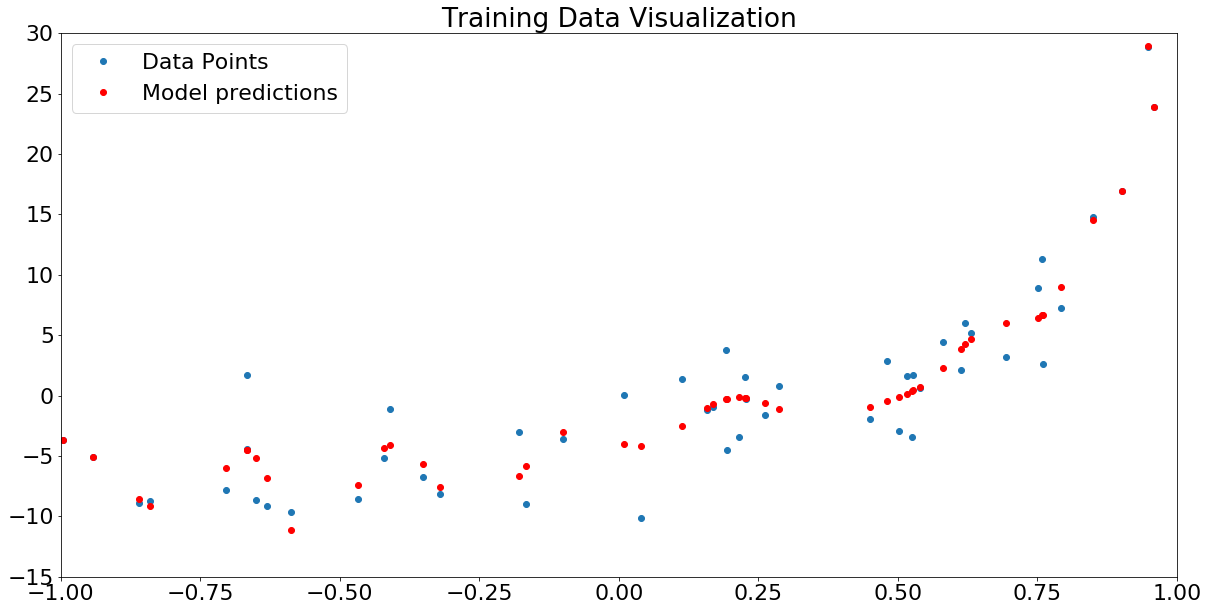

In [5]:
# Then let's import the train, test, and validation data.

train_data1_in = pd.read_csv('Dataset_1_train.csv', header=None, usecols=[0, 1])
test_data1_in = pd.read_csv('Dataset_1_test.csv', header=None, usecols=[0, 1])
validation_data1_in = pd.read_csv('Dataset_1_valid.csv', header=None, usecols=[0, 1])

# A useful lambda function for exponentiating
exponentiator = lambda n, k: math.pow(n,k)

def polyfit(x, y, degree, lmb):

    """Returns a coefficient matrix W by fitting the given a set of
    x and y inputs, as well as the degree of the polynomial fit"""

    # Start by constructing the array of x polynomials
    current_degree = 0
    X = np.ones(shape=(len(x), degree + 1))

    # Calculate the values in the X array, adding one column of values at a time to the power n
    for i in reversed(range(degree + 1)):
        X[:, i] = np.array([exponentiator(xi, current_degree) for xi in x])
        current_degree += 1

    # Convert X to a numpy matrix for easy multiplication
    X = np.matrix(X)

    # For some reason y becomse a 1x50 matrix instead of the intended 50x1, so this is just to fix that
    Y = np.matrix(y)
    Y = np.transpose(Y)
    
    # If you are using L2 regularization (i.e lambda > 0) then construct the regularization matrix to be added.
    # Note that if lambda is zero then an empty matrix is added which has no effect on the result
    I = np.identity(degree+1)

    # Finally calculate the coefficient matrix
    W = np.linalg.inv((np.matrix.transpose(X)*X) + lmb*I)*(np.matrix.transpose(X)*Y)

    return W

def polypredict_value(W, x):

    """Returns a prediction for the value of y given a single input x and
    a coefficient matrix"""

    y_pred = 0.0
    for i in range(W.size):
        Wi = W[i, 0]
        xi = exponentiator(x, W.size - i - 1)
        y_pred += Wi*xi

    return y_pred


def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

# Fit the model on the training data, with a 20 degree polynomial
polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20, 0)
y_pred_t = []
y_pred_v = []

# Predict the value of y in the training set with our model
for i in range(train_data1_in[0].size):
    y_pred_t.append(polypredict_value(polymodel, train_data1_in[0][i]))

# Predict the value of y in the validation set with out model
for i in range(validation_data1_in[0].size):
    y_pred_v.append(polypredict_value(polymodel, validation_data1_in[0][i]))

# Calculate the mse for both the training and validation sets
t_mean_square_error = mse(train_data1_in[1], y_pred_t)
v_mean_square_error = mse(validation_data1_in[1], y_pred_v)

print("Training MSE: ", t_mean_square_error)

# Unfortunately I had to resort to plotting points instead of a line
# for the model, as for some reason the line graphs display in a very hectic manner. (BUG IN MATPLOT NOT MY FAULT)

plt.title("Training Data Visualization")
plt.plot(train_data1_in[0], train_data1_in[1], 'o',  train_data1_in[0], y_pred_t, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.axis([-1,1,-15,30])
plt.show()

As expected, the model performs very well on the training data.

Validation MSE:  1417.809710627973


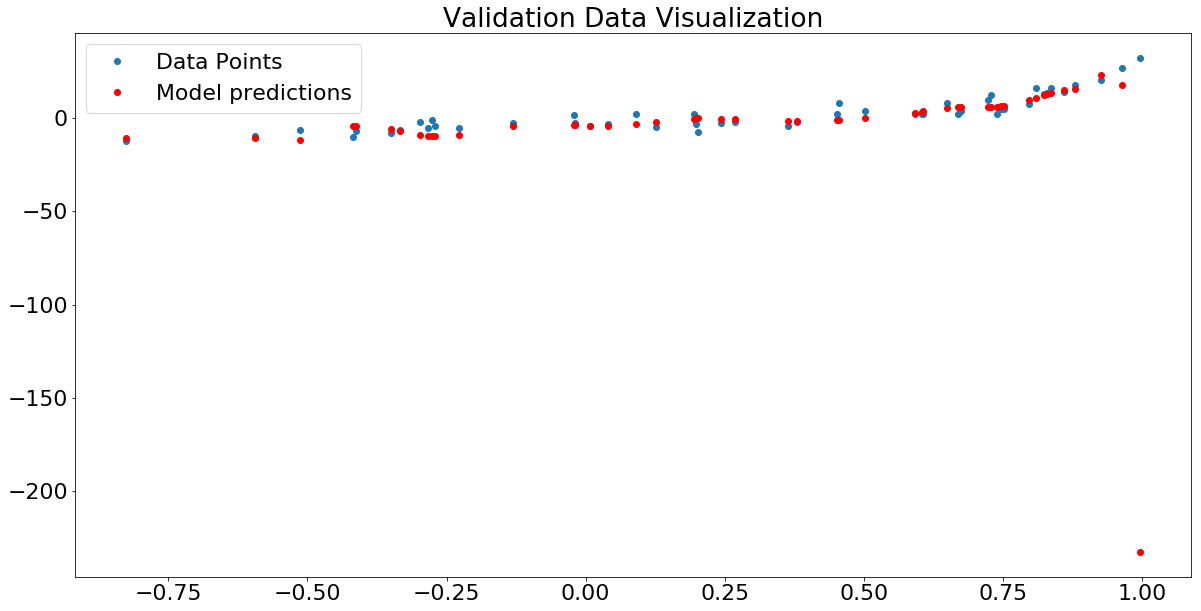

In [6]:
print("Validation MSE: ", v_mean_square_error)

# Unfortunately I had to resort to plotting points instead of a line
# for the model, as for some reason the line graphs display in a very hectic manner. (BUG IN MATPLOT NOT MY FAULT)

plt.title("Validation Data Visualization")
plt.plot(validation_data1_in[0], validation_data1_in[1], 'o', validation_data1_in[0], y_pred_v, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.show()

And while the MSE is much higher on the validation data due to a stray prediction, just by looking at the plot the model is still performing decently.

### Q1.2:

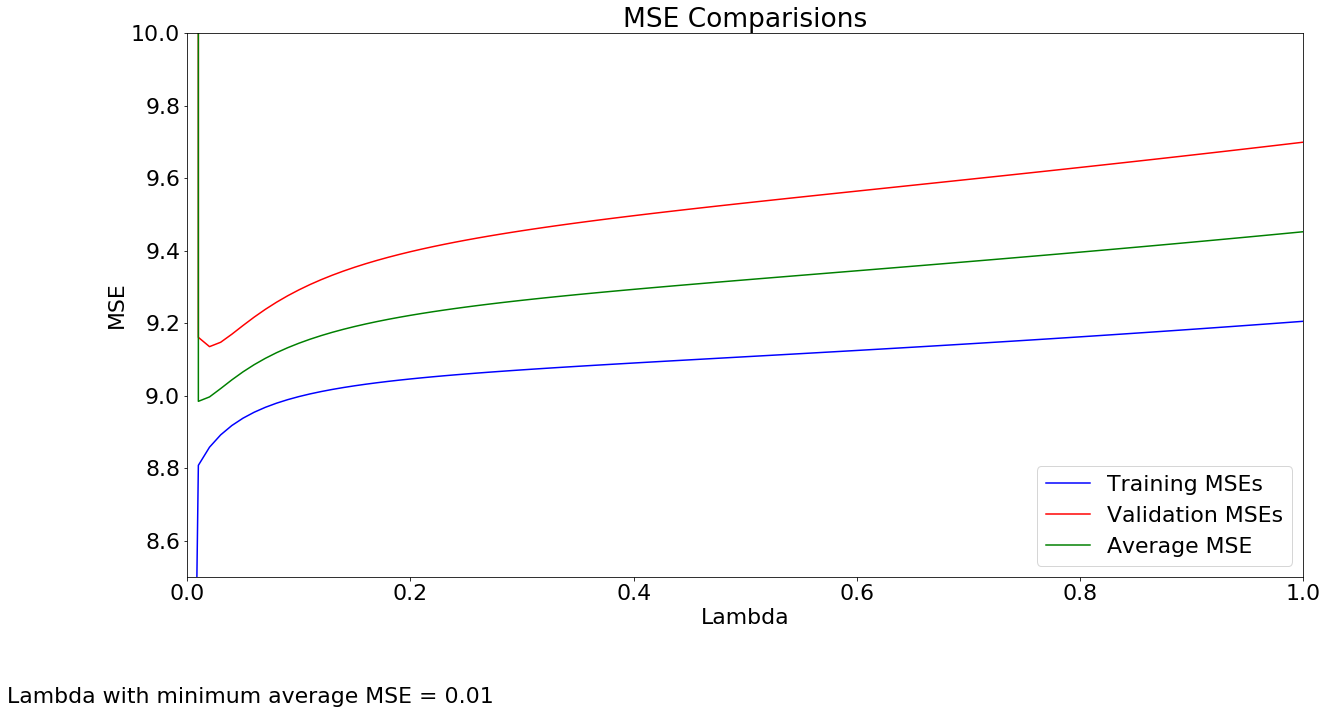

In [7]:
#Try different models and plot their MSE for the training and validation test sets for intervals of lambda = 0.01

#For some reason it's necessary to redefine this function in every block, who the hell knows why
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

train_MSEs = []
validation_MSEs = []
average_MSEs = []
lambda_vals = np.linspace(0, 1, 101)

for i in lambda_vals:
    polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20, i)
    y_pred_t = []
    y_pred_v = []
    # Predict the value of y in the training set with our model
    for j in range(train_data1_in[0].size):
        y_pred_t.append(polypredict_value(polymodel, train_data1_in[0][j]))

    # Predict the value of y in the validation set with out model
    for k in range(validation_data1_in[0].size):
        y_pred_v.append(polypredict_value(polymodel, validation_data1_in[0][k]))

    train_MSEs.append(mse(train_data1_in[1], y_pred_t))
    validation_MSEs.append(mse(validation_data1_in[1], y_pred_v))
    average_MSEs.append((mse(train_data1_in[1], y_pred_t)+mse(validation_data1_in[1], y_pred_v))/2)
    
s = "Lambda with minimum average MSE = " + str(lambda_vals[average_MSEs.index(min(average_MSEs))])
    
plt.title("MSE Comparisions")
plt.plot(lambda_vals, train_MSEs, '-b', lambda_vals, validation_MSEs, '-r', lambda_vals, average_MSEs, '-g')
plt.legend(['Training MSEs', 'Validation MSEs', 'Average MSE'])
plt.axis([0,1,8.5,10])
plt.figtext( 0, -0.05, s)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()

While a model with no regularization preforms the best on the training set, it preforms quite poorly in comparison on the Validation set, therefore I will select the hyperparameter with the best preformace on both the trianing and validation sets (0.01)

Test MSE:  8.85391961785232


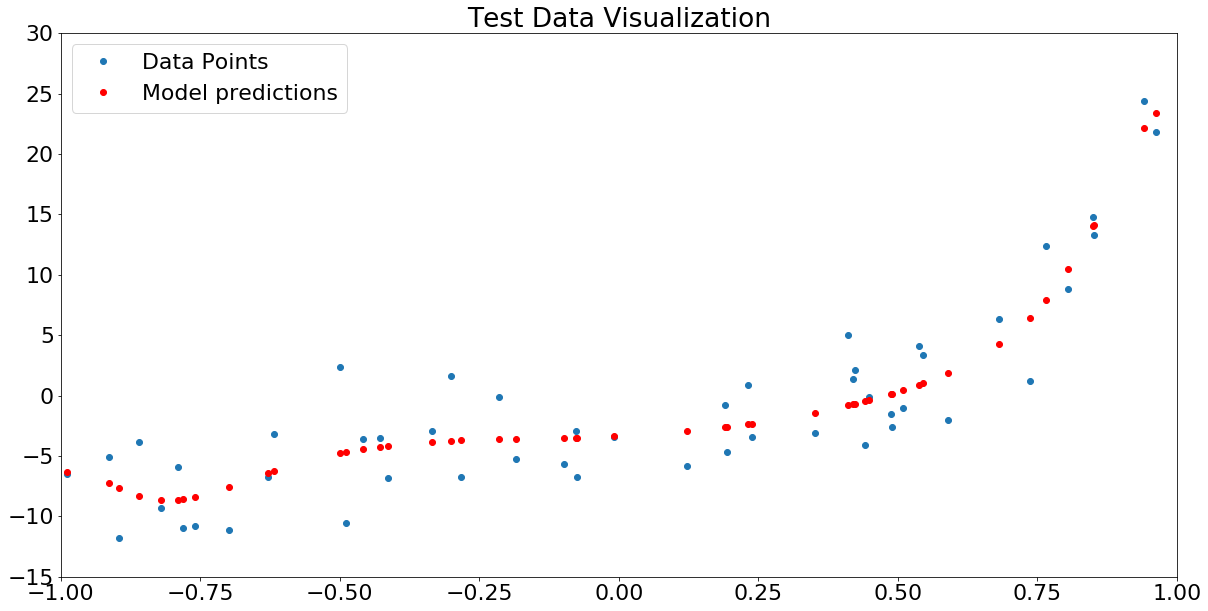

In [8]:
polymodel = polyfit(test_data1_in[0], test_data1_in[1], 20, 0.01)
y_pred_test = []

# Predict the value of y in the test set with our model
for i in range(test_data1_in[0].size):
    y_pred_test.append(polypredict_value(polymodel, test_data1_in[0][i]))

# Calculate the mse for both the test set
test_mean_square_error = mse(test_data1_in[1], y_pred_test)

print("Test MSE: ", test_mean_square_error)

# And finally visualize the results
plt.title("Test Data Visualization")
plt.plot(test_data1_in[0], test_data1_in[1], 'o', test_data1_in[0], y_pred_test, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.axis([-1,1,-15,30])
plt.show()

It would seem that the model is slightly underfitting just by looking at the above graph, but it still preforms reasonably well as the MSE is quite low.

### Q1.3:

While one cannot tell the exact degree of the polynomial simply by looking at the above visualization, we might be able to deduce it, as the model is underfitting only slightly, it's likely that the degree of the polynomial is only a few degrees greater than 20, probably 21-23.

### Q2.1:

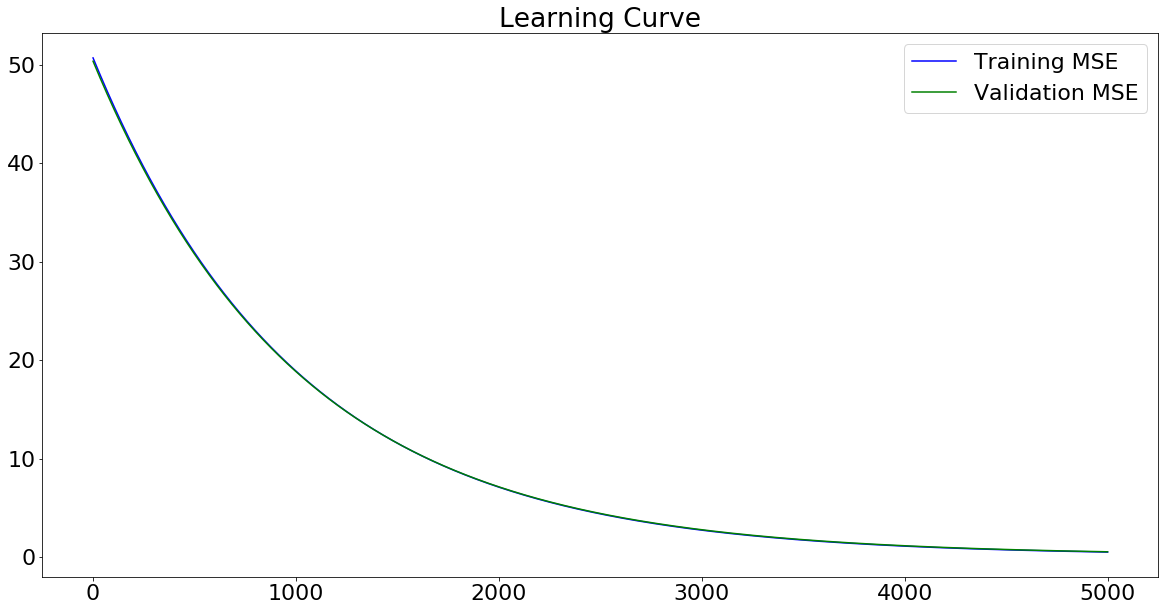

In [9]:
# Same as before, let's begin by importing the datasets

#For some reason it's necessary to redefine this function in every block, who the hell knows why
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

train_data2_in = pd.read_csv('Dataset_2_train.csv', header=None, usecols=[0, 1])
test_data2_in = pd.read_csv('Dataset_2_test.csv', header=None, usecols=[0, 1])
validation_data2_in = pd.read_csv('Dataset_2_valid.csv', header=None, usecols=[0, 1])

def SGD_val(data_point, coeffs):

    """Returns a prediction for the value of y given x and b"""

    y = coeffs[0]
    for i in range(len(data_point)-1) :
        y += coeffs[i+1]*data_point[i]

    return y

def Online_SGDfit(data, step_size, coeffs):

    """Returns the coefficients that will be used to make predictions
    in a 2 parameter linear model, given data, a learning rate (or step size)
    and the coefficients from a previous iteration (so one epoch at a time)"""

    for index, data_point in data.iterrows():
        y = SGD_val(data_point, coeffs)
        error = y - data_point[1]
        coeffs[0] = coeffs[0] - error*step_size

        for i in range(len(coeffs)-1):
            coeffs[i+1] = coeffs[i+1] - error*step_size*data_point[i]
    
    return coeffs

# Then train a linear model with online stochasitc gradient descent, one epoch at a time and with a step size of 1e-6
# == 0.000 001

step_size = 0.000001
coeffs = [0.0, 0.0]
train_MSEs = []
validation_MSEs = []
epochs = [x for x in range(1, 5001)]
# Train the model and update the coefficients one epoch at a time,
# then predict the value of y in the validation set and calculate the MSE

for x in epochs:
    coeffs = Online_SGDfit(train_data2_in, step_size, coeffs)
    y_pred_t = []
    y_pred_v = []

    for index, data_point_t in train_data2_in.iterrows():
        y_pred_t.append(SGD_val(data_point_t, coeffs))

    for index, data_point_v in validation_data2_in.iterrows():
        y_pred_v.append(SGD_val(data_point_v, coeffs))

    validation_MSEs.append(mse(validation_data2_in[1], y_pred_v))
    train_MSEs.append(mse(train_data2_in[1], y_pred_t))

plt.title("Learning Curve")
plt.plot(epochs, train_MSEs, '-b', epochs, validation_MSEs, '-g')
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()

### Q2.2:

Best MSE 0.09554936971790465 at step size 0.030303969697


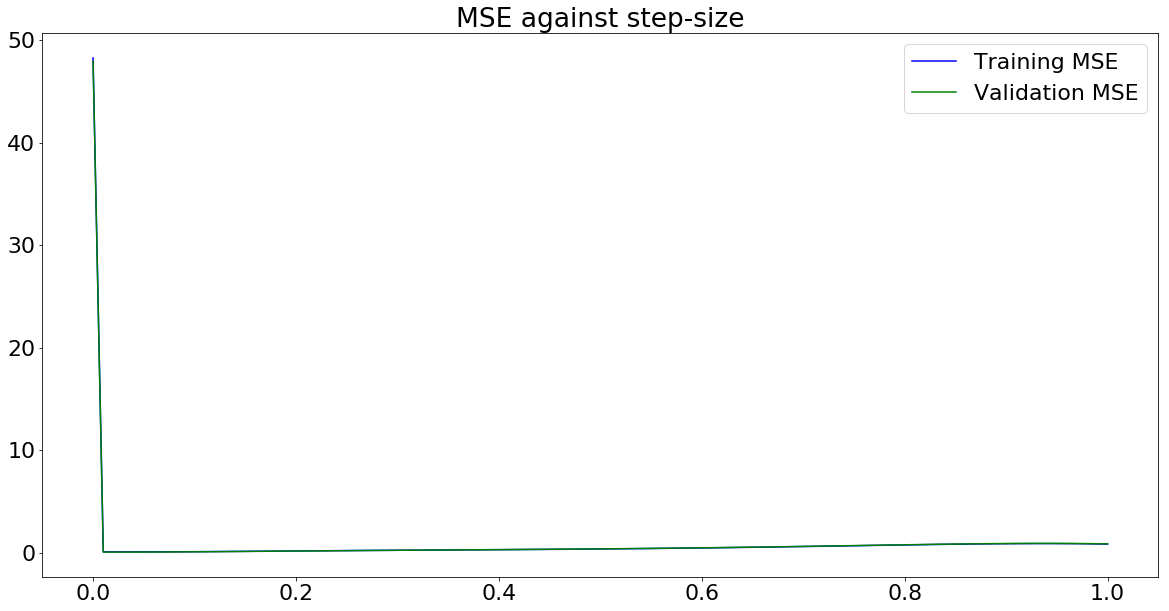

In [10]:
# Now let's try varying the step size, just for 100 epochs to make it easier on my poor laptop

step_size = 0.000001
coeffs = [0.0, 0.0]
step_sizes = np.linspace(0.000001, 0.999999, 100)

#For some reason it's necessary to redefine this function in every block, who the hell knows why
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

train_MSEs = []
validation_MSEs = []
epochs = [x for x in range(1, 51)]
# Train the model and update the coefficients one epoch at a time,
# then predict the value of y in the validation set and calculate the MSE
for step in step_sizes:

    coeffs = [0.0, 0.0]

    for x in epochs:
        coeffs = Online_SGDfit(train_data2_in, step, coeffs)
        
    y_pred_t = []
    y_pred_v = []

    for index, data_point_t in train_data2_in.iterrows():
        y_pred_t.append(SGD_val(data_point_t, coeffs))

    for index, data_point_v in validation_data2_in.iterrows():
        y_pred_v.append(SGD_val(data_point_v, coeffs))

    validation_MSEs.append(mse(validation_data2_in[1], y_pred_v))
    train_MSEs.append(mse(train_data2_in[1], y_pred_t))

plt.title("MSE against step-size")
plt.plot(step_sizes, train_MSEs, '-b', step_sizes, validation_MSEs, '-g')
plt.legend(['Training MSE', 'Validation MSE'])
print("Best MSE", min(train_MSEs), "at step size", step_sizes[train_MSEs.index(min(train_MSEs))])
plt.show()



### Q2.3:

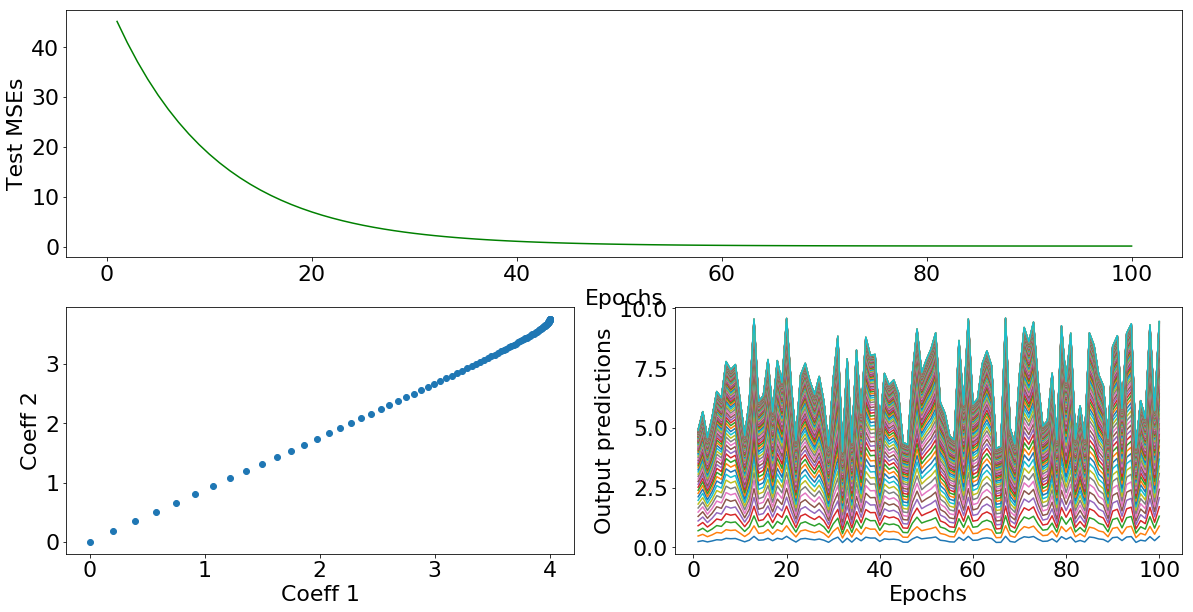

In [11]:
# Now let's train the model one more time, and use the following visualizations to
# show how the model changes with every epoch, then testing it out on the test set

#For some reason it's necessary to redefine this function in every block, who the hell knows why
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

# With our ideal step size the model converges far too quickly to show how it evolves over time, so I'm using a
# suboptimal stepsize for demonstration purposes
step_size = 0.0001
coeffs = [0.0, 0.0]
coeffs_1 = [0.0]
coeffs_2 = [0.0]
test_MSEs = []
y_pred_arrays = []
epochs = [x for x in range(1, 101)]
# Train the model and update the coefficients one epoch at a time,
# then predict the value of y in the validation set and calculate the MSE

for x in epochs:
    coeffs = Online_SGDfit(train_data2_in, step_size, coeffs)
    coeffs_1.append((coeffs[0]))
    coeffs_2.append((coeffs[1]))

    y_pred_test = []
    y_pred_arrays.append(y_pred_test)

    for index, data_point_t in test_data2_in.iterrows():
        y_pred_test.append(SGD_val(data_point_t, coeffs))

    test_MSEs.append(mse(test_data2_in[1], y_pred_test))

plt.close()
fig = plt.figure()

ax1 = plt.subplot(211)
ax1.plot(epochs, test_MSEs, '-g')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Test MSEs")

ax2 = plt.subplot(223)
ax2.scatter(coeffs_1, coeffs_2)
ax2.set_xlabel("Coeff 1")
ax2.set_ylabel("Coeff 2")

ax3 = plt.subplot(224)
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Output predictions")
for ys in y_pred_arrays:
    ax3.plot(epochs, ys)
plt.show()


While the question asked for 5 visualizations, there's really nothing left to report beyond these three graphs + the graphs in parts a and b, so I assume the question was asking for a total of 5 graphs.

### Q3.1:

In [12]:
# Once again, start by importing the dataset. Since I'm not really sure what I'm looking for
# I'm going to look through the data (and the namespace manually)
crime_data = pd.read_csv('communities.data', header=None)
crime_data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [13]:
# Knowing what the data looks like, I can now proceed to replace the values with the sampled mean
cleaned_crime_data = pd.read_csv('communities.data', header=None, sep=',', na_values=['?'])

for col in cleaned_crime_data:
    try :
        m = cleaned_crime_data[col].mean()
        cleaned_crime_data[col].fillna(m, inplace=True)
    except :
        continue
        
# Then add the header names from the .names file
with open("communities.names", 'r') as names_file:
    names_in = names_file.read().splitlines(True)

header = []
for line in names_in:
    if ('@data' in line):
        break
    else:
        if (line.startswith('@attribute')):
            if 'numeric' in line:
                header.append((line.split('@attribute '))[1].split(' numeric')[0])
            else:
                header.append((line.split('@attribute '))[1].split(' string')[0])

cleaned_crime_data.columns= header

# And finally export and display the data
cleaned_crime_data.to_csv('cleaned_communities.data')
cleaned_crime_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


Note that there are other methods of dealing with missing data:
- Deleting inputs that contain invalid values; useful for large datasets where dropping a few rows will have negligible impact on the models, which is not our case as almost every row has missing values.
- Filling the missing values with more accurate data; i.e have a another model predict the missing values or have a human expert manually fill in the data (slowest but valuable for small datasets)
- Using a different algorithm that can handle missing values; i.e gradient boosting

For our purposes (training a multivariate linear model), the mean remains a good choice for replacing missing values.

### Q3.2:

In [14]:
# Let's split the datasets into 5 partitions of 80-20 train-validation sets for k-fold cross validation:

# Shuffle the data
cleaned_crime_data = cleaned_crime_data.sample(frac=1).reset_index(drop=True)

# Drop the first 5 cols as they are not predictive
try:
    cleaned_crime_data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)
except:
    pass
    
# Create the empty DataFrame objects
i = 1
CandC_train1 = pd.DataFrame()
CandC_train2 = pd.DataFrame()
CandC_train3 = pd.DataFrame()
CandC_train4 = pd.DataFrame()
CandC_train5 = pd.DataFrame()
CandC_test1 = pd.DataFrame()
CandC_test2 = pd.DataFrame()
CandC_test3 = pd.DataFrame()
CandC_test4 = pd.DataFrame()
CandC_test5 = pd.DataFrame()

# Partition into 5 equal sets
for subset in np.array_split(cleaned_crime_data, 5):
    foo = "CandC_train" + str(i)
    foo2 = "CandC_test" + str(i)
    
    # Further partition into randomized 80 - 20 split sets
    exec(foo + " = subset.sample(frac=0.8, random_state=200)")
    exec(foo2 + " = subset.drop(" + foo + ".index)")
    
    # Drop the index column generated by the splitting
    exec(foo + ".reset_index(drop = True, inplace=True)")
    exec(foo2 + ".reset_index(drop = True, inplace=True)")
    
    # Export the csvs
    exec(foo + ".to_csv('" + foo +".csv', index=False)")
    exec(foo2 + ".to_csv('" + foo2 +".csv', index=False)")
    i+=1
    
# Confirming the splitting worked correctly
CandC_test1.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.30
1,0.01,0.58,0.01,0.98,0.05,0.01,0.70,0.73,0.62,0.15,...,0.11,0.03,0.04,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.01
2,0.03,0.45,0.01,0.84,0.62,0.05,0.26,0.20,0.12,0.63,...,0.02,0.34,0.08,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.04
3,0.01,0.68,0.03,0.95,0.08,0.04,0.41,0.40,0.27,0.24,...,0.07,0.05,0.07,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.04
4,0.03,0.50,0.03,0.86,0.12,0.27,0.45,0.52,0.33,0.19,...,0.02,0.33,0.14,0.163103,0.076708,0.698589,0.440439,0.0,0.195078,0.14


In [15]:
# Now let's implement the functions for multivariate linear regression (which are similar to polynomial regression)
def multivariate_lin_fit(data, lmb):

    """Returns a coefficient matrix W by fitting the given a data input
    , regularizing with lamdba for ridge regression"""

    # First start by adding a column of ones to the x input. The try block is just so that the code doesn't need to 
    # be run from scratch every time
    
    ones = np.ones(data.shape[0])
    
    try:
        data.insert(loc=0, column='ones', value=ones)
    except: 
        pass
    
    y = data[data.columns[-1]]
    x = data.drop(data.columns[len(data.columns)-1], axis=1)

    X = np.matrix(x)

    # For some reason y becomse a 1xn matrix instead of the intended nx1, so this is just to fix that
    Y = np.matrix(y)
    Y = np.transpose(Y)

    # If you are using L2 regularization (i.e lambda > 0) then construct the regularization matrix to be added.
    # Note that if lambda is zero then an empty matrix is added which has no effect on the result
    I = np.identity(X.shape[1])

    # Finally calculate the coefficient matrix
    W = np.linalg.inv((np.matrix.transpose(X) * X) + lmb * I) * (np.matrix.transpose(X) * Y)

    return W

def multivariate_predict(W, x):

    """Returns a prediction for the value of y given a row of inputs x and
    a coefficient matrix"""

    y_pred = 0.0
    for i in range(W.size):
        Wi = W[i, 0]
        if i == 0:
            xi = 1
        else:
            xi = x[i-1]

        y_pred += Wi*xi

    return y_pred

#For some reason it's necessary to redefine this function in every block, who the hell knows why
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

mses = []
Ws = []

for k in range(1,6):

    W = None
    x_test = None
    y_test = None
    y_pred = []


    # I need to resort to meta programming to pull this off, god I miss sklearn
    foo = "CandC_train" + str(k)
    foo2 = "CandC_test" + str(k)

    exec("W = (multivariate_lin_fit(" + foo +", 0))")
    Ws.append(W)
    exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
    exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

    for j in range(x_test.shape[0]):
        y = multivariate_predict(W, x_test.iloc[j])
        y_pred.append(y)

    mses.append(mse(y_test, y_pred))

# Calculate the average MSE
avg_mse = 0
for mse in mses:
    avg_mse += mse
avg_mse = avg_mse/len(mses)

print("Average MSE: ", avg_mse)

for i in range(1, 6):
    print("Run ", i, ": MSE =  ", mses[i-1], "\n Parameters Learned (W) = \n", Ws[i-1], ' \n ********************')

Average MSE:  11.467726989734064
Run  1 : MSE =   0.04161303138562826 
 Parameters Learned (W) = 
 [[  3.42029999e+00]
 [ -1.37036156e+00]
 [  7.04553126e-02]
 [  2.54879721e-01]
 [  1.17155162e-01]
 [  2.17456912e-02]
 [  2.60654989e-02]
 [  2.51978794e-01]
 [ -8.52255488e-02]
 [ -5.13401906e-01]
 [ -4.41315174e-01]
 [  3.42330737e-01]
 [ -5.90393075e-02]
 [  5.64908659e-01]
 [ -7.35298475e-02]
 [  9.61781728e-03]
 [  3.81663785e-02]
 [  5.72433739e-01]
 [ -3.53549374e-02]
 [  8.16806854e-03]
 [ -2.74997117e-01]
 [ -6.65980440e-01]
 [  2.10441669e-02]
 [  7.09455576e-02]
 [  4.90460588e-02]
 [  4.19137540e-02]
 [  3.86789576e-02]
 [ -7.48053364e-02]
 [  1.32293793e+00]
 [ -8.49742542e-02]
 [  3.19791685e-02]
 [ -2.02971569e-01]
 [  1.10773496e-01]
 [ -9.58562224e-02]
 [ -8.40175949e-02]
 [ -1.56018325e-01]
 [ -3.90814402e-01]
 [ -1.63159984e-02]
 [  2.45383356e-01]
 [  2.45332935e-01]
 [  2.85018020e-01]
 [  5.14331281e-01]
 [ -6.78798461e-01]
 [ -5.76092495e-01]
 [  2.32479473e-01]
 

### Q3.3:

In [16]:
# Now let's do the same but with ridge regression, varying the value of lambda to find the best fit
lambda_vals = np.linspace(0, 1, 101)
lambda_mses = []
W_min_indices = []

for lam in lambda_vals:
    
    #For some reason it's necessary to redefine this function in every block, who the hell knows why
    def mse(y, y_pred):
        return ((y - y_pred) ** 2).mean()

    mses = []
    Ws = []

    for k in range(1,6):

        W = None
        x_test = None
        y_test = None
        y_pred = []


        # I need to resort to meta programming to pull this off, god I miss sklearn
        foo = "CandC_train" + str(k)
        foo2 = "CandC_test" + str(k)

        exec("W = (multivariate_lin_fit(" + foo +", lam))")
        Ws.append(W)
        
        # Update a list with the index of the lowest learning parameters (will be used later)
        # I would've used a set but matrices are unhashable so ya....
        min_index = np.argmin(W, axis=0)
        if min_index not in W_min_indices: W_min_indices.append(min_index)
        
        exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
        exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

        for j in range(x_test.shape[0]):
            y = multivariate_predict(W, x_test.iloc[j])
            y_pred.append(y)

        mses.append(mse(y_test, y_pred))

    # Calculate the average MSE
    avg_mse = 0
    for mse in mses:
        avg_mse += mse
    avg_mse = avg_mse/len(mses)
    lambda_mses.append(avg_mse)
    
    print("Lambda =", lam)
    print("Average MSE: ", avg_mse)

    for i in range(1, 6):
        print("Run ", i, ": MSE =  ", mses[i-1], "\n Parameters Learned (W) = \n", Ws[i-1], ' \n ********************')

Lambda = 0.0
Average MSE:  11.467727012128732
Run  1 : MSE =   0.0416131433589635 
 Parameters Learned (W) = 
 [[  3.42029528e+00]
 [ -1.37030252e+00]
 [  7.04616070e-02]
 [  2.54881639e-01]
 [  1.17157477e-01]
 [  2.17447260e-02]
 [  2.60659407e-02]
 [  2.51977186e-01]
 [ -8.52138289e-02]
 [ -5.13407437e-01]
 [ -4.41316342e-01]
 [  3.42261664e-01]
 [ -5.90370869e-02]
 [  5.64926830e-01]
 [ -7.35293465e-02]
 [  9.61857717e-03]
 [  3.81660118e-02]
 [  5.72440659e-01]
 [ -3.53563925e-02]
 [  8.16849584e-03]
 [ -2.75000107e-01]
 [ -6.66002647e-01]
 [  2.10549849e-02]
 [  7.09464470e-02]
 [  4.90465607e-02]
 [  4.19144423e-02]
 [  3.86794786e-02]
 [ -7.48060043e-02]
 [  1.32295075e+00]
 [ -8.49732243e-02]
 [  3.19782149e-02]
 [ -2.02971433e-01]
 [  1.10774924e-01]
 [ -9.58574039e-02]
 [ -8.40179576e-02]
 [ -1.56018851e-01]
 [ -3.90816357e-01]
 [ -1.63142894e-02]
 [  2.45383632e-01]
 [  2.45346673e-01]
 [  2.85014451e-01]
 [  5.14351417e-01]
 [ -6.78832297e-01]
 [ -5.76066181e-01]
 [  2.324

Lambda = 0.01
Average MSE:  0.036508400577569725
Run  1 : MSE =   0.032642264448660994 
 Parameters Learned (W) = 
 [[ 0.35754514]
 [-0.6347776 ]
 [ 0.0946376 ]
 [ 0.24864923]
 [ 0.08199317]
 [ 0.00505023]
 [ 0.00609052]
 [ 0.14836071]
 [-0.27303297]
 [-0.24037565]
 [-0.44336375]
 [-0.13540693]
 [-0.03492503]
 [ 0.47893479]
 [-0.08294165]
 [ 0.01223978]
 [ 0.01352451]
 [ 0.51869068]
 [-0.06085056]
 [ 0.0040662 ]
 [-0.18316555]
 [-0.39196677]
 [-0.21198488]
 [ 0.0556668 ]
 [ 0.04958782]
 [ 0.0434648 ]
 [ 0.03127887]
 [-0.06334652]
 [ 0.53191424]
 [-0.03403707]
 [ 0.04445592]
 [-0.18331459]
 [ 0.03392979]
 [-0.10900418]
 [-0.06446662]
 [-0.1557035 ]
 [-0.36419659]
 [ 0.01912477]
 [ 0.28429563]
 [ 0.02852898]
 [ 0.23292919]
 [ 0.31843303]
 [-0.2791919 ]
 [-0.3637776 ]
 [ 0.1622086 ]
 [-0.75152129]
 [ 0.1497277 ]
 [ 0.03505654]
 [ 0.24272845]
 [-0.36533753]
 [-0.02649082]
 [ 0.17164714]
 [ 0.17251234]
 [ 0.08831747]
 [-0.01391324]
 [-0.0932247 ]
 [ 0.22848979]
 [-0.14398012]
 [-0.56453166]

Lambda = 0.02
Average MSE:  0.033520417248347256
Run  1 : MSE =   0.03138770416713484 
 Parameters Learned (W) = 
 [[ 0.33383657]
 [-0.46579386]
 [ 0.10312397]
 [ 0.25079837]
 [ 0.07287371]
 [-0.00103513]
 [ 0.00651199]
 [ 0.11218081]
 [-0.30326614]
 [-0.14947113]
 [-0.39235095]
 [-0.19753007]
 [-0.03199955]
 [ 0.41295597]
 [-0.08239132]
 [ 0.01453404]
 [ 0.01804123]
 [ 0.46360365]
 [-0.05845666]
 [ 0.00185458]
 [-0.13777235]
 [-0.3352305 ]
 [-0.25022264]
 [ 0.05319261]
 [ 0.04783029]
 [ 0.04351834]
 [ 0.03126326]
 [-0.05899451]
 [ 0.34538908]
 [-0.02245351]
 [ 0.0440157 ]
 [-0.16279746]
 [ 0.01318526]
 [-0.11345649]
 [-0.06124891]
 [-0.14791802]
 [-0.35115583]
 [ 0.01749054]
 [ 0.28971452]
 [-0.02184638]
 [ 0.20481357]
 [ 0.27853276]
 [-0.18060456]
 [-0.28157046]
 [ 0.10740487]
 [-0.66213343]
 [ 0.13294269]
 [ 0.02542802]
 [ 0.22880536]
 [-0.35607757]
 [-0.02101599]
 [ 0.1812793 ]
 [ 0.1127586 ]
 [ 0.08650845]
 [-0.03074328]
 [-0.04619803]
 [ 0.19178245]
 [-0.12581277]
 [-0.45137753]


Lambda = 0.03
Average MSE:  0.03163764329804238
Run  1 : MSE =   0.030421262348117734 
 Parameters Learned (W) = 
 [[  3.08443683e-01]
 [ -3.83271553e-01]
 [  1.06750160e-01]
 [  2.51097740e-01]
 [  6.60475790e-02]
 [ -3.82935363e-03]
 [  6.48439810e-03]
 [  9.49711835e-02]
 [ -3.05274221e-01]
 [ -1.06627779e-01]
 [ -3.47827388e-01]
 [ -2.08004168e-01]
 [ -3.09920212e-02]
 [  3.66902513e-01]
 [ -8.02053503e-02]
 [  1.59344317e-02]
 [  2.16360718e-02]
 [  4.21803443e-01]
 [ -5.39948028e-02]
 [ -2.55891805e-04]
 [ -1.11781026e-01]
 [ -3.05714531e-01]
 [ -2.61041866e-01]
 [  5.18780343e-02]
 [  4.63018546e-02]
 [  4.36007937e-02]
 [  3.14429916e-02]
 [ -5.61713084e-02]
 [  2.44661746e-01]
 [ -1.81480915e-02]
 [  4.01294839e-02]
 [ -1.44908278e-01]
 [  4.51384362e-03]
 [ -1.13978531e-01]
 [ -5.95139231e-02]
 [ -1.41568072e-01]
 [ -3.40522351e-01]
 [  1.31327042e-02]
 [  2.86663751e-01]
 [ -4.25401427e-02]
 [  1.87642422e-01]
 [  2.57294554e-01]
 [ -1.31630274e-01]
 [ -2.32744117e-01]
 [  7

Lambda = 0.04
Average MSE:  0.0302978733654362
Run  1 : MSE =   0.029601472648588388 
 Parameters Learned (W) = 
 [[  2.86193596e-01]
 [ -3.32208461e-01]
 [  1.08490388e-01]
 [  2.50239502e-01]
 [  6.01098418e-02]
 [ -5.23513701e-03]
 [  6.01574636e-03]
 [  8.48865355e-02]
 [ -2.98566095e-01]
 [ -8.28672454e-02]
 [ -3.10654494e-01]
 [ -2.05633372e-01]
 [ -3.04424596e-02]
 [  3.31633462e-01]
 [ -7.78842972e-02]
 [  1.68451636e-02]
 [  2.39106619e-02]
 [  3.88601849e-01]
 [ -4.94370642e-02]
 [ -2.24207478e-03]
 [ -9.52017760e-02]
 [ -2.86057319e-01]
 [ -2.62049367e-01]
 [  5.08679562e-02]
 [  4.49553092e-02]
 [  4.37185988e-02]
 [  3.15934244e-02]
 [ -5.39967715e-02]
 [  1.80088059e-01]
 [ -1.67247057e-02]
 [  3.54446014e-02]
 [ -1.29668234e-01]
 [  5.46271264e-04]
 [ -1.12790476e-01]
 [ -5.82742691e-02]
 [ -1.36144973e-01]
 [ -3.31105731e-01]
 [  8.23027166e-03]
 [  2.80304219e-01]
 [ -5.22873599e-02]
 [  1.75798209e-01]
 [  2.42458947e-01]
 [ -1.01644512e-01]
 [ -1.98805938e-01]
 [  4.

Lambda = 0.05
Average MSE:  0.029277850698156676
Run  1 : MSE =   0.028887621478121333 
 Parameters Learned (W) = 
 [[ 0.26729004]
 [-0.2965231 ]
 [ 0.10930358]
 [ 0.24867732]
 [ 0.05466479]
 [-0.00593547]
 [ 0.00530055]
 [ 0.07800833]
 [-0.28891058]
 [-0.06823409]
 [-0.27951188]
 [-0.19939294]
 [-0.03003265]
 [ 0.30327375]
 [-0.07569859]
 [ 0.01745822]
 [ 0.02514806]
 [ 0.36137297]
 [-0.04515588]
 [-0.00406268]
 [-0.08395308]
 [-0.27116118]
 [-0.2588038 ]
 [ 0.04996501]
 [ 0.04374671]
 [ 0.04385979]
 [ 0.03170724]
 [-0.05220681]
 [ 0.13495319]
 [-0.01660685]
 [ 0.03077928]
 [-0.11670138]
 [-0.00122456]
 [-0.11080936]
 [-0.05730012]
 [-0.13142588]
 [-0.32253846]
 [ 0.00343448]
 [ 0.27261478]
 [-0.05691402]
 [ 0.16695178]
 [ 0.23076455]
 [-0.08115933]
 [-0.17330805]
 [ 0.03164564]
 [-0.51485569]
 [ 0.10404388]
 [ 0.01286097]
 [ 0.19765473]
 [-0.32893486]
 [-0.03252044]
 [ 0.19873673]
 [ 0.04039897]
 [ 0.08460528]
 [-0.05429757]
 [ 0.00558245]
 [ 0.15084076]
 [-0.10375511]
 [-0.3081733 ]

Lambda = 0.06
Average MSE:  0.028466596329799497
Run  1 : MSE =   0.028257762081160535 
 Parameters Learned (W) = 
 [[ 0.25121295]
 [-0.26968962]
 [ 0.10960346]
 [ 0.24669194]
 [ 0.04956832]
 [-0.00624147]
 [ 0.00446075]
 [ 0.07277089]
 [-0.27841627]
 [-0.05851782]
 [-0.25313529]
 [-0.19207619]
 [-0.02966909]
 [ 0.27974453]
 [-0.07368532]
 [ 0.01787568]
 [ 0.02563375]
 [ 0.33851921]
 [-0.0412167 ]
 [-0.00570731]
 [-0.07598237]
 [-0.25900487]
 [-0.25357292]
 [ 0.04911461]
 [ 0.0426469 ]
 [ 0.0440134 ]
 [ 0.03179537]
 [-0.05068239]
 [ 0.10168278]
 [-0.01710307]
 [ 0.02641121]
 [-0.10560961]
 [-0.00188573]
 [-0.1084603 ]
 [-0.05648862]
 [-0.1272675 ]
 [-0.31464265]
 [-0.00104451]
 [ 0.26447571]
 [-0.05883017]
 [ 0.15997018]
 [ 0.22095638]
 [-0.06616834]
 [-0.15324196]
 [ 0.0188075 ]
 [-0.48413521]
 [ 0.09750293]
 [ 0.01063487]
 [ 0.189287  ]
 [-0.32074665]
 [-0.03591356]
 [ 0.20279263]
 [ 0.02953333]
 [ 0.08411575]
 [-0.05835299]
 [ 0.01314263]
 [ 0.14453012]
 [-0.09987704]
 [-0.28364577]

Lambda = 0.07
Average MSE:  0.027801277215832493
Run  1 : MSE =   0.02769707895381935 
 Parameters Learned (W) = 
 [[  2.37419952e-01]
 [ -2.48508999e-01]
 [  1.09596771e-01]
 [  2.44460370e-01]
 [  4.47582104e-02]
 [ -6.31414966e-03]
 [  3.56668089e-03]
 [  6.84662273e-02]
 [ -2.67937825e-01]
 [ -5.16837364e-02]
 [ -2.30536772e-01]
 [ -1.84682687e-01]
 [ -2.93206050e-02]
 [  2.59784450e-01]
 [ -7.18312285e-02]
 [  1.81573949e-02]
 [  2.55861348e-02]
 [  3.18994417e-01]
 [ -3.76080578e-02]
 [ -7.18170935e-03]
 [ -7.01422743e-02]
 [ -2.48627609e-01]
 [ -2.47419653e-01]
 [  4.83012866e-02]
 [  4.16355950e-02]
 [  4.41715790e-02]
 [  3.18668832e-02]
 [ -4.93565185e-02]
 [  7.62525716e-02]
 [ -1.78771907e-02]
 [  2.24239088e-02]
 [ -9.60521457e-02]
 [ -1.97126325e-03]
 [ -1.05957592e-01]
 [ -5.57810415e-02]
 [ -1.23566969e-01]
 [ -3.07308830e-01]
 [ -5.15029346e-03]
 [  2.56311009e-01]
 [ -5.92018847e-02]
 [  1.54236220e-01]
 [  2.12434466e-01]
 [ -5.46647701e-02]
 [ -1.36950794e-01]
 [  8

Lambda = 0.08
Average MSE:  0.027243055352940117
Run  1 : MSE =   0.027194565688660632 
 Parameters Learned (W) = 
 [[  2.25464479e-01]
 [ -2.31205783e-01]
 [  1.09396562e-01]
 [  2.42096629e-01]
 [  4.02024045e-02]
 [ -6.24395604e-03]
 [  2.65895115e-03]
 [  6.47439419e-02]
 [ -2.57833211e-01]
 [ -4.66510846e-02]
 [ -2.10968919e-01]
 [ -1.77585803e-01]
 [ -2.89765875e-02]
 [  2.42565979e-01]
 [ -7.01146593e-02]
 [  1.83411118e-02]
 [  2.51635758e-02]
 [  3.02075852e-01]
 [ -3.42990824e-02]
 [ -8.49829759e-03]
 [ -6.57454838e-02]
 [ -2.39510194e-01]
 [ -2.40885864e-01]
 [  4.75211165e-02]
 [  4.06979399e-02]
 [  4.43290602e-02]
 [  3.19277584e-02]
 [ -4.81862277e-02]
 [  5.62955626e-02]
 [ -1.87562126e-02]
 [  1.88252439e-02]
 [ -8.77531935e-02]
 [ -1.76348881e-03]
 [ -1.03415222e-01]
 [ -5.51409351e-02]
 [ -1.20246990e-01]
 [ -3.00459678e-01]
 [ -8.88452452e-03]
 [  2.48331611e-01]
 [ -5.86531989e-02]
 [  1.49384689e-01]
 [  2.04865740e-01]
 [ -4.55248744e-02]
 [ -1.23420815e-01]
 [  

Lambda = 0.09
Average MSE:  0.026766346530576867
Run  1 : MSE =   0.02674164340475597 
 Parameters Learned (W) = 
 [[ 0.21499782]
 [-0.21670416]
 [ 0.10906873]
 [ 0.23967534]
 [ 0.03588081]
 [-0.00608468]
 [ 0.00176117]
 [ 0.06141759]
 [-0.24824492]
 [-0.04280333]
 [-0.19386505]
 [-0.1709151 ]
 [-0.0286339 ]
 [ 0.22751546]
 [-0.0685156 ]
 [ 0.01845199]
 [ 0.02447965]
 [ 0.28724387]
 [-0.03125627]
 [-0.00967154]
 [-0.06235879]
 [-0.23134325]
 [-0.23426217]
 [ 0.04677338]
 [ 0.03982266]
 [ 0.04448245]
 [ 0.03198172]
 [-0.04714162]
 [ 0.04031673]
 [-0.01964866]
 [ 0.01559344]
 [-0.08049301]
 [-0.00141834]
 [-0.10089559]
 [-0.05454496]
 [-0.11724777]
 [-0.29403607]
 [-0.01227071]
 [ 0.24064106]
 [-0.05754228]
 [ 0.14518533]
 [ 0.198044  ]
 [-0.03806731]
 [-0.11198576]
 [-0.00490666]
 [-0.41667372]
 [ 0.08204393]
 [ 0.00617685]
 [ 0.16806355]
 [-0.29886781]
 [-0.04244151]
 [ 0.21191899]
 [ 0.01117692]
 [ 0.08255176]
 [-0.06590636]
 [ 0.02654591]
 [ 0.13250669]
 [-0.09173279]
 [-0.23525187]


Lambda = 0.1
Average MSE:  0.026353461915786597
Run  1 : MSE =   0.026331434652719747 
 Parameters Learned (W) = 
 [[ 0.20575024]
 [-0.20430829]
 [ 0.1086537 ]
 [ 0.23724579]
 [ 0.03177833]
 [-0.00586969]
 [ 0.00088696]
 [ 0.05838154]
 [-0.23921671]
 [-0.03976837]
 [-0.1787905 ]
 [-0.16469949]
 [-0.02829218]
 [ 0.21421849]
 [-0.06701756]
 [ 0.01850754]
 [ 0.02361595]
 [ 0.27411309]
 [-0.02844851]
 [-0.01071588]
 [-0.05969809]
 [-0.22392765]
 [-0.22770849]
 [ 0.04605795]
 [ 0.03900098]
 [ 0.04462965]
 [ 0.03203106]
 [-0.04620077]
 [ 0.02732051]
 [-0.02050622]
 [ 0.01269634]
 [-0.07409674]
 [-0.00102396]
 [-0.09843304]
 [-0.05397794]
 [-0.11452208]
 [-0.2879906 ]
 [-0.01533943]
 [ 0.23328605]
 [-0.05608546]
 [ 0.14148544]
 [ 0.19183071]
 [-0.03185346]
 [-0.10218463]
 [-0.00986814]
 [-0.39955179]
 [ 0.07782925]
 [ 0.00513957]
 [ 0.16200518]
 [-0.29237539]
 [-0.0436774 ]
 [ 0.21420185]
 [ 0.00774303]
 [ 0.08199663]
 [-0.0674717 ]
 [ 0.02930731]
 [ 0.12976297]
 [-0.08969994]
 [-0.22407809]


Lambda = 0.11
Average MSE:  0.025991697344651298
Run  1 : MSE =   0.025958321491992314 
 Parameters Learned (W) = 
 [[  1.97512153e-01]
 [ -1.93544817e-01]
 [  1.08177335e-01]
 [  2.34840575e-01]
 [  2.78820767e-02]
 [ -5.62032040e-03]
 [  4.39706250e-05]
 [  5.55723613e-02]
 [ -2.30746044e-01]
 [ -3.73111054e-02]
 [ -1.65407211e-01]
 [ -1.58925860e-01]
 [ -2.79520367e-02]
 [  2.02365953e-01]
 [ -6.56073462e-02]
 [  1.85203479e-02]
 [  2.26313907e-02]
 [  2.62390523e-01]
 [ -2.58484124e-02]
 [ -1.16448526e-02]
 [ -5.75708985e-02]
 [ -2.17126980e-01]
 [ -2.21313011e-01]
 [  4.53745170e-02]
 [  3.82258820e-02]
 [  4.47693948e-02]
 [  3.20772193e-02]
 [ -4.53469940e-02]
 [  1.66162313e-02]
 [ -2.13042795e-02]
 [  1.00996704e-02]
 [ -6.84246043e-02]
 [ -6.30347866e-04]
 [ -9.60459810e-02]
 [ -5.34299091e-02]
 [ -1.12031995e-01]
 [ -2.82284075e-01]
 [ -1.81221131e-02]
 [  2.26282271e-01]
 [ -5.44184634e-02]
 [  1.38179469e-01]
 [  1.86126901e-01]
 [ -2.65873668e-02]
 [ -9.36858730e-02]
 [ -

Lambda = 0.12
Average MSE:  0.025671644273458506
Run  1 : MSE =   0.025617650790434023 
 Parameters Learned (W) = 
 [[  1.90119160e-01]
 [ -1.84078651e-01]
 [  1.07656815e-01]
 [  2.32481107e-01]
 [  2.41802731e-02]
 [ -5.35056677e-03]
 [ -7.63812571e-04]
 [  5.29497218e-02]
 [ -2.22808997e-01]
 [ -3.52771542e-02]
 [ -1.53448575e-01]
 [ -1.53564508e-01]
 [ -2.76143214e-02]
 [  1.91721183e-01]
 [ -6.42744576e-02]
 [  1.84997167e-02]
 [  2.15687488e-02]
 [  2.51848793e-01]
 [ -2.34322675e-02]
 [ -1.24707665e-02]
 [ -5.58432938e-02]
 [ -2.10842960e-01]
 [ -2.15122915e-01]
 [  4.47224505e-02]
 [  3.74917126e-02]
 [  4.49010262e-02]
 [  3.21210678e-02]
 [ -4.45672468e-02]
 [  7.70881082e-03]
 [ -2.20316021e-02]
 [  7.77061823e-03]
 [ -6.33641417e-02]
 [ -2.65394904e-04]
 [ -9.37435440e-02]
 [ -5.28943637e-02]
 [ -1.09746585e-01]
 [ -2.76883453e-01]
 [ -2.06484621e-02]
 [  2.19628380e-01]
 [ -5.26288933e-02]
 [  1.35191850e-01]
 [  1.80858455e-01]
 [ -2.20616487e-02]
 [ -8.62437404e-02]
 [ -

Lambda = 0.13
Average MSE:  0.025386156441486906
Run  1 : MSE =   0.02530552595296967 
 Parameters Learned (W) = 
 [[  1.83440849e-01]
 [ -1.75664716e-01]
 [  1.07103960e-01]
 [  2.30181164e-01]
 [  2.06618282e-02]
 [ -5.06973773e-03]
 [ -1.53467993e-03]
 [  5.04864869e-02]
 [ -2.15372551e-01]
 [ -3.35617622e-02]
 [ -1.42701549e-01]
 [ -1.48580529e-01]
 [ -2.72798751e-02]
 [  1.82099109e-01]
 [ -6.30104346e-02]
 [  1.84526718e-02]
 [  2.04592085e-02]
 [  2.42308343e-01]
 [ -2.11797090e-02]
 [ -1.32046376e-02]
 [ -5.44199037e-02]
 [ -2.05001822e-01]
 [ -2.09161372e-01]
 [  4.41007985e-02]
 [  3.67938204e-02]
 [  4.50242635e-02]
 [  3.21631588e-02]
 [ -4.38511250e-02]
 [  2.33777011e-04]
 [ -2.26845305e-02]
 [  5.67916272e-03]
 [ -5.88241508e-02]
 [  5.61409242e-05]
 [ -9.15293283e-02]
 [ -5.23670567e-02]
 [ -1.07640344e-01]
 [ -2.71760464e-01]
 [ -2.29455343e-02]
 [  2.13313739e-01]
 [ -5.07744900e-02]
 [  1.32466869e-01]
 [  1.75967826e-01]
 [ -1.81263504e-02]
 [ -7.96715899e-02]
 [ -2

Lambda = 0.14
Average MSE:  0.02512968969657538
Run  1 : MSE =   0.0250186539392885 
 Parameters Learned (W) = 
 [[  1.77372600e-01]
 [ -1.68118895e-01]
 [  1.06527148e-01]
 [  2.27949278e-01]
 [  1.73161862e-02]
 [ -4.78410723e-03]
 [ -2.26833253e-03]
 [  4.81633633e-02]
 [ -2.08400757e-01]
 [ -3.20917904e-02]
 [ -1.32993831e-01]
 [ -1.43938925e-01]
 [ -2.69494126e-02]
 [  1.73352384e-01]
 [ -6.18083820e-02]
 [  1.83846135e-02]
 [  1.93255709e-02]
 [  2.33625257e-01]
 [ -1.90732388e-02]
 [ -1.38562506e-02]
 [ -5.32314667e-02]
 [ -1.99546301e-01]
 [ -2.03437230e-01]
 [  4.35083908e-02]
 [  3.61283434e-02]
 [  4.51390848e-02]
 [  3.22038348e-02]
 [ -4.31901895e-02]
 [ -6.08324647e-03]
 [ -2.32637064e-02]
 [  3.79848507e-03]
 [ -5.47301029e-02]
 [  3.27378536e-04]
 [ -8.94036265e-02]
 [ -5.18452685e-02]
 [ -1.05691997e-01]
 [ -2.66890651e-01]
 [ -2.50375096e-02]
 [  2.07322886e-01]
 [ -4.88938644e-02]
 [  1.29962370e-01]
 [  1.71409063e-01]
 [ -1.46701704e-02]
 [ -7.38248028e-02]
 [ -2.2

Lambda = 0.15
Average MSE:  0.024897864683562525
Run  1 : MSE =   0.024754229797167113 
 Parameters Learned (W) = 
 [[  1.71829564e-01]
 [ -1.61299706e-01]
 [  1.05932496e-01]
 [  2.25790338e-01]
 [  1.41332896e-02]
 [ -4.49792685e-03]
 [ -2.96534624e-03]
 [  4.59658954e-02]
 [ -2.01857832e-01]
 [ -3.08148699e-02]
 [ -1.24184522e-01]
 [ -1.39606801e-01]
 [ -2.66235027e-02]
 [  1.65361895e-01]
 [ -6.06625911e-02]
 [  1.82997563e-02]
 [  1.81845140e-02]
 [  2.25682673e-01]
 [ -1.70977889e-02]
 [ -1.44342641e-02]
 [ -5.22268071e-02]
 [ -1.94430712e-01]
 [ -1.97950753e-01]
 [  4.29439163e-02]
 [  3.54920387e-02]
 [  4.52456358e-02]
 [  3.22433092e-02]
 [ -4.25775026e-02]
 [ -1.14527457e-02]
 [ -2.37721419e-02]
 [  2.10490691e-03]
 [ -5.10206254e-02]
 [  5.46171986e-04]
 [ -8.73647619e-02]
 [ -5.13273058e-02]
 [ -1.03883628e-01]
 [ -2.62252679e-01]
 [ -2.69458001e-02]
 [  2.01638126e-01]
 [ -4.70130557e-02]
 [  1.27645736e-01]
 [  1.67144646e-01]
 [ -1.16086276e-02]
 [ -6.85894086e-02]
 [ -

Lambda = 0.16
Average MSE:  0.02468716813373445
Run  1 : MSE =   0.024509847725705834 
 Parameters Learned (W) = 
 [[  1.66742213e-01]
 [ -1.55096308e-01]
 [  1.05324581e-01]
 [  2.23706701e-01]
 [  1.11035781e-02]
 [ -4.21407816e-03]
 [ -3.62682812e-03]
 [  4.38827299e-02]
 [ -1.95709665e-01]
 [ -2.96926516e-02]
 [ -1.16157244e-01]
 [ -1.35554187e-01]
 [ -2.63025759e-02]
 [  1.58030077e-01]
 [ -5.95682633e-02]
 [  1.82014307e-02]
 [  1.70482092e-02]
 [  2.18384603e-01]
 [ -1.52403355e-02]
 [ -1.49463292e-02]
 [ -5.13675329e-02]
 [ -1.89617782e-01]
 [ -1.92697104e-01]
 [  4.24059892e-02]
 [  3.48821572e-02]
 [  4.53441691e-02]
 [  3.22817148e-02]
 [ -4.20072955e-02]
 [ -1.60388324e-02]
 [ -2.42140781e-02]
 [  5.77645498e-04]
 [ -4.76448064e-02]
 [  7.13191804e-04]
 [ -8.54099128e-02]
 [ -5.08121676e-02]
 [ -1.02200025e-01]
 [ -2.57827795e-01]
 [ -2.86892868e-02]
 [  1.96241035e-01]
 [ -4.51496647e-02]
 [  1.25491231e-01]
 [  1.63143390e-01]
 [ -8.87635196e-03]
 [ -6.38742770e-02]
 [ -2

Lambda = 0.17
Average MSE:  0.024494743378188938
Run  1 : MSE =   0.02428343147238593 
 Parameters Learned (W) = 
 [[  1.62053030e-01]
 [ -1.49420407e-01]
 [  1.04706915e-01]
 [  2.21698959e-01]
 [  8.21799493e-03]
 [ -3.93450109e-03]
 [ -4.25419451e-03]
 [  4.19045846e-02]
 [ -1.89924483e-01]
 [ -2.86964781e-02]
 [ -1.08814988e-01]
 [ -1.31754204e-01]
 [ -2.59869419e-02]
 [  1.51276094e-01]
 [ -5.85213072e-02]
 [  1.80922975e-02]
 [  1.59254871e-02]
 [  2.11651398e-01]
 [ -1.34895735e-02]
 [ -1.53992082e-02]
 [ -5.06244519e-02]
 [ -1.85076530e-01]
 [ -1.87668490e-01]
 [  4.18931991e-02]
 [  3.42963483e-02]
 [  4.54350027e-02]
 [  3.23191338e-02]
 [ -4.14747234e-02]
 [ -1.99712750e-02]
 [ -2.45943062e-02]
 [ -8.01495267e-04]
 [ -4.45601163e-02]
 [  8.30737232e-04]
 [ -8.35356265e-02]
 [ -5.02993196e-02]
 [ -1.00628171e-01]
 [ -2.53599418e-01]
 [ -3.02845947e-02]
 [  1.91113346e-01]
 [ -4.33155300e-02]
 [  1.23478192e-01]
 [  1.59378992e-01]
 [ -6.42190616e-03]
 [ -5.96056140e-02]
 [ -2

Lambda = 0.18
Average MSE:  0.02431824003394724
Run  1 : MSE =   0.024073179144754618 
 Parameters Learned (W) = 
 [[ 0.15771401]
 [-0.14420064]
 [ 0.10408224]
 [ 0.21976648]
 [ 0.00546799]
 [-0.00366048]
 [-0.00484903]
 [ 0.04002362]
 [-0.18447308]
 [-0.02780454]
 [-0.10207622]
 [-0.12818294]
 [-0.02567681]
 [ 0.14503229]
 [-0.05751819]
 [ 0.0179745 ]
 [ 0.01482269]
 [ 0.20541635]
 [-0.01183565]
 [-0.01579888]
 [-0.0499751 ]
 [-0.18078081]
 [-0.1828555 ]
 [ 0.04140415]
 [ 0.03373259]
 [ 0.04551849]
 [ 0.03235562]
 [-0.04097568]
 [-0.02335396]
 [-0.02491776]
 [-0.00204844]
 [-0.04173079]
 [ 0.00090199]
 [-0.08173814]
 [-0.04978854]
 [-0.09915685]
 [-0.24955281]
 [-0.03174637]
 [ 0.18623743]
 [-0.0415185 ]
 [ 0.12158977]
 [ 0.155829  ]
 [-0.00420422]
 [-0.055723  ]
 [-0.028564  ]
 [-0.3092626 ]
 [ 0.05315616]
 [ 0.00034735]
 [ 0.12517526]
 [-0.25093011]
 [-0.04518851]
 [ 0.22453843]
 [-0.0023884 ]
 [ 0.077305  ]
 [-0.07246918]
 [ 0.03992966]
 [ 0.11635312]
 [-0.07874213]
 [-0.17151009]


Lambda = 0.19
Average MSE:  0.024155703964369286
Run  1 : MSE =   0.02387751896442486 
 Parameters Learned (W) = 
 [[  1.53684749e-01]
 [ -1.39378607e-01]
 [  1.03452757e-01]
 [  2.17907818e-01]
 [  2.84551270e-03]
 [ -3.39284317e-03]
 [ -5.41297694e-03]
 [  3.82330300e-02]
 [ -1.79328789e-01]
 [ -2.69999476e-02]
 [ -9.58718829e-02]
 [ -1.24819194e-01]
 [ -2.53723085e-02]
 [  1.39241508e-01]
 [ -5.65558145e-02]
 [  1.78497853e-02]
 [  1.37442832e-02]
 [  1.99623154e-01]
 [ -1.02699190e-02]
 [ -1.61506521e-02]
 [ -4.94019877e-02]
 [ -1.76708267e-01]
 [ -1.78247957e-01]
 [  4.09374675e-02]
 [  3.31891105e-02]
 [  4.55950071e-02]
 [  3.23911962e-02]
 [ -4.05066674e-02]
 [ -2.62709668e-02]
 [ -2.51893022e-02]
 [ -3.17713420e-03]
 [ -3.91265761e-02]
 [  9.30575615e-04]
 [ -8.00135996e-02]
 [ -4.92798102e-02]
 [ -9.77763408e-02]
 [ -2.45674791e-01]
 [ -3.30875100e-02]
 [  1.81596590e-01]
 [ -3.97636321e-02]
 [  1.19812045e-01]
 [  1.52474056e-01]
 [ -2.19005261e-03]
 [ -5.21764525e-02]
 [ -2

Lambda = 0.2
Average MSE:  0.02400549528348312
Run  1 : MSE =   0.0236950734506264 
 Parameters Learned (W) = 
 [[ 0.149931  ]
 [-0.13490594]
 [ 0.10282023]
 [ 0.21612094]
 [ 0.00034301]
 [-0.00313209]
 [-0.00594771]
 [ 0.03652682]
 [-0.1744674 ]
 [-0.02626944]
 [-0.09014309]
 [-0.1216442 ]
 [-0.0250735 ]
 [ 0.13385511]
 [-0.05563146]
 [ 0.01771957]
 [ 0.01269334]
 [ 0.19422388]
 [-0.0087848 ]
 [-0.01645922]
 [-0.04889139]
 [-0.17283959]
 [-0.17383543]
 [ 0.04049185]
 [ 0.03266438]
 [ 0.04566493]
 [ 0.03242589]
 [-0.04006467]
 [-0.02879101]
 [-0.02541355]
 [-0.00419981]
 [-0.03672171]
 [ 0.00092023]
 [-0.07835816]
 [-0.04877325]
 [-0.09647816]
 [-0.24195356]
 [-0.03431943]
 [ 0.17717514]
 [-0.03805401]
 [ 0.11813336]
 [ 0.14929732]
 [-0.00035222]
 [-0.04892429]
 [-0.03047441]
 [-0.29426102]
 [ 0.04860558]
 [-0.0003276 ]
 [ 0.11822638]
 [-0.24274947]
 [-0.04438727]
 [ 0.22571706]
 [-0.00285611]
 [ 0.07612797]
 [-0.07261627]
 [ 0.04105252]
 [ 0.11417172]
 [-0.07682614]
 [-0.16364422]
 [ 

Lambda = 0.21
Average MSE:  0.023866226286939914
Run  1 : MSE =   0.02352463017971696 
 Parameters Learned (W) = 
 [[ 0.14642352]
 [-0.13074219]
 [ 0.1021861 ]
 [ 0.21440347]
 [-0.00204661]
 [-0.00287849]
 [-0.00645485]
 [ 0.03489959]
 [-0.16986694]
 [-0.02560243]
 [-0.0848393 ]
 [-0.11864134]
 [-0.0247804 ]
 [ 0.12883138]
 [-0.05474269]
 [ 0.01758504]
 [ 0.01167189]
 [ 0.18917749]
 [-0.00737358]
 [-0.01672877]
 [-0.04843242]
 [-0.16915792]
 [-0.1696076 ]
 [ 0.04006604]
 [ 0.03215706]
 [ 0.04572862]
 [ 0.03245972]
 [-0.03964707]
 [-0.03097073]
 [-0.02559485]
 [-0.00512723]
 [-0.03449416]
 [ 0.00087465]
 [-0.07676808]
 [-0.04826905]
 [-0.09525489]
 [-0.23837847]
 [-0.03545224]
 [ 0.17295847]
 [-0.03639133]
 [ 0.11654387]
 [ 0.14628403]
 [ 0.00133177]
 [-0.04593146]
 [-0.03123509]
 [-0.28745773]
 [ 0.04649519]
 [-0.0006211 ]
 [ 0.11499439]
 [-0.23890536]
 [-0.04390579]
 [ 0.226171  ]
 [-0.00296464]
 [ 0.07554473]
 [-0.07260147]
 [ 0.04149818]
 [ 0.11317445]
 [-0.07594275]
 [-0.16014014]


Lambda = 0.22
Average MSE:  0.023736713799395008
Run  1 : MSE =   0.02336511772951899 
 Parameters Learned (W) = 
 [[ 0.14313718]
 [-0.12685325]
 [ 0.10155159]
 [ 0.21275282]
 [-0.00432995]
 [-0.00263216]
 [-0.00693599]
 [ 0.03334646]
 [-0.1655075 ]
 [-0.02499039]
 [-0.07991687]
 [-0.11579585]
 [-0.02449297]
 [ 0.12413428]
 [-0.05388732]
 [ 0.01744716]
 [ 0.01068112]
 [ 0.18444859]
 [-0.0060303 ]
 [-0.01696302]
 [-0.04801636]
 [-0.16564846]
 [-0.16555441]
 [ 0.03965885]
 [ 0.03166593]
 [ 0.04578645]
 [ 0.03249268]
 [-0.03925162]
 [-0.0328572 ]
 [-0.02573722]
 [-0.00596885]
 [-0.03242497]
 [ 0.00079741]
 [-0.07523977]
 [-0.04776745]
 [-0.09409996]
 [-0.2349399 ]
 [-0.03649488]
 [ 0.16893305]
 [-0.03477627]
 [ 0.11503514]
 [ 0.14342116]
 [ 0.00288069]
 [-0.04316823]
 [-0.03189204]
 [-0.28105888]
 [ 0.04448306]
 [-0.00088982]
 [ 0.11190823]
 [-0.23521109]
 [-0.04338305]
 [ 0.22654651]
 [-0.00300967]
 [ 0.07496579]
 [-0.07253792]
 [ 0.04188017]
 [ 0.11222974]
 [-0.07510268]
 [-0.15687699]


Lambda = 0.23
Average MSE:  0.0236159421221815
Run  1 : MSE =   0.02321558575112816 
 Parameters Learned (W) = 
 [[ 0.14005026]
 [-0.12321008]
 [ 0.10091771]
 [ 0.21116627]
 [-0.00651323]
 [-0.00239309]
 [-0.00739263]
 [ 0.03186296]
 [-0.16137103]
 [-0.02442632]
 [-0.07533792]
 [-0.11309462]
 [-0.02421116]
 [ 0.11973255]
 [-0.05306337]
 [ 0.01730673]
 [ 0.00972166]
 [ 0.18000653]
 [-0.00474967]
 [-0.0171653 ]
 [-0.04763622]
 [-0.16229809]
 [-0.16166623]
 [ 0.03926916]
 [ 0.03118993]
 [ 0.04583877]
 [ 0.03252479]
 [-0.03887633]
 [-0.03448981]
 [-0.02584436]
 [-0.00673305]
 [-0.03049775]
 [ 0.00069186]
 [-0.07376982]
 [-0.04726873]
 [-0.09300761]
 [-0.23162914]
 [-0.03745534]
 [ 0.16508635]
 [-0.03320884]
 [ 0.11359993]
 [ 0.14069718]
 [ 0.00431034]
 [-0.04060928]
 [-0.03246056]
 [-0.27502665]
 [ 0.0425617 ]
 [-0.00113653]
 [ 0.10895755]
 [-0.23165714]
 [-0.04282668]
 [ 0.22685116]
 [-0.0030027 ]
 [ 0.07439161]
 [-0.07243182]
 [ 0.04220656]
 [ 0.11133177]
 [-0.07430196]
 [-0.15382757]
 [

Lambda = 0.24
Average MSE:  0.023503033890182136
Run  1 : MSE =   0.023075188354757928 
 Parameters Learned (W) = 
 [[ 0.13714386]
 [-0.11978779]
 [ 0.10028528]
 [ 0.20964107]
 [-0.00860222]
 [-0.0021612 ]
 [-0.00782621]
 [ 0.03044501]
 [-0.15744117]
 [-0.02390446]
 [-0.07106942]
 [-0.11052598]
 [-0.02393489]
 [ 0.11559887]
 [-0.05226905]
 [ 0.01716442]
 [ 0.00879367]
 [ 0.17582454]
 [-0.00352696]
 [-0.01733859]
 [-0.04728631]
 [-0.15909515]
 [-0.15793391]
 [ 0.03889592]
 [ 0.03072813]
 [ 0.0458859 ]
 [ 0.03255606]
 [-0.03851944]
 [-0.03590173]
 [-0.02591966]
 [-0.00742722]
 [-0.02869826]
 [ 0.00056111]
 [-0.07235499]
 [-0.04677315]
 [-0.09197268]
 [-0.22843824]
 [-0.03834073]
 [ 0.16140681]
 [-0.03168853]
 [ 0.11223194]
 [ 0.13810177]
 [ 0.00563412]
 [-0.03823286]
 [-0.03295345]
 [-0.2693281 ]
 [ 0.04072445]
 [-0.00136363]
 [ 0.10613303]
 [-0.22823482]
 [-0.04224313]
 [ 0.22709168]
 [-0.00295313]
 [ 0.07382256]
 [-0.07228851]
 [ 0.04248417]
 [ 0.11047561]
 [-0.07353715]
 [-0.15096877]

Lambda = 0.25
Average MSE:  0.023397226908621175
Run  1 : MSE =   0.02294317017653465 
 Parameters Learned (W) = 
 [[ 0.1344015 ]
 [-0.11656492]
 [ 0.09965505]
 [ 0.20817447]
 [-0.01060231]
 [-0.00193633]
 [-0.00823808]
 [ 0.02908881]
 [-0.15370305]
 [-0.02341999]
 [-0.06708241]
 [-0.10807948]
 [-0.02366405]
 [ 0.11170927]
 [-0.05150272]
 [ 0.0170208 ]
 [ 0.00789698]
 [ 0.17187922]
 [-0.00235791]
 [-0.01748555]
 [-0.046962  ]
 [-0.15602918]
 [-0.15434879]
 [ 0.03853815]
 [ 0.03027965]
 [ 0.04592815]
 [ 0.03258649]
 [-0.03817943]
 [-0.03712108]
 [-0.02596618]
 [-0.00805794]
 [-0.02701409]
 [ 0.00040806]
 [-0.07099225]
 [-0.04628097]
 [-0.09099058]
 [-0.22535997]
 [-0.0391574 ]
 [ 0.15788378]
 [-0.03021447]
 [ 0.11092566]
 [ 0.13562571]
 [ 0.0068635 ]
 [-0.0360202 ]
 [-0.03338141]
 [-0.26393432]
 [ 0.03896535]
 [-0.00157321]
 [ 0.10342624]
 [-0.22493617]
 [-0.04163783]
 [ 0.22727409]
 [-0.00286867]
 [ 0.07325896]
 [-0.07211261]
 [ 0.04271882]
 [ 0.10965704]
 [-0.07280524]
 [-0.14828078]


Lambda = 0.26
Average MSE:  0.023297855566179755
Run  1 : MSE =   0.02281885463016844 
 Parameters Learned (W) = 
 [[  1.31808677e-01]
 [ -1.13522814e-01]
 [  9.90276157e-02]
 [  2.06763764e-01]
 [ -1.25185586e-02]
 [ -1.71832545e-03]
 [ -8.62952971e-03]
 [  2.77908650e-02]
 [ -1.50143167e-01]
 [ -2.29688464e-02]
 [ -6.33513863e-02]
 [ -1.05745774e-01]
 [ -2.33985450e-02]
 [  1.08042612e-01]
 [ -5.07628608e-02]
 [  1.68763359e-02]
 [  7.03116396e-03]
 [  1.68149944e-01]
 [ -1.23871550e-03]
 [ -1.76085826e-02]
 [ -4.66594701e-02]
 [ -1.53090800e-01]
 [ -1.50902723e-01]
 [  3.81949281e-02]
 [  2.98437244e-02]
 [  4.59658397e-02]
 [  3.26160879e-02]
 [ -3.78549154e-02]
 [ -3.81717942e-02]
 [ -2.59867276e-02]
 [ -8.63105817e-03]
 [ -2.54343691e-02]
 [  2.35319172e-04]
 [ -6.96787388e-02]
 [ -4.57924525e-02]
 [ -9.00572233e-02]
 [ -2.22387709e-01]
 [ -3.99110556e-02]
 [  1.54507419e-01]
 [ -2.87855856e-02]
 [  1.09676225e-01]
 [  1.33260690e-01]
 [  8.00831090e-03]
 [ -3.39550352e-02]
 [ -3

Lambda = 0.27
Average MSE:  0.02320433578921876
Run  1 : MSE =   0.02270163395031729 
 Parameters Learned (W) = 
 [[  1.29352623e-01]
 [ -1.10645202e-01]
 [  9.84034976e-02]
 [  2.05406331e-01]
 [ -1.43556546e-02]
 [ -1.50696694e-03]
 [ -9.00174644e-03]
 [  2.65479128e-02]
 [ -1.46749208e-01]
 [ -2.25475774e-02]
 [ -5.98538225e-02]
 [ -1.03516475e-01]
 [ -2.31382419e-02]
 [  1.04580179e-01]
 [ -5.00480942e-02]
 [  1.67314192e-02]
 [  6.19561191e-03]
 [  1.64618489e-01]
 [ -1.65923219e-04]
 [ -1.77098354e-02]
 [ -4.63755886e-02]
 [ -1.50271517e-01]
 [ -1.47588062e-01]
 [  3.78653856e-02]
 [  2.94196618e-02]
 [  4.59992294e-02]
 [  3.26448663e-02]
 [ -3.75446905e-02]
 [ -3.90743807e-02]
 [ -2.59838383e-02]
 [ -9.15177945e-03]
 [ -2.39495426e-02]
 [  4.53004608e-05]
 [ -6.84117757e-02]
 [ -4.53078302e-02]
 [ -8.91689114e-02]
 [ -2.19515376e-01]
 [ -4.06068246e-02]
 [  1.51268665e-01]
 [ -2.74006173e-02]
 [  1.08479349e-01]
 [  1.30999217e-01]
 [  9.07706864e-03]
 [ -3.20231615e-02]
 [ -3.

Lambda = 0.28
Average MSE:  0.023116152763987558
Run  1 : MSE =   0.02259096071438852 
 Parameters Learned (W) = 
 [[  1.27022021e-01]
 [ -1.07917795e-01]
 [  9.77831412e-02]
 [  2.04099626e-01]
 [ -1.61179897e-02]
 [ -1.30204001e-03]
 [ -9.35585457e-03]
 [  2.53569313e-02]
 [ -1.43509954e-01]
 [ -2.21532238e-02]
 [ -5.65697296e-02]
 [ -1.01384022e-01]
 [ -2.28830178e-02]
 [  1.01305330e-01]
 [ -4.93571320e-02]
 [  1.65863824e-02]
 [  5.38958846e-03]
 [  1.61268683e-01]
 [  8.63584400e-04]
 [ -1.77912526e-02]
 [ -4.61077475e-02]
 [ -1.47563644e-01]
 [ -1.44397642e-01]
 [  3.75487237e-02]
 [  2.90068226e-02]
 [  4.60285859e-02]
 [  3.26728328e-02]
 [ -3.72476638e-02]
 [ -3.98464747e-02]
 [ -2.59598088e-02]
 [ -9.62476711e-03]
 [ -2.25511729e-02]
 [ -1.59822556e-04]
 [ -6.71888568e-02]
 [ -4.48273193e-02]
 [ -8.83223297e-02]
 [ -2.16737391e-01]
 [ -4.12493177e-02]
 [  1.48159159e-01]
 [ -2.60582175e-02]
 [  1.07331202e-01]
 [  1.28834492e-01]
 [  1.00771775e-02]
 [ -3.02121532e-02]
 [ -3

Lambda = 0.29
Average MSE:  0.023032850842847667
Run  1 : MSE =   0.0224863405910282 
 Parameters Learned (W) = 
 [[ 0.12480681]
 [-0.10532799]
 [ 0.09716693]
 [ 0.2028412 ]
 [-0.01780966]
 [-0.00110332]
 [-0.0096929 ]
 [ 0.0242151 ]
 [-0.14041516]
 [-0.02178323]
 [-0.05348131]
 [-0.09934159]
 [-0.02263274]
 [ 0.09820322]
 [-0.04868878]
 [ 0.0164415 ]
 [ 0.00461227]
 [ 0.15808612]
 [ 0.00185264]
 [-0.01785459]
 [-0.04585377]
 [-0.14496019]
 [-0.14132476]
 [ 0.03724419]
 [ 0.02860463]
 [ 0.04605415]
 [ 0.0327    ]
 [-0.03696286]
 [-0.04050331]
 [-0.02591672]
 [-0.0100542 ]
 [-0.02123179]
 [-0.00037808]
 [-0.06600764]
 [-0.04435112]
 [-0.08751448]
 [-0.21404861]
 [-0.0418427 ]
 [ 0.14517118]
 [-0.02475698]
 [ 0.10622836]
 [ 0.12676034]
 [ 0.01101511]
 [-0.02851108]
 [-0.03460497]
 [-0.24493914]
 [ 0.0326108 ]
 [-0.00226946]
 [ 0.09363342]
 [-0.21284124]
 [-0.03908175]
 [ 0.22752165]
 [-0.00229375]
 [ 0.07106315]
 [-0.07115567]
 [ 0.04331762]
 [ 0.10669313]
 [-0.07015824]
 [-0.13892769]
 

Lambda = 0.3
Average MSE:  0.022954025188725122
Run  1 : MSE =   0.022387326111914258 
 Parameters Learned (W) = 
 [[ 0.12269801]
 [-0.10286463]
 [ 0.09655517]
 [ 0.20162872]
 [-0.01943449]
 [-0.00091057]
 [-0.01001387]
 [ 0.02311979]
 [-0.13745544]
 [-0.02143538]
 [-0.05057267]
 [-0.09738301]
 [-0.02238728]
 [ 0.09526054]
 [-0.04804194]
 [ 0.01629702]
 [ 0.00386275]
 [ 0.15505793]
 [ 0.00280381]
 [-0.01790143]
 [-0.04561185]
 [-0.14245477]
 [-0.13836315]
 [ 0.0369511 ]
 [ 0.02821254]
 [ 0.04607617]
 [ 0.03272637]
 [-0.0366894 ]
 [-0.0410581 ]
 [-0.02585645]
 [-0.01044382]
 [-0.01998476]
 [-0.00060769]
 [-0.06486593]
 [-0.04387939]
 [-0.08674265]
 [-0.21144428]
 [-0.04239074]
 [ 0.1422976 ]
 [-0.02349548]
 [ 0.10516774]
 [ 0.12477111]
 [ 0.01189654]
 [-0.02691029]
 [-0.0348192 ]
 [-0.24073978]
 [ 0.03117163]
 [-0.00241466]
 [ 0.0914133 ]
 [-0.21006272]
 [-0.03842461]
 [ 0.22748361]
 [-0.00211104]
 [ 0.07052954]
 [-0.07086752]
 [ 0.04339991]
 [ 0.10601683]
 [-0.06955679]
 [-0.13687822]


Lambda = 0.31
Average MSE:  0.022879314814128034
Run  1 : MSE =   0.022293511301206926 
 Parameters Learned (W) = 
 [[ 0.12068759]
 [-0.10051777]
 [ 0.09594816]
 [ 0.20045995]
 [-0.02099606]
 [-0.00072357]
 [-0.01031968]
 [ 0.02206855]
 [-0.1346222 ]
 [-0.02110772]
 [-0.04782956]
 [-0.09550268]
 [-0.02214651]
 [ 0.09246534]
 [-0.04741557]
 [ 0.01615312]
 [ 0.00314013]
 [ 0.15217255]
 [ 0.00371946]
 [-0.0179332 ]
 [-0.04538045]
 [-0.14004155]
 [-0.13550694]
 [ 0.03666878]
 [ 0.02783008]
 [ 0.04609483]
 [ 0.03275196]
 [-0.03642649]
 [-0.04152234]
 [-0.02578071]
 [-0.010797  ]
 [-0.01880416]
 [-0.00084706]
 [-0.06376168]
 [-0.04341231]
 [-0.08600437]
 [-0.20892001]
 [-0.04289686]
 [ 0.13953183]
 [-0.02227227]
 [ 0.10414658]
 [ 0.12286167]
 [ 0.01272648]
 [-0.02540122]
 [-0.035006  ]
 [-0.23672874]
 [ 0.02978514]
 [-0.00255048]
 [ 0.08927397]
 [-0.20737197]
 [-0.03776492]
 [ 0.22741245]
 [-0.00191863]
 [ 0.07000221]
 [-0.0705644 ]
 [ 0.04346076]
 [ 0.10536229]
 [-0.06897621]
 [-0.1349249 ]

Lambda = 0.32
Average MSE:  0.022808396747350294
Run  1 : MSE =   0.022204527027395653 
 Parameters Learned (W) = 
 [[ 0.11876831]
 [-0.09827856]
 [ 0.09534611]
 [ 0.19933277]
 [-0.02249771]
 [-0.0005421 ]
 [-0.01061119]
 [ 0.02105907]
 [-0.13190756]
 [-0.02079854]
 [-0.04523919]
 [-0.09369549]
 [-0.02191029]
 [ 0.08980687]
 [-0.04680872]
 [ 0.01600997]
 [ 0.00244344]
 [ 0.14941959]
 [ 0.00460172]
 [-0.01795123]
 [-0.04515828]
 [-0.13771517]
 [-0.13275067]
 [ 0.03639664]
 [ 0.0274568 ]
 [ 0.04611036]
 [ 0.03277679]
 [-0.03617341]
 [-0.04190609]
 [-0.02569104]
 [-0.01111679]
 [-0.01768471]
 [-0.00109473]
 [-0.06269298]
 [-0.04294999]
 [-0.08529739]
 [-0.20647173]
 [-0.04336415]
 [ 0.13686776]
 [-0.02108595]
 [ 0.10316235]
 [ 0.12102729]
 [ 0.01350936]
 [-0.02397628]
 [-0.03516886]
 [-0.23289298]
 [ 0.02844828]
 [-0.00267777]
 [ 0.08721092]
 [-0.20476448]
 [-0.03710444]
 [ 0.22731103]
 [-0.00171864]
 [ 0.06948121]
 [-0.07024815]
 [ 0.04350236]
 [ 0.10472786]
 [-0.06841516]
 [-0.13305997]

Lambda = 0.33
Average MSE:  0.022740981116133895
Run  1 : MSE =   0.022120036966106798 
 Parameters Learned (W) = 
 [[  1.16933674e-01]
 [ -9.61390374e-02]
 [  9.47492270e-02]
 [  1.98245144e-01]
 [ -2.39425624e-02]
 [ -3.65921237e-04]
 [ -1.08891823e-02]
 [  2.00892170e-02]
 [ -1.29304266e-01]
 [ -2.05063448e-02]
 [ -4.27900052e-02]
 [ -9.19568163e-02]
 [ -2.16784912e-02]
 [  8.72753898e-02]
 [ -4.62204781e-02]
 [  1.58677107e-02]
 [  1.77174375e-03]
 [  1.46789668e-01]
 [  5.45257192e-03]
 [ -1.79566723e-02]
 [ -4.49442375e-02]
 [ -1.35470719e-01]
 [ -1.30089193e-01]
 [  3.61341013e-02]
 [  2.70922741e-02]
 [  4.61229301e-02]
 [  3.28008509e-02]
 [ -3.59295105e-02]
 [ -4.22181359e-02]
 [ -2.55888298e-02]
 [ -1.14059267e-02]
 [ -1.66216567e-02]
 [ -1.34941061e-03]
 [ -6.16580312e-02]
 [ -4.24925581e-02]
 [ -8.46196761e-02]
 [ -2.04095650e-01]
 [ -4.37954479e-02]
 [  1.34299749e-01]
 [ -1.99351223e-02]
 [  1.02212770e-01]
 [  1.19263621e-01]
 [  1.42491219e-02]
 [ -2.26286622e-02]
 [ -

Lambda = 0.34
Average MSE:  0.022676806982948928
Run  1 : MSE =   0.022039734081858064 
 Parameters Learned (W) = 
 [[  1.15177794e-01]
 [ -9.40920544e-02]
 [  9.41576734e-02]
 [  1.97195166e-01]
 [ -2.53335391e-02]
 [ -1.94834784e-04]
 [ -1.11544178e-02]
 [  1.91569649e-02]
 [ -1.26805632e-01]
 [ -2.02297750e-02]
 [ -4.04715945e-02]
 [ -9.02824017e-02]
 [ -2.14509871e-02]
 [  8.48620758e-02]
 [ -4.56500039e-02]
 [  1.57264564e-02]
 [  1.12409566e-03]
 [  1.44274297e-01]
 [  6.27381783e-03]
 [ -1.79506229e-02]
 [ -4.47374055e-02]
 [ -1.33303646e-01]
 [ -1.27517734e-01]
 [  3.58806444e-02]
 [  2.67361217e-02]
 [  4.61327222e-02]
 [  3.28241712e-02]
 [ -3.56941984e-02]
 [ -4.24662258e-02]
 [ -2.54753514e-02]
 [ -1.16669082e-02]
 [ -1.56107471e-02]
 [ -1.60993949e-03]
 [ -6.06551605e-02]
 [ -4.20401085e-02]
 [ -8.39693445e-02]
 [ -2.01788258e-01]
 [ -4.41933276e-02]
 [  1.31822544e-01]
 [ -1.88184307e-02]
 [  1.01295753e-01]
 [  1.17566671e-01]
 [  1.49492824e-02]
 [ -2.13522974e-02]
 [ -

Lambda = 0.35
Average MSE:  0.022615638799726164
Run  1 : MSE =   0.021963337552296867 
 Parameters Learned (W) = 
 [[  1.13495337e-01]
 [ -9.21311616e-02]
 [  9.35715833e-02]
 [  1.96181019e-01]
 [ -2.66733802e-02]
 [ -2.86304906e-05]
 [ -1.14075902e-02]
 [  1.82604301e-02]
 [ -1.24405500e-01]
 [ -1.99676342e-02]
 [ -3.82745123e-02]
 [ -8.86683648e-02]
 [ -2.12276520e-02]
 [  8.25589187e-02]
 [ -4.50965062e-02]
 [  1.55863010e-02]
 [  4.99564136e-04]
 [  1.41865772e-01]
 [  7.06712266e-03]
 [ -1.79340577e-02]
 [ -4.45369855e-02]
 [ -1.31209762e-01]
 [ -1.25031802e-01]
 [  3.56357723e-02]
 [  2.63879852e-02]
 [  4.61398992e-02]
 [  3.28467582e-02]
 [ -3.54669308e-02]
 [ -4.26571774e-02]
 [ -2.53517484e-02]
 [ -1.19019860e-02]
 [ -1.46481345e-02]
 [ -1.87526872e-03]
 [ -5.96827979e-02]
 [ -4.15927216e-02]
 [ -8.33446811e-02]
 [ -1.99546275e-01]
 [ -4.45601430e-02]
 [  1.29431279e-01]
 [ -1.77345611e-02]
 [  1.00409394e-01]
 [  1.15932750e-01]
 [  1.56129825e-02]
 [ -2.01417266e-02]
 [ -

Lambda = 0.36
Average MSE:  0.022557263376102324
Run  1 : MSE =   0.021890590071129687 
 Parameters Learned (W) = 
 [[  1.11881457e-01]
 [ -9.02505218e-02]
 [  9.29910673e-02]
 [  1.95200983e-01]
 [ -2.79646508e-02]
 [  1.32890233e-04]
 [ -1.16493513e-02]
 [  1.73978419e-02]
 [ -1.22098183e-01]
 [ -1.97188461e-02]
 [ -3.61901856e-02]
 [ -8.71111411e-02]
 [ -2.10083633e-02]
 [  8.03586210e-02]
 [ -4.45592413e-02]
 [  1.54473226e-02]
 [ -1.02762248e-04]
 [  1.39557084e-01]
 [  7.83402064e-03]
 [ -1.79078717e-02]
 [ -4.43422982e-02]
 [ -1.29185191e-01]
 [ -1.22627198e-01]
 [  3.53990239e-02]
 [  2.60475315e-02]
 [  4.61446141e-02]
 [  3.28686246e-02]
 [ -3.52472119e-02]
 [ -4.27970178e-02]
 [ -2.52190597e-02]
 [ -1.21132090e-02]
 [ -1.37303457e-02]
 [ -2.14446108e-03]
 [ -5.87394728e-02]
 [ -4.11504630e-02]
 [ -8.27441100e-02]
 [ -1.97366642e-01]
 [ -4.48980492e-02]
 [  1.27121429e-01]
 [ -1.66822427e-02]
 [  9.95519429e-02]
 [  1.14358444e-01]
 [  1.62430434e-02]
 [ -1.89920362e-02]
 [ -

Lambda = 0.37
Average MSE:  0.02250148727561157
Run  1 : MSE =   0.021821255476381092 
 Parameters Learned (W) = 
 [[ 0.11033174]
 [-0.08844484]
 [ 0.09241621]
 [ 0.19425343]
 [-0.02920976]
 [ 0.00028992]
 [-0.01188031]
 [ 0.01656754]
 [-0.11987842]
 [-0.01948244]
 [-0.03421081]
 [-0.08560745]
 [-0.020793  ]
 [ 0.07825452]
 [-0.04403751]
 [ 0.01530959]
 [-0.00068377]
 [ 0.13734184]
 [ 0.00857593]
 [-0.01787288]
 [-0.04415276]
 [-0.12722633]
 [-0.12029999]
 [ 0.03516997]
 [ 0.02571445]
 [ 0.04614701]
 [ 0.03288978]
 [-0.03503459]
 [-0.04289109]
 [-0.02507823]
 [-0.01230244]
 [-0.01285423]
 [-0.00241668]
 [-0.05782381]
 [-0.04071338]
 [-0.08216618]
 [-0.1952465 ]
 [-0.04520902]
 [ 0.12488878]
 [-0.01566025]
 [ 0.09872179]
 [ 0.11284059]
 [ 0.016842  ]
 [-0.01789879]
 [-0.03571724]
 [-0.21596548]
 [ 0.02241787]
 [-0.00321131]
 [ 0.07790477]
 [-0.19283936]
 [-0.03383542]
 [ 0.22643318]
 [-0.00065874]
 [ 0.06697115]
 [-0.06852138]
 [ 0.04348226]
 [ 0.10181108]
 [-0.06586376]
 [-0.1248433 ]


Lambda = 0.38
Average MSE:  0.022448134570301644
Run  1 : MSE =   0.02175511665893732 
 Parameters Learned (W) = 
 [[ 0.10884215]
 [-0.08670929]
 [ 0.09184709]
 [ 0.19333682]
 [-0.03041095]
 [ 0.00044264]
 [-0.01210104]
 [ 0.01576796]
 [-0.11774133]
 [-0.01925755]
 [-0.03232928]
 [-0.08415429]
 [-0.02058145]
 [ 0.07624053]
 [-0.04353065]
 [ 0.01517314]
 [-0.00124433]
 [ 0.13521421]
 [ 0.00929416]
 [-0.01782984]
 [-0.04396787]
 [-0.12532985]
 [-0.11804648]
 [ 0.0349482 ]
 [ 0.02538845]
 [ 0.04614722]
 [ 0.03291024]
 [-0.03482864]
 [-0.04294413]
 [-0.02493011]
 [-0.01247138]
 [-0.01201695]
 [-0.00269117]
 [-0.05693451]
 [-0.04028152]
 [-0.08160956]
 [-0.19318318]
 [-0.04549487]
 [ 0.12272941]
 [-0.01466741]
 [ 0.09791746]
 [ 0.11137626]
 [ 0.01741216]
 [-0.01685797]
 [-0.03578785]
 [-0.21296729]
 [ 0.02132708]
 [-0.00330146]
 [ 0.07622211]
 [-0.19065302]
 [-0.03319485]
 [ 0.22619727]
 [-0.00044241]
 [ 0.06648794]
 [-0.06815513]
 [ 0.04344231]
 [ 0.10127128]
 [-0.06539772]
 [-0.12338637]


Lambda = 0.39
Average MSE:  0.022397044897013784
Run  1 : MSE =   0.021691973713425555 
 Parameters Learned (W) = 
 [[  1.07409014e-01]
 [ -8.50394811e-02]
 [  9.12837550e-02]
 [  1.92449703e-01]
 [ -3.15703593e-02]
 [  5.91216946e-04]
 [ -1.23120662e-02]
 [  1.49976256e-02]
 [ -1.15682392e-01]
 [ -1.90433662e-02]
 [ -3.05390893e-02]
 [ -8.27488514e-02]
 [ -2.03735989e-02]
 [  7.43110468e-02]
 [ -4.30380451e-02]
 [  1.50380290e-02]
 [ -1.78525730e-03]
 [  1.33168826e-01]
 [  9.98992891e-03]
 [ -1.77794157e-02]
 [ -4.37871907e-02]
 [ -1.23492637e-01]
 [ -1.15863215e-01]
 [  3.47333512e-02]
 [  2.50692581e-02]
 [  4.61453715e-02]
 [  3.29300236e-02]
 [ -3.46289834e-02]
 [ -4.29603572e-02]
 [ -2.47754756e-02]
 [ -1.26215848e-02]
 [ -1.12158774e-02]
 [ -2.96725315e-03]
 [ -5.60703579e-02]
 [ -3.98549048e-02]
 [ -8.10730086e-02]
 [ -1.91174168e-01]
 [ -4.57572763e-02]
 [  1.20639660e-01]
 [ -1.37025882e-02]
 [  9.71375809e-02]
 [  1.09962716e-01]
 [  1.79555743e-02]
 [ -1.58659447e-02]
 [ -

Lambda = 0.4
Average MSE:  0.022348071768693745
Run  1 : MSE =   0.02163164229932287 
 Parameters Learned (W) = 
 [[  1.06028934e-01]
 [ -8.34313917e-02]
 [  9.07262392e-02]
 [  1.91590696e-01]
 [ -3.26899658e-02]
 [  7.35829396e-04]
 [ -1.25138960e-02]
 [  1.42551672e-02]
 [ -1.13697412e-01]
 [ -1.88391806e-02]
 [ -2.88342862e-02]
 [ -8.13885771e-02]
 [ -2.01693366e-02]
 [  7.24609540e-02]
 [ -4.25591043e-02]
 [  1.49042835e-02]
 [ -2.30737090e-03]
 [  1.31200789e-01]
 [  1.06643656e-02]
 [ -1.77222497e-02]
 [ -4.36103493e-02]
 [ -1.21711794e-01]
 [ -1.13746941e-01]
 [  3.45250594e-02]
 [  2.47566205e-02]
 [  4.61415794e-02]
 [  3.29491315e-02]
 [ -3.44352649e-02]
 [ -4.29435419e-02]
 [ -2.46150373e-02]
 [ -1.27544639e-02]
 [ -1.04486614e-02]
 [ -3.24434099e-03]
 [ -5.52302201e-02]
 [ -3.94335477e-02]
 [ -8.05553908e-02]
 [ -1.89217116e-01]
 [ -4.59977633e-02]
 [  1.18616108e-01]
 [ -1.27647048e-02]
 [  9.63808842e-02]
 [  1.08597423e-01]
 [  1.84741386e-02]
 [ -1.49193900e-02]
 [ -3.

Lambda = 0.41
Average MSE:  0.022301081102185948
Run  1 : MSE =   0.021573952184851808 
 Parameters Learned (W) = 
 [[  1.04698806e-01]
 [ -8.18813372e-02]
 [  9.01745687e-02]
 [  1.90758501e-01]
 [ -3.37716438e-02]
 [  8.76631789e-04]
 [ -1.27069950e-02]
 [  1.35392786e-02]
 [ -1.11782482e-01]
 [ -1.86443323e-02]
 [ -2.72094135e-02]
 [ -8.00710793e-02]
 [ -1.99685583e-02]
 [  7.06855249e-02]
 [ -4.20932743e-02]
 [  1.47719280e-02]
 [ -2.81143980e-03]
 [  1.29305579e-01]
 [  1.13185201e-02]
 [ -1.76589118e-02]
 [ -4.34370184e-02]
 [ -1.19984622e-01]
 [ -1.11694603e-01]
 [  3.43229974e-02]
 [  2.44502962e-02]
 [  4.61359540e-02]
 [  3.29675806e-02]
 [ -3.42471561e-02]
 [ -4.28970438e-02]
 [ -2.44494337e-02]
 [ -1.28713186e-02]
 [ -9.71313134e-03]
 [ -3.52189265e-03]
 [ -5.44130204e-02]
 [ -3.90174569e-02]
 [ -8.00556490e-02]
 [ -1.87309814e-01]
 [ -4.62177529e-02]
 [  1.16655561e-01]
 [ -1.18527229e-02]
 [  9.56461967e-02]
 [  1.07278011e-01]
 [  1.89695597e-02]
 [ -1.40152909e-02]
 [ -

Lambda = 0.42
Average MSE:  0.022255949930603713
Run  1 : MSE =   0.021518745950308303 
 Parameters Learned (W) = 
 [[ 0.10341577]
 [-0.08038593]
 [ 0.08962876]
 [ 0.18995189]
 [-0.03481715]
 [ 0.00101378]
 [-0.0128918 ]
 [ 0.01284873]
 [-0.10993396]
 [-0.01845822]
 [-0.02565946]
 [-0.07879415]
 [-0.01977116]
 [ 0.06898041]
 [-0.04164003]
 [ 0.01464098]
 [-0.00329821]
 [ 0.12747904]
 [ 0.01195337]
 [-0.01758993]
 [-0.04326691]
 [-0.1183086 ]
 [-0.10970333]
 [ 0.03412686]
 [ 0.02415006]
 [ 0.0461286 ]
 [ 0.03298538]
 [-0.03406435]
 [-0.04282387]
 [-0.02427925]
 [-0.01297334]
 [-0.0090073 ]
 [-0.00379943]
 [-0.05361775]
 [-0.03860663]
 [-0.0795728 ]
 [-0.18545018]
 [-0.04641855]
 [ 0.11475503]
 [-0.01096565]
 [ 0.09493243]
 [ 0.10600227]
 [ 0.0194434 ]
 [-0.01315089]
 [-0.03598675]
 [-0.20202881]
 [ 0.01728794]
 [-0.00362161]
 [ 0.0699956 ]
 [-0.18247557]
 [-0.03069645]
 [ 0.22510399]
 [ 0.00041457]
 [ 0.06461612]
 [-0.06664954]
 [ 0.04319698]
 [ 0.09923001]
 [-0.06365627]
 [-0.1180526 ]

Lambda = 0.43
Average MSE:  0.022212565273617497
Run  1 : MSE =   0.021465877830859827 
 Parameters Learned (W) = 
 [[ 0.10217718]
 [-0.07894207]
 [ 0.0890888 ]
 [ 0.18916969]
 [-0.03582815]
 [ 0.00114741]
 [-0.01306873]
 [ 0.01218238]
 [-0.10814847]
 [-0.01828029]
 [-0.0241798 ]
 [-0.07755573]
 [-0.01957705]
 [ 0.06734158]
 [-0.04119888]
 [ 0.01451145]
 [-0.00376839]
 [ 0.12571731]
 [ 0.01256983]
 [-0.01751579]
 [-0.04309979]
 [-0.11668135]
 [-0.10777041]
 [ 0.03393634]
 [ 0.0238557 ]
 [ 0.04611961]
 [ 0.03300255]
 [-0.03388658]
 [-0.04272673]
 [-0.02410501]
 [-0.01306162]
 [-0.00832936]
 [-0.00407653]
 [-0.05284346]
 [-0.03820106]
 [-0.07910594]
 [-0.18363627]
 [-0.04660138]
 [ 0.11291171]
 [-0.01010254]
 [ 0.09423856]
 [ 0.10476812]
 [ 0.01989707]
 [-0.01232367]
 [-0.03602042]
 [-0.19952952]
 [ 0.01635173]
 [-0.00369321]
 [ 0.0685537 ]
 [-0.18056132]
 [-0.03008955]
 [ 0.2247993 ]
 [ 0.00062466]
 [ 0.06416309]
 [-0.06626623]
 [ 0.04311811]
 [ 0.09874602]
 [-0.06324861]
 [-0.11682801]

Lambda = 0.44
Average MSE:  0.022170823143360115
Run  1 : MSE =   0.021415212681570095 
 Parameters Learned (W) = 
 [[ 0.1009806 ]
 [-0.07754687]
 [ 0.0885547 ]
 [ 0.18841082]
 [-0.0368062 ]
 [ 0.00127766]
 [-0.01323816]
 [ 0.01153912]
 [-0.10642283]
 [-0.01811005]
 [-0.02276618]
 [-0.07635391]
 [-0.01938613]
 [ 0.06576532]
 [-0.04076934]
 [ 0.01438335]
 [-0.00422266]
 [ 0.12401687]
 [ 0.01316875]
 [-0.01743693]
 [-0.04293542]
 [-0.11510068]
 [-0.10589331]
 [ 0.03375119]
 [ 0.023567  ]
 [ 0.04610907]
 [ 0.0330191 ]
 [-0.03371356]
 [-0.04260804]
 [-0.0239272 ]
 [-0.01313715]
 [-0.00767763]
 [-0.00435281]
 [-0.05208925]
 [-0.03780072]
 [-0.07865423]
 [-0.18186622]
 [-0.04676734]
 [ 0.11112298]
 [-0.00926249]
 [ 0.09356365]
 [ 0.10357364]
 [ 0.02033189]
 [-0.0115313 ]
 [-0.0360492 ]
 [-0.19711449]
 [ 0.01544231]
 [-0.003762  ]
 [ 0.06715366]
 [-0.17869487]
 [-0.02949022]
 [ 0.22448417]
 [ 0.00083249]
 [ 0.06371588]
 [-0.06588123]
 [ 0.04303351]
 [ 0.09827149]
 [-0.06285098]
 [-0.11564194]

Lambda = 0.45
Average MSE:  0.022130627667242404
Run  1 : MSE =   0.02136662504997966 
 Parameters Learned (W) = 
 [[ 0.09982378]
 [-0.07619768]
 [ 0.08802643]
 [ 0.18767422]
 [-0.03775278]
 [ 0.00140467]
 [-0.01340047]
 [ 0.01091793]
 [-0.1047541 ]
 [-0.01794702]
 [-0.02141468]
 [-0.07518692]
 [-0.0191983 ]
 [ 0.06424819]
 [-0.04035098]
 [ 0.01425668]
 [-0.00466168]
 [ 0.1223744 ]
 [ 0.01375093]
 [-0.01735377]
 [-0.04277362]
 [-0.1135645 ]
 [-0.10406961]
 [ 0.03357113]
 [ 0.02328379]
 [ 0.04609708]
 [ 0.03303503]
 [-0.03354507]
 [-0.04246998]
 [-0.02374627]
 [-0.01320087]
 [-0.00705058]
 [-0.00462794]
 [-0.05135427]
 [-0.0374056 ]
 [-0.07821686]
 [-0.1801383 ]
 [-0.04691749]
 [ 0.10938638]
 [-0.00844463]
 [ 0.0929068 ]
 [ 0.10241699]
 [ 0.02074904]
 [-0.01077167]
 [-0.03607372]
 [-0.19477941]
 [ 0.01455849]
 [-0.00382823]
 [ 0.06579367]
 [-0.17687428]
 [-0.0288986 ]
 [ 0.22415947]
 [ 0.00103787]
 [ 0.06327442]
 [-0.06549499]
 [ 0.04294373]
 [ 0.09780595]
 [-0.06246294]
 [-0.11449225]


Lambda = 0.46
Average MSE:  0.022091890311797917
Run  1 : MSE =   0.021319998343287124 
 Parameters Learned (W) = 
 [[ 0.09870461]
 [-0.07489206]
 [ 0.08750398]
 [ 0.18695891]
 [-0.03866926]
 [ 0.00152856]
 [-0.01355599]
 [ 0.01031783]
 [-0.10313949]
 [-0.01779077]
 [-0.02012167]
 [-0.0740531 ]
 [-0.01901348]
 [ 0.06278699]
 [-0.03994337]
 [ 0.01413143]
 [-0.00508608]
 [ 0.12078686]
 [ 0.01431712]
 [-0.01726669]
 [-0.04261423]
 [-0.11207087]
 [-0.10229706]
 [ 0.03339593]
 [ 0.02300588]
 [ 0.04608371]
 [ 0.03305037]
 [-0.03338087]
 [-0.04231452]
 [-0.0235626 ]
 [-0.01325363]
 [-0.00644678]
 [-0.00490161]
 [-0.05063774]
 [-0.03701566]
 [-0.07779311]
 [-0.17845087]
 [-0.04705279]
 [ 0.10769958]
 [-0.00764814]
 [ 0.0922672 ]
 [ 0.10129649]
 [ 0.02114962]
 [-0.01004283]
 [-0.03609451]
 [-0.19252024]
 [ 0.01369918]
 [-0.00389213]
 [ 0.06447204]
 [-0.17509775]
 [-0.02831481]
 [ 0.22382605]
 [ 0.00124061]
 [ 0.06283863]
 [-0.06510791]
 [ 0.04284926]
 [ 0.09734896]
 [-0.06208404]
 [-0.11337695]

Lambda = 0.47
Average MSE:  0.022054529194207202
Run  1 : MSE =   0.02127522407917326 
 Parameters Learned (W) = 
 [[ 0.09762115]
 [-0.07362772]
 [ 0.08698731]
 [ 0.18626397]
 [-0.03955697]
 [ 0.00164944]
 [-0.01370504]
 [ 0.00973792]
 [-0.10157643]
 [-0.01764092]
 [-0.01888377]
 [-0.07295088]
 [-0.01883159]
 [ 0.06137875]
 [-0.0395461 ]
 [ 0.01400761]
 [-0.00549645]
 [ 0.11925141]
 [ 0.01486801]
 [-0.01717602]
 [-0.04245708]
 [-0.11061794]
 [-0.10057352]
 [ 0.03322536]
 [ 0.0227331 ]
 [ 0.04606903]
 [ 0.03306512]
 [-0.03322075]
 [-0.04214343]
 [-0.02337657]
 [-0.01329621]
 [-0.00586492]
 [-0.00517358]
 [-0.04993889]
 [-0.03663087]
 [-0.0773823 ]
 [-0.17680236]
 [-0.04717413]
 [ 0.10606041]
 [-0.00687223]
 [ 0.09164408]
 [ 0.10021052]
 [ 0.02153463]
 [-0.00934296]
 [-0.03611206]
 [-0.19033324]
 [ 0.01286331]
 [-0.00395389]
 [ 0.06318716]
 [-0.17336356]
 [-0.02773893]
 [ 0.22348467]
 [ 0.00144059]
 [ 0.06240843]
 [-0.06472037]
 [ 0.04275054]
 [ 0.09690014]
 [-0.06171388]
 [-0.1122942 ]


Lambda = 0.48
Average MSE:  0.02201846847010009
Run  1 : MSE =   0.021232201210742246 
 Parameters Learned (W) = 
 [[ 0.0965716 ]
 [-0.07240255]
 [ 0.08647639]
 [ 0.1855885 ]
 [-0.04041713]
 [ 0.00176744]
 [-0.01384792]
 [ 0.00917731]
 [-0.10006249]
 [-0.01749708]
 [-0.01769787]
 [-0.07187883]
 [-0.01865253]
 [ 0.06002071]
 [-0.0391588 ]
 [ 0.01388521]
 [-0.00589336]
 [ 0.11776542]
 [ 0.01540426]
 [-0.0170821 ]
 [-0.04230206]
 [-0.109204  ]
 [-0.09889696]
 [ 0.03305922]
 [ 0.02246529]
 [ 0.04605311]
 [ 0.03307929]
 [-0.03306451]
 [-0.04195831]
 [-0.02318851]
 [-0.01332932]
 [-0.0053038 ]
 [-0.00544359]
 [-0.04925702]
 [-0.03625119]
 [-0.07698377]
 [-0.17519131]
 [-0.04728235]
 [ 0.10446682]
 [-0.00611613]
 [ 0.09103669]
 [ 0.09915757]
 [ 0.02190502]
 [-0.00867041]
 [-0.0361268 ]
 [-0.18821492]
 [ 0.01204992]
 [-0.0040137 ]
 [ 0.06193752]
 [-0.17167009]
 [-0.02717102]
 [ 0.22313603]
 [ 0.00163769]
 [ 0.06198374]
 [-0.0643327 ]
 [ 0.042648  ]
 [ 0.09645911]
 [-0.06135209]
 [-0.11124233]


Lambda = 0.49
Average MSE:  0.021983637787847694
Run  1 : MSE =   0.02119083551688975 
 Parameters Learned (W) = 
 [[  9.55542769e-02]
 [ -7.12145879e-02]
 [  8.59711825e-02]
 [  1.84931671e-01]
 [ -4.12509321e-02]
 [  1.88266329e-03]
 [ -1.39849263e-02]
 [  8.63518148e-03]
 [ -9.85953807e-02]
 [ -1.73589315e-02]
 [ -1.65610815e-02]
 [ -7.08355837e-02]
 [ -1.84762411e-02]
 [  5.87102880e-02]
 [ -3.87811039e-02]
 [  1.37642180e-02]
 [ -6.27735680e-03]
 [  1.16326429e-01]
 [  1.59264991e-02]
 [ -1.69852218e-02]
 [ -4.21490499e-02]
 [ -1.07827418e-01]
 [ -9.72654763e-02]
 [  3.28972882e-02]
 [  2.22022850e-02]
 [  4.60360271e-02]
 [  3.30928904e-02]
 [ -3.29119797e-02]
 [ -4.17606098e-02]
 [ -2.29987213e-02]
 [ -1.33536533e-02]
 [ -4.76229322e-03]
 [ -5.71146152e-03]
 [ -4.85914495e-02]
 [ -3.58765777e-02]
 [ -7.65969354e-02]
 [ -1.73616323e-01]
 [ -4.73782227e-02]
 [  1.02916877e-01]
 [ -5.37914743e-03]
 [  9.04443681e-02]
 [  9.81362301e-02]
 [  2.22616326e-02]
 [ -8.02363208e-03]
 [ -3

Lambda = 0.5
Average MSE:  0.02194997180112513
Run  1 : MSE =   0.02115103905122531 
 Parameters Learned (W) = 
 [[ 0.0945676 ]
 [-0.070062  ]
 [ 0.08547164]
 [ 0.18429269]
 [-0.04205947]
 [ 0.00199521]
 [-0.01411632]
 [ 0.00811076]
 [-0.09717297]
 [-0.01722615]
 [-0.0154707 ]
 [-0.06981987]
 [-0.01830263]
 [ 0.05744509]
 [-0.03841266]
 [ 0.01364462]
 [-0.00664897]
 [ 0.11493214]
 [ 0.0164353 ]
 [-0.01688566]
 [-0.04199794]
 [-0.10648666]
 [-0.09567726]
 [ 0.03273939]
 [ 0.02194395]
 [ 0.04601784]
 [ 0.03310594]
 [-0.03276297]
 [-0.04155164]
 [-0.02280748]
 [-0.01336981]
 [-0.00423935]
 [-0.005977  ]
 [-0.04794154]
 [-0.03550699]
 [-0.07622123]
 [-0.17207607]
 [-0.04746247]
 [ 0.10140876]
 [-0.00466058]
 [ 0.08986647]
 [ 0.09714516]
 [ 0.02260526]
 [-0.0074012 ]
 [-0.03614929]
 [-0.1841714 ]
 [ 0.0104869 ]
 [-0.00412815]
 [ 0.05953836]
 [-0.16839926]
 [-0.02605918]
 [ 0.22241957]
 [ 0.00202298]
 [ 0.06115055]
 [-0.06355811]
 [ 0.04243288]
 [ 0.09559912]
 [-0.06065221]
 [-0.10922502]
 [

Lambda = 0.51
Average MSE:  0.021917409732502384
Run  1 : MSE =   0.021112729642786078 
 Parameters Learned (W) = 
 [[  9.36101098e-02]
 [ -6.89430931e-02]
 [  8.49777148e-02]
 [  1.83670817e-01]
 [ -4.28437945e-02]
 [  2.10516903e-03]
 [ -1.42423594e-02]
 [  7.60330976e-03]
 [ -9.57932349e-02]
 [ -1.70984364e-02]
 [ -1.44242313e-02]
 [ -6.88304830e-02]
 [ -1.81316377e-02]
 [  5.62228716e-02]
 [ -3.80531449e-02]
 [  1.35264122e-02]
 [ -7.00868620e-03]
 [  1.13580404e-01]
 [  1.69312109e-02]
 [ -1.67836565e-02]
 [ -4.18486388e-02]
 [ -1.05180280e-01]
 [ -9.41305980e-02]
 [  3.25853368e-02]
 [  2.16901321e-02]
 [  4.59985951e-02]
 [  3.31184447e-02]
 [ -3.26173324e-02]
 [ -4.13325905e-02]
 [ -2.26150366e-02]
 [ -1.33783775e-02]
 [ -3.73401676e-03]
 [ -6.24005728e-03]
 [ -4.73066868e-02]
 [ -3.51423802e-02]
 [ -7.58561246e-02]
 [ -1.70569310e-01]
 [ -4.75357809e-02]
 [  9.99407426e-02]
 [ -3.95976450e-03]
 [  8.93023859e-02]
 [  9.61830837e-02]
 [  2.29366452e-02]
 [ -6.80180447e-03]
 [ -

Lambda = 0.52
Average MSE:  0.021885894981955714
Run  1 : MSE =   0.021075830443171628 
 Parameters Learned (W) = 
 [[ 0.09268043]
 [-0.06785626]
 [ 0.08448936]
 [ 0.18306533]
 [-0.0436049 ]
 [ 0.00221265]
 [-0.01436328]
 [ 0.00711213]
 [-0.09445429]
 [-0.01697553]
 [-0.01341933]
 [-0.06786631]
 [-0.01796318]
 [ 0.05504153]
 [-0.03770224]
 [ 0.01340957]
 [-0.00735699]
 [ 0.11226923]
 [ 0.01741475]
 [-0.01667946]
 [-0.04170107]
 [-0.10390691]
 [-0.09262387]
 [ 0.03243497]
 [ 0.02144071]
 [ 0.04597836]
 [ 0.03313042]
 [-0.0324749 ]
 [-0.04110454]
 [-0.02242162]
 [-0.01337988]
 [-0.00324538]
 [-0.00650049]
 [-0.04668632]
 [-0.03478269]
 [-0.07550113]
 [-0.16909484]
 [-0.04759877]
 [ 0.09851121]
 [-0.00327608]
 [ 0.08875156]
 [ 0.09524882]
 [ 0.02325646]
 [-0.0062242 ]
 [-0.0361645 ]
 [-0.18036594]
 [ 0.00900331]
 [-0.00423669]
 [ 0.05726406]
 [-0.16527392]
 [-0.02497926]
 [ 0.22168134]
 [ 0.00239607]
 [ 0.06033842]
 [-0.06278624]
 [ 0.04220654]
 [ 0.09476652]
 [-0.05998181]
 [-0.10731375]

Lambda = 0.53
Average MSE:  0.021855374774977846
Run  1 : MSE =   0.021040269515083223 
 Parameters Learned (W) = 
 [[ 0.09177728]
 [-0.06680002]
 [ 0.08400652]
 [ 0.18247555]
 [-0.04434372]
 [ 0.00231773]
 [-0.01447931]
 [ 0.00663654]
 [-0.09315435]
 [-0.01685716]
 [-0.01245383]
 [-0.06692629]
 [-0.0177972 ]
 [ 0.05389912]
 [-0.03735965]
 [ 0.01329409]
 [-0.00769433]
 [ 0.11099673]
 [ 0.01788641]
 [-0.01657328]
 [-0.04155515]
 [-0.10266525]
 [-0.09115553]
 [ 0.03228812]
 [ 0.02119555]
 [ 0.04595718]
 [ 0.03314186]
 [-0.03233555]
 [-0.04086846]
 [-0.02222745]
 [-0.0133748 ]
 [-0.00277261]
 [-0.00675819]
 [-0.04607989]
 [-0.03442788]
 [-0.07515577]
 [-0.16765153]
 [-0.04765204]
 [ 0.09711862]
 [-0.00260894]
 [ 0.08821344]
 [ 0.09434123]
 [ 0.02356534]
 [-0.00566726]
 [-0.03617002]
 [-0.17854585]
 [ 0.00828938]
 [-0.00428907]
 [ 0.05617077]
 [-0.16376256]
 [-0.02445118]
 [ 0.22130533]
 [ 0.00257797]
 [ 0.05994004]
 [-0.06240186]
 [ 0.04208986]
 [ 0.09435983]
 [-0.05965695]
 [-0.10639478]

Lambda = 0.54
Average MSE:  0.021825799845651434
Run  1 : MSE =   0.021005979457916667 
 Parameters Learned (W) = 
 [[ 0.09089946]
 [-0.06577297]
 [ 0.08352913]
 [ 0.18190084]
 [-0.04506116]
 [ 0.0024205 ]
 [-0.01459066]
 [ 0.00617594]
 [-0.09189173]
 [-0.0167431 ]
 [-0.01152569]
 [-0.06600943]
 [-0.01763362]
 [ 0.05279377]
 [-0.03702508]
 [ 0.01317995]
 [-0.00802113]
 [ 0.10976114]
 [ 0.01834664]
 [-0.01646531]
 [-0.04141082]
 [-0.10145408]
 [-0.08972413]
 [ 0.03214464]
 [ 0.02095453]
 [ 0.04593511]
 [ 0.03315279]
 [-0.03219912]
 [-0.04062524]
 [-0.02203271]
 [-0.01336361]
 [-0.00231492]
 [-0.00701306]
 [-0.04548689]
 [-0.03407787]
 [-0.07481962]
 [-0.1662383 ]
 [-0.04769613]
 [ 0.09576151]
 [-0.00195775]
 [ 0.08768754]
 [ 0.09345926]
 [ 0.02386387]
 [-0.00512992]
 [-0.03617443]
 [-0.17677763]
 [ 0.00759307]
 [-0.00434034]
 [ 0.05510524]
 [-0.16228382]
 [-0.02393095]
 [ 0.22092534]
 [ 0.00275678]
 [ 0.05954668]
 [-0.06201877]
 [ 0.04197118]
 [ 0.09395921]
 [-0.05933862]
 [-0.10549878]

Lambda = 0.55
Average MSE:  0.021797124150724344
Run  1 : MSE =   0.020972897066671433 
 Parameters Learned (W) = 
 [[ 0.09004584]
 [-0.0647738 ]
 [ 0.08305715]
 [ 0.18134059]
 [-0.04575805]
 [ 0.00252104]
 [-0.01469753]
 [ 0.0057297 ]
 [-0.09066485]
 [-0.01663313]
 [-0.01063301]
 [-0.06511478]
 [-0.01747238]
 [ 0.05172379]
 [-0.03669827]
 [ 0.01306713]
 [-0.00833782]
 [ 0.10856082]
 [ 0.01879589]
 [-0.01635575]
 [-0.04126802]
 [-0.10027224]
 [-0.08832827]
 [ 0.0320044 ]
 [ 0.02071753]
 [ 0.0459122 ]
 [ 0.03316322]
 [-0.03206551]
 [-0.0403757 ]
 [-0.02183757]
 [-0.01334673]
 [-0.00187158]
 [-0.007265  ]
 [-0.04490682]
 [-0.03373263]
 [-0.07449227]
 [-0.16485412]
 [-0.04773157]
 [ 0.09443853]
 [-0.00132197]
 [ 0.08717337]
 [ 0.09260189]
 [ 0.02415259]
 [-0.00461117]
 [-0.03617791]
 [-0.17505906]
 [ 0.00691373]
 [-0.00439061]
 [ 0.05406645]
 [-0.16083657]
 [-0.02341851]
 [ 0.22054177]
 [ 0.0029325 ]
 [ 0.05915825]
 [-0.06163713]
 [ 0.04185071]
 [ 0.09356445]
 [-0.05902657]
 [-0.1046247 ]

Lambda = 0.56
Average MSE:  0.02176930461116198
Run  1 : MSE =   0.020940963020727975 
 Parameters Learned (W) = 
 [[ 0.08921535]
 [-0.06380129]
 [ 0.08259051]
 [ 0.18079422]
 [-0.04643521]
 [ 0.00261943]
 [-0.01480011]
 [ 0.00529728]
 [-0.0894722 ]
 [-0.01652703]
 [-0.00977401]
 [-0.06424146]
 [-0.01731343]
 [ 0.05068753]
 [-0.03637896]
 [ 0.01295562]
 [-0.00864478]
 [ 0.10739422]
 [ 0.01923456]
 [-0.01624477]
 [-0.04112669]
 [-0.09911863]
 [-0.08696665]
 [ 0.03186725]
 [ 0.02048444]
 [ 0.04588848]
 [ 0.03317315]
 [-0.03193459]
 [-0.04012057]
 [-0.02164219]
 [-0.01332455]
 [-0.00144191]
 [-0.00751395]
 [-0.04433923]
 [-0.03339209]
 [-0.07417332]
 [-0.16349803]
 [-0.04775884]
 [ 0.09314835]
 [-0.00070107]
 [ 0.08667048]
 [ 0.09176815]
 [ 0.02443202]
 [-0.00411011]
 [-0.03618063]
 [-0.17338802]
 [ 0.00625072]
 [-0.00443997]
 [ 0.05305343]
 [-0.15941973]
 [-0.02291378]
 [ 0.22015501]
 [ 0.00310514]
 [ 0.05877469]
 [-0.06125709]
 [ 0.04172867]
 [ 0.09317533]
 [-0.05872058]
 [-0.10377159]


Lambda = 0.57
Average MSE:  0.021742300878161473
Run  1 : MSE =   0.020910121599474002 
 Parameters Learned (W) = 
 [[  8.84070086e-02]
 [ -6.28542936e-02]
 [  8.21291535e-02]
 [  1.80261193e-01]
 [ -4.70933874e-02]
 [  2.71573470e-03]
 [ -1.48985958e-02]
 [  4.87811897e-03]
 [ -8.83123786e-02]
 [ -1.64246125e-02]
 [ -8.94701687e-03]
 [ -6.33886420e-02]
 [ -1.71566898e-02]
 [  4.96834753e-02]
 [ -3.60668879e-02]
 [  1.28453985e-02]
 [ -8.94240117e-03]
 [  1.06259866e-01]
 [  1.96630460e-02]
 [ -1.61325194e-02]
 [ -4.09867934e-02]
 [ -9.79921942e-02]
 [ -8.56380007e-02]
 [  3.17330624e-02]
 [  2.02551622e-02]
 [  4.58639921e-02]
 [  3.31825968e-02]
 [ -3.18062381e-02]
 [ -3.98605213e-02]
 [ -2.14467277e-02]
 [ -1.32974460e-02]
 [ -1.02526107e-03]
 [ -7.75985142e-03]
 [ -4.37836518e-02]
 [ -3.30561906e-02]
 [ -7.38624149e-02]
 [ -1.62169086e-01]
 [ -4.77783927e-02]
 [  9.18897398e-02]
 [ -9.45558930e-05]
 [  8.61784414e-02]
 [  9.09571509e-02]
 [  2.47026355e-02]
 [ -3.62585349e-03]
 [ -

Lambda = 0.58
Average MSE:  0.021716075120961676
Run  1 : MSE =   0.020880320422233624 
 Parameters Learned (W) = 
 [[ 0.08761986]
 [-0.06193171]
 [ 0.08167301]
 [ 0.17974097]
 [-0.04773332]
 [ 0.00281004]
 [-0.01499314]
 [ 0.00447171]
 [-0.08718403]
 [-0.0163257 ]
 [-0.00815048]
 [-0.06255552]
 [-0.01700212]
 [ 0.0487102 ]
 [-0.03576182]
 [ 0.01273645]
 [-0.00923103]
 [ 0.10515639]
 [ 0.02008172]
 [-0.01601915]
 [-0.04084827]
 [-0.09689195]
 [-0.08434114]
 [ 0.03160173]
 [ 0.02002958]
 [ 0.04583878]
 [ 0.03319157]
 [-0.03168036]
 [-0.03959616]
 [-0.0212513 ]
 [-0.01326575]
 [-0.00062105]
 [-0.00800265]
 [-0.04323968]
 [-0.03272487]
 [-0.07355921]
 [-0.1608664 ]
 [-0.04779065]
 [ 0.09066153]
 [ 0.00049806]
 [ 0.08569685]
 [ 0.09016802]
 [ 0.02496487]
 [-0.0031576 ]
 [-0.03618434]
 [-0.1701807 ]
 [ 0.00497135]
 [-0.0045363 ]
 [ 0.05110101]
 [-0.15667327]
 [-0.0219271 ]
 [ 0.21937334]
 [ 0.00344128]
 [ 0.05802181]
 [-0.06050235]
 [ 0.04148057]
 [ 0.09241325]
 [-0.05812587]
 [-0.10212475]

Lambda = 0.59
Average MSE:  0.02169059183409704
Run  1 : MSE =   0.02085151021003122 
 Parameters Learned (W) = 
 [[ 0.08685303]
 [-0.06103253]
 [ 0.08122203]
 [ 0.17923307]
 [-0.04835569]
 [ 0.0029024 ]
 [-0.01508392]
 [ 0.00407756]
 [-0.0860859 ]
 [-0.01623011]
 [-0.00738292]
 [-0.06174136]
 [-0.01684965]
 [ 0.04776634]
 [-0.03546354]
 [ 0.01262875]
 [-0.00951101]
 [ 0.10408249]
 [ 0.02049094]
 [-0.0159048 ]
 [-0.04071109]
 [-0.09581696]
 [-0.08307493]
 [ 0.03147312]
 [ 0.01980761]
 [ 0.04581289]
 [ 0.03320007]
 [-0.03155685]
 [-0.03932806]
 [-0.02105604]
 [-0.01322979]
 [-0.0002287 ]
 [-0.00824231]
 [-0.04270691]
 [-0.03239808]
 [-0.07326337]
 [-0.15958912]
 [-0.04779603]
 [ 0.0894626 ]
 [ 0.00107722]
 [ 0.08522533]
 [ 0.08939993]
 [ 0.02521914]
 [-0.0027046 ]
 [-0.03618557]
 [-0.16864078]
 [ 0.00435388]
 [-0.00458343]
 [ 0.05015989]
 [-0.15534173]
 [-0.02144497]
 [ 0.21897905]
 [ 0.00360485]
 [ 0.05765235]
 [-0.06012786]
 [ 0.04135484]
 [ 0.09203992]
 [-0.05783675]
 [-0.10132937]
 

Lambda = 0.6
Average MSE:  0.021665817662066898
Run  1 : MSE =   0.020823644567104338 
 Parameters Learned (W) = 
 [[  8.61056873e-02]
 [ -6.01557883e-02]
 [  8.07761355e-02]
 [  1.78737008e-01]
 [ -4.89611532e-02]
 [  2.99288169e-03]
 [ -1.51710817e-02]
 [  3.69521425e-03]
 [ -8.50167817e-02]
 [ -1.61376878e-02]
 [ -6.64297053e-03]
 [ -6.09454348e-02]
 [ -1.66992465e-02]
 [  4.68506314e-02]
 [ -3.51718152e-02]
 [  1.25222789e-02]
 [ -9.78268202e-03]
 [  1.03036957e-01]
 [  2.08910282e-02]
 [ -1.57895956e-02]
 [ -4.05752168e-02]
 [ -9.47663217e-02]
 [ -8.18382926e-02]
 [  3.13471403e-02]
 [  1.95891475e-02]
 [  4.57863435e-02]
 [  3.32081071e-02]
 [ -3.14356219e-02]
 [ -3.90567047e-02]
 [ -2.08610426e-02]
 [ -1.31898573e-02]
 [  1.52308669e-04]
 [ -8.47879493e-03]
 [ -4.21849614e-02]
 [ -3.20757387e-02]
 [ -7.29745913e-02]
 [ -1.58336448e-01]
 [ -4.77948861e-02]
 [  8.82918931e-02]
 [  1.64339246e-03]
 [  8.47635055e-02]
 [  8.86521087e-02]
 [  2.54658409e-02]
 [ -2.26612695e-03]
 [ -3

Lambda = 0.61
Average MSE:  0.021641721239588994
Run  1 : MSE =   0.020796679780380592 
 Parameters Learned (W) = 
 [[  8.53770341e-02]
 [ -5.93005726e-02]
 [  8.03352705e-02]
 [  1.78252338e-01]
 [ -4.95503400e-02]
 [  3.08155319e-03]
 [ -1.52547717e-02]
 [  3.32421644e-03]
 [ -8.39755359e-02]
 [ -1.60482829e-02]
 [ -5.92932770e-03]
 [ -6.01670836e-02]
 [ -1.65508420e-02]
 [  4.59618710e-02]
 [ -3.48864440e-02]
 [  1.24170260e-02]
 [ -1.00463457e-02]
 [  1.02018622e-01]
 [  2.12823100e-02]
 [ -1.56736540e-02]
 [ -4.04406087e-02]
 [ -9.37391794e-02]
 [ -8.06301969e-02]
 [  3.12236810e-02]
 [  1.93741028e-02]
 [  4.57591772e-02]
 [  3.32156974e-02]
 [ -3.13165749e-02]
 [ -3.87825766e-02]
 [ -2.06664178e-02]
 [ -1.31462299e-02]
 [  5.22472891e-04]
 [ -8.71209248e-03]
 [ -4.16734633e-02]
 [ -3.17578005e-02]
 [ -7.26925882e-02]
 [ -1.57107599e-01]
 [ -4.77875880e-02]
 [  8.71483989e-02]
 [  2.19698164e-03]
 [  8.43110344e-02]
 [  8.79238145e-02]
 [  2.57053278e-02]
 [ -1.84152216e-03]
 [ -

Lambda = 0.62
Average MSE:  0.021618273045864788
Run  1 : MSE =   0.020770574635119537 
 Parameters Learned (W) = 
 [[  8.46663305e-02]
 [ -5.84660276e-02]
 [  7.98993687e-02]
 [  1.77778633e-01]
 [ -5.01238430e-02]
 [  3.16847017e-03]
 [ -1.53351301e-02]
 [  2.96414773e-03]
 [ -8.29610844e-02]
 [ -1.59617514e-02]
 [ -5.24077423e-03]
 [ -5.94056650e-02]
 [ -1.64043914e-02]
 [  4.50989239e-02]
 [ -3.46072253e-02]
 [  1.23129684e-02]
 [ -1.03023049e-02]
 [  1.01026399e-01]
 [  2.16650861e-02]
 [ -1.55570848e-02]
 [ -4.03072379e-02]
 [ -9.27347226e-02]
 [ -7.94496609e-02]
 [  3.11026453e-02]
 [  1.91623900e-02]
 [  4.57314226e-02]
 [  3.32228451e-02]
 [ -3.11996276e-02]
 [ -3.85060945e-02]
 [ -2.04722531e-02]
 [ -1.30991671e-02]
 [  8.82260534e-04]
 [ -8.94218443e-03]
 [ -4.11720696e-02]
 [ -3.14441995e-02]
 [ -7.24170819e-02]
 [ -1.55901836e-01]
 [ -4.77744656e-02]
 [  8.60311580e-02]
 [  2.73839673e-03]
 [  8.38675873e-02]
 [  8.72143396e-02]
 [  2.59379440e-02]
 [ -1.43015675e-03]
 [ -

Lambda = 0.63
Average MSE:  0.02159544527143514
Run  1 : MSE =   0.020745290245311566 
 Parameters Learned (W) = 
 [[  8.39728723e-02]
 [ -5.76513426e-02]
 [  7.94683651e-02]
 [  1.77315483e-01]
 [ -5.06822293e-02]
 [  3.25368929e-03]
 [ -1.54122889e-02]
 [  2.61460465e-03]
 [ -8.19724025e-02]
 [ -1.58779593e-02]
 [ -4.57616176e-03]
 [ -5.86605733e-02]
 [ -1.62598469e-02]
 [  4.42607181e-02]
 [ -3.43339674e-02]
 [  1.22100871e-02]
 [ -1.05508455e-02]
 [  1.00059256e-01]
 [  2.20396443e-02]
 [ -1.54399892e-02]
 [ -4.01750755e-02]
 [ -9.17521767e-02]
 [ -7.82957478e-02]
 [  3.09839403e-02]
 [  1.89539251e-02]
 [  4.57031090e-02]
 [  3.32295583e-02]
 [ -3.10846993e-02]
 [ -3.82276456e-02]
 [ -2.02786309e-02]
 [ -1.30489103e-02]
 [  1.23211137e-03]
 [ -9.16906260e-03]
 [ -4.06804477e-02]
 [ -3.11348739e-02]
 [ -7.21478113e-02]
 [ -1.54718449e-01]
 [ -4.77558332e-02]
 [  8.49392564e-02]
 [  3.26802580e-03]
 [  8.34328511e-02]
 [  8.65230115e-02]
 [  2.61640093e-02]
 [ -1.03144090e-03]
 [ -3

Lambda = 0.64
Average MSE:  0.02157321169634931
Run  1 : MSE =   0.020720789897409934 
 Parameters Learned (W) = 
 [[ 0.08329599]
 [-0.05685575]
 [ 0.0790422 ]
 [ 0.1768625 ]
 [-0.05122604]
 [ 0.00333726]
 [-0.01548637]
 [ 0.0022752 ]
 [-0.08100852]
 [-0.01579678]
 [-0.00393441]
 [-0.05793123]
 [-0.01611716]
 [ 0.04344624]
 [-0.03406649]
 [ 0.01210836]
 [-0.01079224]
 [ 0.09911621]
 [ 0.02240626]
 [-0.01532246]
 [-0.04004409]
 [-0.0907908 ]
 [-0.07716756]
 [ 0.03086748]
 [ 0.01874863]
 [ 0.04567426]
 [ 0.03323585]
 [-0.03097171]
 [-0.03794758]
 [-0.02008563]
 [-0.01299569]
 [ 0.00157244]
 [-0.00939272]
 [-0.04019828]
 [-0.03082976]
 [-0.07188453]
 [-0.15355676]
 [-0.04773199]
 [ 0.08387182]
 [ 0.00378624]
 [ 0.08300653]
 [ 0.08584919]
 [ 0.02638382]
 [-0.00064482]
 [-0.03618914]
 [-0.16151406]
 [ 0.00146879]
 [-0.00481129]
 [ 0.04577423]
 [-0.14906665]
 [-0.01914243]
 [ 0.2169841 ]
 [ 0.00437919]
 [ 0.05587172]
 [-0.05828794]
 [ 0.04071506]
 [ 0.09024416]
 [-0.05646616]
 [-0.09760431]


Lambda = 0.65
Average MSE:  0.02155154757860174
Run  1 : MSE =   0.020697038906321477 
 Parameters Learned (W) = 
 [[ 0.08263506]
 [-0.05607853]
 [ 0.07862079]
 [ 0.17641931]
 [-0.05175579]
 [ 0.00341925]
 [-0.0155575 ]
 [ 0.00194557]
 [-0.0800685 ]
 [-0.0157181 ]
 [-0.00331449]
 [-0.0572171 ]
 [-0.01597629]
 [ 0.04265453]
 [-0.03380461]
 [ 0.01200778]
 [-0.01102675]
 [ 0.09819635]
 [ 0.02276519]
 [-0.01520459]
 [-0.03991427]
 [-0.0898499 ]
 [-0.07606425]
 [ 0.03075317]
 [ 0.01854642]
 [ 0.04564492]
 [ 0.03324171]
 [-0.0308606 ]
 [-0.03766623]
 [-0.01989331]
 [-0.0129397 ]
 [ 0.00190364]
 [-0.00961317]
 [-0.03972526]
 [-0.0305288 ]
 [-0.071627  ]
 [-0.15241612]
 [-0.04770321]
 [ 0.08282803]
 [ 0.0042934 ]
 [ 0.08258833]
 [ 0.08519226]
 [ 0.02659767]
 [-0.00026977]
 [-0.03618982]
 [-0.1601933 ]
 [ 0.0009291 ]
 [-0.00485569]
 [ 0.04495621]
 [-0.14788271]
 [-0.01870279]
 [ 0.21658202]
 [ 0.00452566]
 [ 0.05552842]
 [-0.05792695]
 [ 0.04058568]
 [ 0.08989821]
 [-0.05620591]
 [-0.09690526]


Lambda = 0.66
Average MSE:  0.021530429551766043
Run  1 : MSE =   0.020674004482404 
 Parameters Learned (W) = 
 [[  8.19894790e-02]
 [ -5.53189787e-02]
 [  7.82040954e-02]
 [  1.75985567e-01]
 [ -5.22719731e-02]
 [  3.49969108e-03]
 [ -1.56257920e-02]
 [  1.62536633e-03]
 [ -7.91514784e-02]
 [ -1.56417915e-02]
 [ -2.71544973e-03]
 [ -5.65176401e-02]
 [ -1.58371923e-02]
 [  4.18846771e-02]
 [ -3.35481569e-02]
 [  1.19083130e-02]
 [ -1.12546302e-02]
 [  9.72987819e-02]
 [  2.31166909e-02]
 [ -1.50864514e-02]
 [ -3.97855783e-02]
 [ -8.89287861e-02]
 [ -7.49849965e-02]
 [  3.06409503e-02]
 [  1.83472263e-02]
 [  4.56150874e-02]
 [  3.32471701e-02]
 [ -3.07512811e-02]
 [ -3.73838835e-02]
 [ -1.97017304e-02]
 [ -1.28811615e-02]
 [  2.22607402e-03]
 [ -9.83041545e-03]
 [ -3.92611047e-02]
 [ -3.02319341e-02]
 [ -7.13750035e-02]
 [ -1.51295904e-01]
 [ -4.76697556e-02]
 [  8.18070772e-02]
 [  4.78984423e-03]
 [  8.21779975e-02]
 [  8.45516411e-02]
 [  2.68058142e-02]
 [  9.42037448e-05]
 [ -3.6

Lambda = 0.67
Average MSE:  0.02150983553102375
Run  1 : MSE =   0.020651655608626286 
 Parameters Learned (W) = 
 [[  8.13586776e-02]
 [ -5.45764577e-02]
 [  7.77920366e-02]
 [  1.75560926e-01]
 [ -5.27750589e-02]
 [  3.57863942e-03]
 [ -1.56913476e-02]
 [  1.31424676e-03]
 [ -7.82566089e-02]
 [ -1.55677630e-02]
 [ -2.13637125e-03]
 [ -5.58323711e-02]
 [ -1.56998227e-02]
 [  4.11358220e-02]
 [ -3.32969765e-02]
 [  1.18099491e-02]
 [ -1.14761131e-02]
 [  9.64226788e-02]
 [  2.34609960e-02]
 [ -1.49681255e-02]
 [ -3.96579980e-02]
 [ -8.80268269e-02]
 [ -7.39290176e-02]
 [  3.05307291e-02]
 [  1.81509755e-02]
 [  4.55848037e-02]
 [  3.32522235e-02]
 [ -3.06437000e-02]
 [ -3.71008110e-02]
 [ -1.95109567e-02]
 [ -1.28202449e-02]
 [  2.54009824e-03]
 [ -1.00444632e-02]
 [ -3.88055294e-02]
 [ -2.99390958e-02]
 [ -7.11283260e-02]
 [ -1.50195516e-01]
 [ -4.76318829e-02]
 [  8.08082155e-02]
 [  5.27590395e-03]
 [  8.17752620e-02]
 [  8.39267753e-02]
 [  2.70085059e-02]
 [  4.47564476e-04]
 [ -3

Lambda = 0.68
Average MSE:  0.021489744626754598
Run  1 : MSE =   0.020629962926979446 
 Parameters Learned (W) = 
 [[ 0.08074212]
 [-0.05385034]
 [ 0.07738455]
 [ 0.17514507]
 [-0.0532655 ]
 [ 0.00365614]
 [-0.01575427]
 [ 0.00101189]
 [-0.0773831 ]
 [-0.01549591]
 [-0.0015764 ]
 [-0.05516082]
 [-0.01556414]
 [ 0.04040715]
 [-0.03305091]
 [ 0.01171267]
 [-0.01169143]
 [ 0.09556725]
 [ 0.02379833]
 [-0.01484968]
 [-0.03953151]
 [-0.08714341]
 [-0.07289557]
 [ 0.03042244]
 [ 0.0179576 ]
 [ 0.04555409]
 [ 0.03325688]
 [-0.03053779]
 [-0.03681726]
 [-0.01932103]
 [-0.01275713]
 [ 0.00284604]
 [-0.01025533]
 [-0.03835827]
 [-0.02965023]
 [-0.07088677]
 [-0.14911438]
 [-0.04758982]
 [ 0.07983072]
 [ 0.00575189]
 [ 0.08137988]
 [ 0.08331713]
 [ 0.02720598]
 [ 0.00079075]
 [-0.03619268]
 [-0.15641762]
 [-0.00062245]
 [-0.00498728]
 [ 0.04260919]
 [-0.14446049]
 [-0.01742364]
 [ 0.21537311]
 [ 0.00494917]
 [ 0.05452293]
 [-0.05685886]
 [ 0.04019638]
 [ 0.08888458]
 [-0.05545028]
 [-0.09489021]

Lambda = 0.69
Average MSE:  0.021470137064990322
Run  1 : MSE =   0.02060889863329986 
 Parameters Learned (W) = 
 [[ 0.08013929]
 [-0.05314005]
 [ 0.07698158]
 [ 0.17473768]
 [-0.05374372]
 [ 0.00373224]
 [-0.01581467]
 [ 0.000718  ]
 [-0.07653018]
 [-0.01542614]
 [-0.00103471]
 [-0.05450252]
 [-0.01543011]
 [ 0.03969787]
 [-0.0328098 ]
 [ 0.01161645]
 [-0.0119008 ]
 [ 0.09473174]
 [ 0.02412892]
 [-0.01473118]
 [-0.03940609]
 [-0.08627793]
 [-0.07188393]
 [ 0.03031601]
 [ 0.01776703]
 [ 0.04552296]
 [ 0.03326115]
 [-0.03043349]
 [-0.03653346]
 [-0.01913201]
 [-0.01269197]
 [ 0.00314421]
 [-0.01046304]
 [-0.03791907]
 [-0.02936527]
 [-0.07065014]
 [-0.14805195]
 [-0.0475438 ]
 [ 0.0788739 ]
 [ 0.00621812]
 [ 0.08099162]
 [ 0.0827222 ]
 [ 0.02739846]
 [ 0.00112419]
 [-0.03619403]
 [-0.15521758]
 [-0.00111831]
 [-0.00503074]
 [ 0.04186068]
 [-0.14336086]
 [-0.01701014]
 [ 0.21496978]
 [ 0.0050852 ]
 [ 0.05419567]
 [-0.05650791]
 [ 0.04006648]
 [ 0.08855442]
 [-0.05520635]
 [-0.09424431]


Lambda = 0.7
Average MSE:  0.021450994114123084
Run  1 : MSE =   0.02058843637982457 
 Parameters Learned (W) = 
 [[ 0.0795497 ]
 [-0.05244501]
 [ 0.07658305]
 [ 0.17433847]
 [-0.05421013]
 [ 0.00380697]
 [-0.01587262]
 [ 0.00043228]
 [-0.07569714]
 [-0.01535835]
 [-0.00051054]
 [-0.05385706]
 [-0.01529769]
 [ 0.03900727]
 [-0.03257352]
 [ 0.01152128]
 [-0.01210443]
 [ 0.09391544]
 [ 0.02445297]
 [-0.01461269]
 [-0.03928173]
 [-0.08542985]
 [-0.07089342]
 [ 0.03021138]
 [ 0.01757919]
 [ 0.04549144]
 [ 0.03326503]
 [-0.03033075]
 [-0.0362496 ]
 [-0.01894392]
 [-0.01262492]
 [ 0.00343492]
 [-0.01066761]
 [-0.03748769]
 [-0.02908416]
 [-0.07041825]
 [-0.1470077 ]
 [-0.04749402]
 [ 0.07793709]
 [ 0.00667487]
 [ 0.08061025]
 [ 0.08214149]
 [ 0.02758616]
 [ 0.00144826]
 [-0.03619563]
 [-0.1540451 ]
 [-0.00160406]
 [-0.00507404]
 [ 0.04112821]
 [-0.1422808 ]
 [-0.0166029 ]
 [ 0.21456651]
 [ 0.00521874]
 [ 0.05387225]
 [-0.05615956]
 [ 0.03993663]
 [ 0.08822795]
 [-0.0549662 ]
 [-0.09361056]
 

Lambda = 0.71
Average MSE:  0.021432298017302114
Run  1 : MSE =   0.020568551184893 
 Parameters Learned (W) = 
 [[  7.89728880e-02]
 [ -5.17646933e-02]
 [  7.61889135e-02]
 [  1.73947167e-01]
 [ -5.46651235e-02]
 [  3.88038350e-03]
 [ -1.59282290e-02]
 [  1.54439440e-04]
 [ -7.48832797e-02]
 [ -1.52924733e-02]
 [ -3.16106648e-06]
 [ -5.32240196e-02]
 [ -1.51668468e-02]
 [  3.83346295e-02]
 [ -3.23419080e-02]
 [  1.14271424e-02]
 [ -1.23025291e-02]
 [  9.31176577e-02]
 [  2.47706737e-02]
 [ -1.44942556e-02]
 [ -3.91583972e-02]
 [ -8.45986121e-02]
 [ -6.99233846e-02]
 [  3.01084815e-02]
 [  1.73940408e-02]
 [  4.54595509e-02]
 [  3.32685444e-02]
 [ -3.02295170e-02]
 [ -3.59658922e-02]
 [ -1.87567972e-02]
 [ -1.25561296e-02]
 [  3.71842756e-03]
 [ -1.08690569e-02]
 [ -3.70638989e-02]
 [ -2.88068395e-02]
 [ -7.01909379e-02]
 [ -1.45981112e-01]
 [ -4.74406921e-02]
 [  7.70196702e-02]
 [  7.12243226e-03]
 [  8.02355609e-02]
 [  8.15745358e-02]
 [  2.77692750e-02]
 [  1.76333671e-03]
 [ -3.6

Lambda = 0.72
Average MSE:  0.021414031929981404
Run  1 : MSE =   0.020549219349031873 
 Parameters Learned (W) = 
 [[  7.84084138e-02]
 [ -5.10985993e-02]
 [  7.57990949e-02]
 [  1.73563490e-01]
 [ -5.51090805e-02]
 [  3.95251441e-03]
 [ -1.59815720e-02]
 [ -1.15779605e-04]
 [ -7.40879442e-02]
 [ -1.52284191e-02]
 [  4.88122481e-04]
 [ -5.26030077e-02]
 [ -1.50375417e-02]
 [  3.76792896e-02]
 [ -3.21148460e-02]
 [  1.13340137e-02]
 [ -1.24952810e-02]
 [  9.23377560e-02]
 [  2.50822261e-02]
 [ -1.43759365e-02]
 [ -3.90360884e-02]
 [ -8.37837092e-02]
 [ -6.89731908e-02]
 [  3.00072580e-02]
 [  1.72115053e-02]
 [  4.54273080e-02]
 [  3.32716861e-02]
 [ -3.01297297e-02]
 [ -3.56824929e-02]
 [ -1.85706830e-02]
 [ -1.24857255e-02]
 [  3.99501444e-03]
 [ -1.10674183e-02]
 [ -3.66474636e-02]
 [ -2.85332530e-02]
 [ -6.99680334e-02]
 [ -1.44971706e-01]
 [ -4.73839940e-02]
 [  7.61210245e-02]
 [  7.56106871e-03]
 [  7.98673459e-02]
 [  8.10208979e-02]
 [  2.79479912e-02]
 [  2.06978067e-03]
 [ -

Lambda = 0.73
Average MSE:  0.021396179862208153
Run  1 : MSE =   0.020530418377107586 
 Parameters Learned (W) = 
 [[ 0.07785586]
 [-0.05044624]
 [ 0.07541354]
 [ 0.17318718]
 [-0.05554236]
 [ 0.0040234 ]
 [-0.01603273]
 [-0.00037864]
 [-0.0733105 ]
 [-0.01516611]
 [ 0.00096397]
 [-0.05199365]
 [-0.01490974]
 [ 0.03704062]
 [-0.0318922 ]
 [ 0.01124188]
 [-0.01268287]
 [ 0.09157511]
 [ 0.02538781]
 [-0.01425778]
 [-0.03891478]
 [-0.08298465]
 [-0.06804224]
 [ 0.02990765]
 [ 0.01703153]
 [ 0.04539473]
 [ 0.03327447]
 [-0.03003134]
 [-0.03539956]
 [-0.0183856 ]
 [-0.01241383]
 [ 0.00426493]
 [-0.01126272]
 [-0.03623817]
 [-0.02826334]
 [-0.06974938]
 [-0.14397901]
 [-0.04732411]
 [ 0.07524058]
 [ 0.00799104]
 [ 0.07950541]
 [ 0.08048015]
 [ 0.02812249]
 [ 0.00236792]
 [-0.03620207]
 [-0.15068369]
 [-0.0030037 ]
 [-0.00520331]
 [ 0.03902229]
 [-0.13915263]
 [-0.01541763]
 [ 0.21335836]
 [ 0.00560494]
 [ 0.05292444]
 [-0.05513025]
 [ 0.03954796]
 [ 0.08726981]
 [-0.05426728]
 [-0.09177826]

Lambda = 0.74
Average MSE:  0.021378726625214207
Run  1 : MSE =   0.020512126905927477 
 Parameters Learned (W) = 
 [[ 0.07731481]
 [-0.04980716]
 [ 0.07503218]
 [ 0.17281801]
 [-0.0559653 ]
 [ 0.00409308]
 [-0.01608179]
 [-0.00063438]
 [-0.07255036]
 [-0.01510548]
 [ 0.00142499]
 [-0.05139558]
 [-0.01478341]
 [ 0.036418  ]
 [-0.03167385]
 [ 0.01115072]
 [-0.01286548]
 [ 0.09082914]
 [ 0.0256876 ]
 [-0.01413983]
 [-0.03879447]
 [-0.08220095]
 [-0.06712994]
 [ 0.02980961]
 [ 0.01685406]
 [ 0.04536183]
 [ 0.03327689]
 [-0.02993431]
 [-0.03511724]
 [-0.01820158]
 [-0.01234057]
 [ 0.00452842]
 [-0.01145499]
 [-0.03583582]
 [-0.02799705]
 [-0.06953483]
 [-0.14300257]
 [-0.0472612 ]
 [ 0.07437777]
 [ 0.0084126 ]
 [ 0.07914956]
 [ 0.07995187]
 [ 0.02829293]
 [ 0.00265808]
 [-0.03620483]
 [-0.14961234]
 [-0.003452  ]
 [-0.00524626]
 [ 0.03834931]
 [-0.13814553]
 [-0.01503433]
 [ 0.21295657]
 [ 0.00572903]
 [ 0.05261577]
 [-0.05479245]
 [ 0.03941886]
 [ 0.08695724]
 [-0.05404115]
 [-0.09118925]

Lambda = 0.75
Average MSE:  0.021361657781935932
Run  1 : MSE =   0.020494324636828737 
 Parameters Learned (W) = 
 [[ 0.0767849 ]
 [-0.04918092]
 [ 0.07465496]
 [ 0.17245572]
 [-0.05637824]
 [ 0.00416158]
 [-0.01612882]
 [-0.00088324]
 [-0.07180693]
 [-0.01504646]
 [ 0.00187179]
 [-0.05080847]
 [-0.01465852]
 [ 0.03581088]
 [-0.03145967]
 [ 0.01106053]
 [-0.01304328]
 [ 0.09009928]
 [ 0.02598176]
 [-0.01402212]
 [-0.03867513]
 [-0.08143216]
 [-0.06623576]
 [ 0.02971308]
 [ 0.01667903]
 [ 0.04532863]
 [ 0.03327896]
 [-0.02983859]
 [-0.03483567]
 [-0.01801864]
 [-0.01226606]
 [ 0.0047857 ]
 [-0.01164425]
 [-0.03544021]
 [-0.02773431]
 [-0.06932423]
 [-0.14204195]
 [-0.04719544]
 [ 0.07353208]
 [ 0.00882599]
 [ 0.07879962]
 [ 0.07943568]
 [ 0.02845949]
 [ 0.00294056]
 [-0.03620791]
 [-0.14856419]
 [-0.00389162]
 [-0.00528917]
 [ 0.03769012]
 [-0.13715543]
 [-0.01465675]
 [ 0.21255541]
 [ 0.00585088]
 [ 0.05231064]
 [-0.05445731]
 [ 0.03929007]
 [ 0.08664794]
 [-0.05381827]
 [-0.09061054]

Lambda = 0.76
Average MSE:  0.02134495960115556
Run  1 : MSE =   0.02047699227298928 
 Parameters Learned (W) = 
 [[ 0.07626575]
 [-0.04856709]
 [ 0.07428182]
 [ 0.17210009]
 [-0.0567815 ]
 [ 0.00422894]
 [-0.01617388]
 [-0.00112545]
 [-0.07107967]
 [-0.01498898]
 [ 0.00230493]
 [-0.05023198]
 [-0.01453504]
 [ 0.03521869]
 [-0.03124956]
 [ 0.01097127]
 [-0.01321642]
 [ 0.08938498]
 [ 0.02627046]
 [-0.0139047 ]
 [-0.03855675]
 [-0.08067784]
 [-0.06535914]
 [ 0.029618  ]
 [ 0.0165064 ]
 [ 0.04529515]
 [ 0.0332807 ]
 [-0.02974414]
 [-0.03455495]
 [-0.0178368 ]
 [-0.01219038]
 [ 0.00503701]
 [-0.01183055]
 [-0.03505114]
 [-0.02747508]
 [-0.06911746]
 [-0.14109674]
 [-0.04712697]
 [ 0.07270298]
 [ 0.00923143]
 [ 0.07845541]
 [ 0.07893119]
 [ 0.0286223 ]
 [ 0.00321564]
 [-0.03621132]
 [-0.1475385 ]
 [-0.00432282]
 [-0.00533206]
 [ 0.03704432]
 [-0.13618189]
 [-0.01428479]
 [ 0.21215497]
 [ 0.00597053]
 [ 0.05200898]
 [-0.05412484]
 [ 0.03916162]
 [ 0.08634183]
 [-0.05359857]
 [-0.0900418 ]
 

Lambda = 0.77
Average MSE:  0.021328619014929488
Run  1 : MSE =   0.020460111460960995 
 Parameters Learned (W) = 
 [[ 0.07575702]
 [-0.04796529]
 [ 0.07391269]
 [ 0.17175092]
 [-0.05717537]
 [ 0.0042952 ]
 [-0.01621706]
 [-0.00136123]
 [-0.07036805]
 [-0.01493297]
 [ 0.00272493]
 [-0.0496658 ]
 [-0.01441294]
 [ 0.03464091]
 [-0.03104339]
 [ 0.01088295]
 [-0.01338506]
 [ 0.08868575]
 [ 0.02655384]
 [-0.0137876 ]
 [-0.03843932]
 [-0.07993758]
 [-0.06449958]
 [ 0.02952435]
 [ 0.01633611]
 [ 0.04526139]
 [ 0.03328209]
 [-0.02965091]
 [-0.0342752 ]
 [-0.01765607]
 [-0.01211365]
 [ 0.00528254]
 [-0.01201392]
 [-0.03466845]
 [-0.0272193 ]
 [-0.06891438]
 [-0.14016653]
 [-0.04705594]
 [ 0.07189   ]
 [ 0.00962916]
 [ 0.07811678]
 [ 0.07843805]
 [ 0.02878151]
 [ 0.0034836 ]
 [-0.03621507]
 [-0.14653453]
 [-0.00474584]
 [-0.00537495]
 [ 0.03641153]
 [-0.13522445]
 [-0.01391834]
 [ 0.21175534]
 [ 0.00608804]
 [ 0.05171075]
 [-0.05379505]
 [ 0.03903356]
 [ 0.08603886]
 [-0.05338194]
 [-0.08948275]

Lambda = 0.78
Average MSE:  0.021312623579070888
Run  1 : MSE =   0.02044366473619521 
 Parameters Learned (W) = 
 [[ 0.07525838]
 [-0.04737512]
 [ 0.07354753]
 [ 0.17140799]
 [-0.05756014]
 [ 0.00436037]
 [-0.01625841]
 [-0.00159078]
 [-0.06967157]
 [-0.01487839]
 [ 0.00313232]
 [-0.04910961]
 [-0.01429218]
 [ 0.03407705]
 [-0.03084106]
 [ 0.01079554]
 [-0.01354936]
 [ 0.08800109]
 [ 0.02683207]
 [-0.01367085]
 [-0.03832282]
 [-0.07921097]
 [-0.06365659]
 [ 0.02943206]
 [ 0.01616812]
 [ 0.04522737]
 [ 0.03328315]
 [-0.02955887]
 [-0.03399652]
 [-0.01747648]
 [-0.01203595]
 [ 0.00552249]
 [-0.01219438]
 [-0.03429194]
 [-0.02696692]
 [-0.06871487]
 [-0.13925094]
 [-0.04698248]
 [ 0.07109265]
 [ 0.01001938]
 [ 0.07778355]
 [ 0.07795591]
 [ 0.02893727]
 [ 0.00374469]
 [-0.03621916]
 [-0.1455516 ]
 [-0.0051609 ]
 [-0.00541785]
 [ 0.03579139]
 [-0.1342827 ]
 [-0.0135573 ]
 [ 0.21135659]
 [ 0.00620344]
 [ 0.05141589]
 [-0.05346793]
 [ 0.03890591]
 [ 0.08573895]
 [-0.05316832]
 [-0.08893307]


Lambda = 0.79
Average MSE:  0.021296961436371158
Run  1 : MSE =   0.020427635472120637 
 Parameters Learned (W) = 
 [[ 0.0747695 ]
 [-0.04679622]
 [ 0.07318628]
 [ 0.1710711 ]
 [-0.05793611]
 [ 0.0044245 ]
 [-0.016298  ]
 [-0.0018143 ]
 [-0.06898976]
 [-0.01482517]
 [ 0.00352756]
 [-0.04856315]
 [-0.01417275]
 [ 0.03352663]
 [-0.03064248]
 [ 0.01070902]
 [-0.01370946]
 [ 0.08733053]
 [ 0.02710527]
 [-0.01355448]
 [-0.03820725]
 [-0.07849762]
 [-0.06282969]
 [ 0.02934109]
 [ 0.01600237]
 [ 0.04519311]
 [ 0.03328389]
 [-0.02946798]
 [-0.03371899]
 [-0.01729804]
 [-0.01195737]
 [ 0.00575705]
 [-0.01237198]
 [-0.03392145]
 [-0.02671788]
 [-0.0685188 ]
 [-0.13834958]
 [-0.04690672]
 [ 0.07031049]
 [ 0.01040231]
 [ 0.07745558]
 [ 0.07748444]
 [ 0.02908969]
 [ 0.00399917]
 [-0.0362236 ]
 [-0.14458904]
 [-0.00556825]
 [-0.00546078]
 [ 0.03518352]
 [-0.13335623]
 [-0.01320157]
 [ 0.2109588 ]
 [ 0.00631679]
 [ 0.05112433]
 [-0.05314348]
 [ 0.03877871]
 [ 0.08544203]
 [-0.05295761]
 [-0.0883925 ]

Lambda = 0.8
Average MSE:  0.021281621282431686
Run  1 : MSE =   0.0204120078327202 
 Parameters Learned (W) = 
 [[ 0.07429008]
 [-0.04622825]
 [ 0.07282887]
 [ 0.17074007]
 [-0.05830354]
 [ 0.00448761]
 [-0.01633588]
 [-0.00203199]
 [-0.06832213]
 [-0.01477326]
 [ 0.00391113]
 [-0.04802612]
 [-0.0140546 ]
 [ 0.0329892 ]
 [-0.03044753]
 [ 0.01062339]
 [-0.01386549]
 [ 0.08667362]
 [ 0.0273736 ]
 [-0.01343852]
 [-0.03809259]
 [-0.07779717]
 [-0.06201843]
 [ 0.02925141]
 [ 0.01583882]
 [ 0.04515861]
 [ 0.03328431]
 [-0.0293782 ]
 [-0.0334427 ]
 [-0.01712075]
 [-0.01187799]
 [ 0.00598641]
 [-0.01254675]
 [-0.03355683]
 [-0.02647213]
 [-0.06832607]
 [-0.13746209]
 [-0.0468288 ]
 [ 0.06954308]
 [ 0.01077813]
 [ 0.07713273]
 [ 0.07702331]
 [ 0.0292389 ]
 [ 0.00424727]
 [-0.03622839]
 [-0.14364622]
 [-0.00596808]
 [-0.00550374]
 [ 0.03458761]
 [-0.13244464]
 [-0.01285106]
 [ 0.21056204]
 [ 0.00642813]
 [ 0.05083603]
 [-0.0528217 ]
 [ 0.03865199]
 [ 0.08514805]
 [-0.05274974]
 [-0.08786077]
 [

Lambda = 0.81
Average MSE:  0.021266592333796887
Run  1 : MSE =   0.02039676672807751 
 Parameters Learned (W) = 
 [[ 0.07381982]
 [-0.04567086]
 [ 0.07247525]
 [ 0.1704147 ]
 [-0.05866268]
 [ 0.00454973]
 [-0.01637212]
 [-0.00224402]
 [-0.06766827]
 [-0.01472262]
 [ 0.00428346]
 [-0.04749826]
 [-0.01393772]
 [ 0.03246431]
 [-0.03025612]
 [ 0.01053862]
 [-0.01401759]
 [ 0.08602994]
 [ 0.02763717]
 [-0.013323  ]
 [-0.03797884]
 [-0.07710925]
 [-0.06122237]
 [ 0.02916297]
 [ 0.01567742]
 [ 0.04512389]
 [ 0.03328441]
 [-0.0292895 ]
 [-0.03316772]
 [-0.01694462]
 [-0.01179788]
 [ 0.00621073]
 [-0.01271874]
 [-0.0331979 ]
 [-0.02622961]
 [-0.06813657]
 [-0.13658814]
 [-0.04674882]
 [ 0.06879001]
 [ 0.01114706]
 [ 0.07681484]
 [ 0.07657222]
 [ 0.02938502]
 [ 0.00448922]
 [-0.03623353]
 [-0.14272253]
 [-0.00636062]
 [-0.00554675]
 [ 0.0340033 ]
 [-0.13154756]
 [-0.01250566]
 [ 0.21016637]
 [ 0.00653749]
 [ 0.05055093]
 [-0.05250259]
 [ 0.03852577]
 [ 0.08485694]
 [-0.05254463]
 [-0.08733761]


Lambda = 0.82
Average MSE:  0.021251864298296327
Run  1 : MSE =   0.020381897772926632 
 Parameters Learned (W) = 
 [[ 0.07335845]
 [-0.04512374]
 [ 0.07212537]
 [ 0.17009483]
 [-0.05901378]
 [ 0.00461088]
 [-0.01640676]
 [-0.00245059]
 [-0.06702773]
 [-0.01467318]
 [ 0.00464496]
 [-0.04697932]
 [-0.01382208]
 [ 0.03195155]
 [-0.03006817]
 [ 0.0104547 ]
 [-0.01416588]
 [ 0.08539907]
 [ 0.02789612]
 [-0.01320794]
 [-0.03786597]
 [-0.07643352]
 [-0.06044108]
 [ 0.02907574]
 [ 0.01551813]
 [ 0.04508896]
 [ 0.0332842 ]
 [-0.02920185]
 [-0.03289411]
 [-0.01676967]
 [-0.01171713]
 [ 0.00643017]
 [-0.01288796]
 [-0.03284452]
 [-0.02599028]
 [-0.06795019]
 [-0.13572737]
 [-0.04666689]
 [ 0.06805087]
 [ 0.01150927]
 [ 0.07650178]
 [ 0.07613087]
 [ 0.02952816]
 [ 0.00472522]
 [-0.03623901]
 [-0.14181738]
 [-0.00674605]
 [-0.00558981]
 [ 0.0334303 ]
 [-0.13066461]
 [-0.01216528]
 [ 0.20977185]
 [ 0.00664494]
 [ 0.05026899]
 [-0.05218613]
 [ 0.03840008]
 [ 0.08456865]
 [-0.05234223]
 [-0.08682279]

Lambda = 0.83
Average MSE:  0.021237427347352407
Run  1 : MSE =   0.02036738724777961 
 Parameters Learned (W) = 
 [[ 0.07290571]
 [-0.04458658]
 [ 0.07177916]
 [ 0.16978029]
 [-0.05935709]
 [ 0.00467109]
 [-0.01643987]
 [-0.00265185]
 [-0.06640011]
 [-0.01462491]
 [ 0.00499604]
 [-0.04646904]
 [-0.01370766]
 [ 0.03145052]
 [-0.02988358]
 [ 0.01037162]
 [-0.01431049]
 [ 0.08478062]
 [ 0.02815057]
 [-0.01309337]
 [-0.03775397]
 [-0.07576965]
 [-0.05967417]
 [ 0.02898967]
 [ 0.01536091]
 [ 0.04505383]
 [ 0.0332837 ]
 [-0.02911522]
 [-0.03262194]
 [-0.0165959 ]
 [-0.01163579]
 [ 0.00664491]
 [-0.01305447]
 [-0.03249655]
 [-0.02575409]
 [-0.06776683]
 [-0.13487947]
 [-0.04658313]
 [ 0.06732528]
 [ 0.01186493]
 [ 0.07619343]
 [ 0.07569898]
 [ 0.02966842]
 [ 0.00495548]
 [-0.03624484]
 [-0.14093022]
 [-0.00712457]
 [-0.00563295]
 [ 0.03286829]
 [-0.12979545]
 [-0.01182984]
 [ 0.20937853]
 [ 0.0067505 ]
 [ 0.04999014]
 [-0.05187233]
 [ 0.03827493]
 [ 0.08428311]
 [-0.05214244]
 [-0.08631607]


Lambda = 0.84
Average MSE:  0.021223272090143703
Run  1 : MSE =   0.020353222062572323 
 Parameters Learned (W) = 
 [[ 0.07246132]
 [-0.04405908]
 [ 0.07143659]
 [ 0.16947091]
 [-0.05969282]
 [ 0.00473039]
 [-0.01647149]
 [-0.00284797]
 [-0.06578503]
 [-0.01457776]
 [ 0.00533708]
 [-0.04596719]
 [-0.01359442]
 [ 0.03096084]
 [-0.02970227]
 [ 0.01028937]
 [-0.01445152]
 [ 0.08417421]
 [ 0.02840064]
 [-0.01297929]
 [-0.03764285]
 [-0.07511732]
 [-0.05892123]
 [ 0.02890474]
 [ 0.01520572]
 [ 0.04501851]
 [ 0.03328289]
 [-0.02902957]
 [-0.03235125]
 [-0.0164233 ]
 [-0.01155392]
 [ 0.00685507]
 [-0.0132183 ]
 [-0.03215384]
 [-0.02552098]
 [-0.0675864 ]
 [-0.13404412]
 [-0.04649763]
 [ 0.06661287]
 [ 0.01221423]
 [ 0.07588966]
 [ 0.07527627]
 [ 0.02980591]
 [ 0.0051802 ]
 [-0.03625101]
 [-0.14006051]
 [-0.00749638]
 [-0.00567615]
 [ 0.03231697]
 [-0.12893974]
 [-0.01149923]
 [ 0.20898646]
 [ 0.00685421]
 [ 0.04971435]
 [-0.05156116]
 [ 0.03815035]
 [ 0.08400029]
 [-0.05194522]
 [-0.08581722]

Lambda = 0.85
Average MSE:  0.02120938954947007
Run  1 : MSE =   0.02033938972258679 
 Parameters Learned (W) = 
 [[ 0.07202505]
 [-0.04354097]
 [ 0.07109759]
 [ 0.16916654]
 [-0.06002121]
 [ 0.00478879]
 [-0.01650166]
 [-0.00303911]
 [-0.0651821 ]
 [-0.01453169]
 [ 0.00566844]
 [-0.04547354]
 [-0.01348235]
 [ 0.03048215]
 [-0.02952415]
 [ 0.01020792]
 [-0.01458911]
 [ 0.08357948]
 [ 0.02864644]
 [-0.01286573]
 [-0.03753259]
 [-0.07447622]
 [-0.0581819 ]
 [ 0.02882091]
 [ 0.01505251]
 [ 0.04498302]
 [ 0.03328179]
 [-0.02894487]
 [-0.03208211]
 [-0.01625189]
 [-0.01147159]
 [ 0.00706082]
 [-0.01337949]
 [-0.03181626]
 [-0.0252909 ]
 [-0.0674088 ]
 [-0.13322102]
 [-0.04641049]
 [ 0.06591327]
 [ 0.01255734]
 [ 0.07559034]
 [ 0.07486248]
 [ 0.02994072]
 [ 0.00539956]
 [-0.03625753]
 [-0.13920773]
 [-0.00786163]
 [-0.00571944]
 [ 0.03177608]
 [-0.12809713]
 [-0.01117336]
 [ 0.2085957 ]
 [ 0.00695613]
 [ 0.04944156]
 [-0.05125262]
 [ 0.03802636]
 [ 0.08372011]
 [-0.05175048]
 [-0.08532602]
 

Lambda = 0.86
Average MSE:  0.021195771139186817
Run  1 : MSE =   0.020325878296509663 
 Parameters Learned (W) = 
 [[ 0.07159665]
 [-0.04303196]
 [ 0.07076211]
 [ 0.16886703]
 [-0.06034247]
 [ 0.00484633]
 [-0.01653045]
 [-0.00322542]
 [-0.06459097]
 [-0.01448666]
 [ 0.00599047]
 [-0.04498787]
 [-0.01337142]
 [ 0.03001409]
 [-0.02934914]
 [ 0.01012727]
 [-0.01472335]
 [ 0.08299609]
 [ 0.02888808]
 [-0.01275271]
 [-0.03742317]
 [-0.07384605]
 [-0.05745581]
 [ 0.02873814]
 [ 0.01490124]
 [ 0.04494736]
 [ 0.0332804 ]
 [-0.02886111]
 [-0.03181454]
 [-0.01608167]
 [-0.01138886]
 [ 0.00726228]
 [-0.01353808]
 [-0.03148367]
 [-0.02506382]
 [-0.06723395]
 [-0.13240987]
 [-0.04632181]
 [ 0.06522614]
 [ 0.0128944 ]
 [ 0.07529537]
 [ 0.07445736]
 [ 0.03007295]
 [ 0.00561375]
 [-0.03626439]
 [-0.13837139]
 [-0.00822052]
 [-0.00576282]
 [ 0.03124532]
 [-0.12726732]
 [-0.01085216]
 [ 0.20820627]
 [ 0.00705628]
 [ 0.04917173]
 [-0.0509467 ]
 [ 0.03790297]
 [ 0.08344254]
 [-0.05155819]
 [-0.08484228]

Lambda = 0.87
Average MSE:  0.02118240864309741
Run  1 : MSE =   0.020312676386484218 
 Parameters Learned (W) = 
 [[ 0.07117591]
 [-0.04253181]
 [ 0.0704301 ]
 [ 0.16857223]
 [-0.06065679]
 [ 0.00490303]
 [-0.01655788]
 [-0.00340705]
 [-0.06401129]
 [-0.01444264]
 [ 0.0063035 ]
 [-0.04450998]
 [-0.01326161]
 [ 0.02955633]
 [-0.02917716]
 [ 0.0100474 ]
 [-0.01485434]
 [ 0.0824237 ]
 [ 0.02912567]
 [-0.01264024]
 [-0.03731459]
 [-0.07322653]
 [-0.0567426 ]
 [ 0.02865641]
 [ 0.01475189]
 [ 0.04491153]
 [ 0.03327873]
 [-0.02877825]
 [-0.03154858]
 [-0.01591263]
 [-0.01130577]
 [ 0.00745959]
 [-0.0136941 ]
 [-0.03115596]
 [-0.02483968]
 [-0.06706176]
 [-0.1316104 ]
 [-0.04623166]
 [ 0.06455116]
 [ 0.01322559]
 [ 0.07500462]
 [ 0.07406066]
 [ 0.03020267]
 [ 0.00582292]
 [-0.03627158]
 [-0.13755101]
 [-0.0085732 ]
 [-0.00580628]
 [ 0.03072444]
 [-0.12645   ]
 [-0.01053553]
 [ 0.20781823]
 [ 0.00715471]
 [ 0.0489048 ]
 [-0.05064337]
 [ 0.0377802 ]
 [ 0.08316753]
 [-0.05136826]
 [-0.08436578]


Lambda = 0.88
Average MSE:  0.02116929419518737
Run  1 : MSE =   0.020299773099945354 
 Parameters Learned (W) = 
 [[ 0.0707626 ]
 [-0.04204026]
 [ 0.07010151]
 [ 0.16828202]
 [-0.06096438]
 [ 0.00495889]
 [-0.01658401]
 [-0.00358414]
 [-0.06344272]
 [-0.01439957]
 [ 0.00660784]
 [-0.04403965]
 [-0.01315289]
 [ 0.02910856]
 [-0.02900814]
 [ 0.0099683 ]
 [-0.01498219]
 [ 0.08186199]
 [ 0.02935931]
 [-0.01252834]
 [-0.03720684]
 [-0.07261739]
 [-0.05604194]
 [ 0.02857569]
 [ 0.01460441]
 [ 0.04487556]
 [ 0.03327678]
 [-0.02869626]
 [-0.03128428]
 [-0.01574478]
 [-0.01122238]
 [ 0.00765287]
 [-0.0138476 ]
 [-0.030833  ]
 [-0.02461843]
 [-0.06689216]
 [-0.13082232]
 [-0.04614013]
 [ 0.06388799]
 [ 0.01355104]
 [ 0.074718  ]
 [ 0.07367215]
 [ 0.03032998]
 [ 0.00602725]
 [-0.0362791 ]
 [-0.13674613]
 [-0.00891984]
 [-0.00584985]
 [ 0.03021318]
 [-0.12564486]
 [-0.01022339]
 [ 0.2074316 ]
 [ 0.00725145]
 [ 0.04864074]
 [-0.05034264]
 [ 0.03765806]
 [ 0.08289503]
 [-0.05118066]
 [-0.08389634]


Lambda = 0.89
Average MSE:  0.021156420261110344
Run  1 : MSE =   0.020287158023239514 
 Parameters Learned (W) = 
 [[ 0.07035652]
 [-0.04155708]
 [ 0.06977629]
 [ 0.16799625]
 [-0.06126542]
 [ 0.00501396]
 [-0.01660887]
 [-0.00375681]
 [-0.06288496]
 [-0.01435744]
 [ 0.0069038 ]
 [-0.0435767 ]
 [-0.01304526]
 [ 0.02867045]
 [-0.02884201]
 [ 0.00988995]
 [-0.015107  ]
 [ 0.08131065]
 [ 0.02958909]
 [-0.01241702]
 [-0.03709991]
 [-0.07201835]
 [-0.05535351]
 [ 0.02849594]
 [ 0.01445876]
 [ 0.04483944]
 [ 0.03327455]
 [-0.02861512]
 [-0.03102166]
 [-0.01557812]
 [-0.01113872]
 [ 0.00784225]
 [-0.0139986 ]
 [-0.03051468]
 [-0.02440003]
 [-0.06672506]
 [-0.13004537]
 [-0.0460473 ]
 [ 0.06323634]
 [ 0.01387091]
 [ 0.07443539]
 [ 0.07329159]
 [ 0.03045495]
 [ 0.00622689]
 [-0.03628694]
 [-0.13595631]
 [-0.00926058]
 [-0.00589352]
 [ 0.02971129]
 [-0.12485162]
 [-0.00991565]
 [ 0.20704643]
 [ 0.00734654]
 [ 0.04837949]
 [-0.05004448]
 [ 0.03753657]
 [ 0.08262499]
 [-0.05099531]
 [-0.08343377]

Lambda = 0.9
Average MSE:  0.021143779620830555
Run  1 : MSE =   0.020274821196777232 
 Parameters Learned (W) = 
 [[ 0.06995745]
 [-0.04108202]
 [ 0.06945439]
 [ 0.16771481]
 [-0.0615601 ]
 [ 0.00506824]
 [-0.01663251]
 [-0.00392522]
 [-0.06233768]
 [-0.01431621]
 [ 0.00719167]
 [-0.04312093]
 [-0.01293868]
 [ 0.02824171]
 [-0.02867869]
 [ 0.00981235]
 [-0.01522886]
 [ 0.08076938]
 [ 0.02981511]
 [-0.01230628]
 [-0.03699379]
 [-0.07142917]
 [-0.05467698]
 [ 0.02841715]
 [ 0.01431491]
 [ 0.04480319]
 [ 0.03327206]
 [-0.02853481]
 [-0.03076075]
 [-0.01541264]
 [-0.01105486]
 [ 0.00802784]
 [-0.01414715]
 [-0.03020087]
 [-0.02418444]
 [-0.06656039]
 [-0.12927929]
 [-0.04595324]
 [ 0.06259589]
 [ 0.01418533]
 [ 0.0741567 ]
 [ 0.07291877]
 [ 0.03057766]
 [ 0.00642199]
 [-0.0362951 ]
 [-0.13518114]
 [-0.00959558]
 [-0.00593729]
 [ 0.02921855]
 [-0.12407001]
 [-0.00961223]
 [ 0.20666274]
 [ 0.00744001]
 [ 0.04812102]
 [-0.04974888]
 [ 0.03741573]
 [ 0.08235738]
 [-0.05081218]
 [-0.0829779 ]


Lambda = 0.91
Average MSE:  0.02113136535234268
Run  1 : MSE =   0.020262753091712653 
 Parameters Learned (W) = 
 [[ 0.06956522]
 [-0.04061487]
 [ 0.06913577]
 [ 0.16743755]
 [-0.0618486 ]
 [ 0.00512176]
 [-0.01665496]
 [-0.00408947]
 [-0.06180059]
 [-0.01427584]
 [ 0.00747172]
 [-0.04267216]
 [-0.01283313]
 [ 0.02782206]
 [-0.02851811]
 [ 0.00973548]
 [-0.01534785]
 [ 0.08023791]
 [ 0.03003747]
 [-0.01219615]
 [-0.03688846]
 [-0.07084958]
 [-0.05401206]
 [ 0.02833928]
 [ 0.01417283]
 [ 0.04476681]
 [ 0.0332693 ]
 [-0.02845531]
 [-0.03050156]
 [-0.01524834]
 [-0.01097082]
 [ 0.00820975]
 [-0.01429329]
 [-0.02989148]
 [-0.0239716 ]
 [-0.06639808]
 [-0.12852385]
 [-0.04585803]
 [ 0.06196637]
 [ 0.01449445]
 [ 0.07388183]
 [ 0.07255349]
 [ 0.03069819]
 [ 0.00661269]
 [-0.03630358]
 [-0.13442019]
 [-0.00992499]
 [-0.00598117]
 [ 0.02873471]
 [-0.12329974]
 [-0.00931306]
 [ 0.20628056]
 [ 0.0075319 ]
 [ 0.04786527]
 [-0.04945582]
 [ 0.03729555]
 [ 0.08209214]
 [-0.0506312 ]
 [-0.08252855]


Lambda = 0.92
Average MSE:  0.021119170816381847
Run  1 : MSE =   0.02025094458796594 
 Parameters Learned (W) = 
 [[ 0.06917962]
 [-0.04015542]
 [ 0.06882037]
 [ 0.16716438]
 [-0.06213108]
 [ 0.00517454]
 [-0.01667626]
 [-0.00424969]
 [-0.06127341]
 [-0.01423631]
 [ 0.00774422]
 [-0.04223022]
 [-0.0127286 ]
 [ 0.02741122]
 [-0.02836022]
 [ 0.00965933]
 [-0.01546406]
 [ 0.07971596]
 [ 0.03025625]
 [-0.01208663]
 [-0.03678394]
 [-0.07027936]
 [-0.05335845]
 [ 0.02826231]
 [ 0.01403248]
 [ 0.04473031]
 [ 0.03326628]
 [-0.02837659]
 [-0.03024413]
 [-0.01508521]
 [-0.01088664]
 [ 0.00838809]
 [-0.01443704]
 [-0.02958639]
 [-0.02376148]
 [-0.06623807]
 [-0.12777879]
 [-0.04576174]
 [ 0.0613475 ]
 [ 0.01479839]
 [ 0.07361069]
 [ 0.07219552]
 [ 0.0308166 ]
 [ 0.00679913]
 [-0.03631236]
 [-0.13367308]
 [-0.01024894]
 [-0.00602516]
 [ 0.02825955]
 [-0.12254057]
 [-0.00901805]
 [ 0.20589992]
 [ 0.00762225]
 [ 0.04761222]
 [-0.04916528]
 [ 0.03717605]
 [ 0.08182925]
 [-0.05045233]
 [-0.08208556]


Lambda = 0.93
Average MSE:  0.02110718964206722
Run  1 : MSE =   0.02023938695356236 
 Parameters Learned (W) = 
 [[ 0.06880048]
 [-0.03970345]
 [ 0.06850815]
 [ 0.16689517]
 [-0.06240771]
 [ 0.00522659]
 [-0.01669644]
 [-0.00440599]
 [-0.06075586]
 [-0.01419758]
 [ 0.00800943]
 [-0.04179493]
 [-0.01262507]
 [ 0.02700894]
 [-0.02820494]
 [ 0.00958389]
 [-0.01557758]
 [ 0.07920326]
 [ 0.03047154]
 [-0.01197773]
 [-0.03668019]
 [-0.06971827]
 [-0.05271586]
 [ 0.02818621]
 [ 0.01389383]
 [ 0.0446937 ]
 [ 0.03326301]
 [-0.02829863]
 [-0.02998846]
 [-0.01492326]
 [-0.01080237]
 [ 0.00856297]
 [-0.01457846]
 [-0.0292855 ]
 [-0.02355403]
 [-0.06608027]
 [-0.12704387]
 [-0.04566442]
 [ 0.06073901]
 [ 0.01509728]
 [ 0.07334318]
 [ 0.07184468]
 [ 0.03093296]
 [ 0.00698144]
 [-0.03632145]
 [-0.13293943]
 [-0.01056757]
 [-0.00606927]
 [ 0.02779286]
 [-0.12179223]
 [-0.00872713]
 [ 0.20552084]
 [ 0.00771109]
 [ 0.0473618 ]
 [-0.04887724]
 [ 0.03705722]
 [ 0.08156865]
 [-0.05027551]
 [-0.08164878]
 

Lambda = 0.94
Average MSE:  0.02109541571340968
Run  1 : MSE =   0.02022807182518057 
 Parameters Learned (W) = 
 [[ 0.06842764]
 [-0.03925878]
 [ 0.06819907]
 [ 0.16662981]
 [-0.06267864]
 [ 0.00527793]
 [-0.01671555]
 [-0.0045585 ]
 [-0.06024767]
 [-0.01415963]
 [ 0.00826758]
 [-0.04136614]
 [-0.01252251]
 [ 0.02661496]
 [-0.02805222]
 [ 0.00950914]
 [-0.01568849]
 [ 0.07869956]
 [ 0.03068341]
 [-0.01186946]
 [-0.03657722]
 [-0.06916609]
 [-0.05208403]
 [ 0.02811097]
 [ 0.01375686]
 [ 0.04465698]
 [ 0.03325949]
 [-0.02822142]
 [-0.02973457]
 [-0.01476247]
 [-0.01071803]
 [ 0.00873447]
 [-0.01471757]
 [-0.02898872]
 [-0.02334921]
 [-0.06592464]
 [-0.12631889]
 [-0.04556615]
 [ 0.06014064]
 [ 0.01539124]
 [ 0.07307922]
 [ 0.07150078]
 [ 0.03104733]
 [ 0.00715976]
 [-0.03633083]
 [-0.13221887]
 [-0.01088101]
 [-0.00611349]
 [ 0.02733443]
 [-0.12105448]
 [-0.00844022]
 [ 0.20514334]
 [ 0.00779845]
 [ 0.047114  ]
 [-0.0485917 ]
 [ 0.03693909]
 [ 0.08131031]
 [-0.05010071]
 [-0.08121804]
 

Lambda = 0.95
Average MSE:  0.021083843156614664
Run  1 : MSE =   0.020216991189786756 
 Parameters Learned (W) = 
 [[ 0.06806091]
 [-0.0388212 ]
 [ 0.06789307]
 [ 0.1663682 ]
 [-0.06294403]
 [ 0.00532857]
 [-0.0167336 ]
 [-0.00470731]
 [-0.0597486 ]
 [-0.01412243]
 [ 0.00851892]
 [-0.04094368]
 [-0.01242092]
 [ 0.02622903]
 [-0.02790199]
 [ 0.00943508]
 [-0.01579685]
 [ 0.07820462]
 [ 0.03089196]
 [-0.01176182]
 [-0.03647502]
 [-0.0686226 ]
 [-0.05146268]
 [ 0.02803655]
 [ 0.01362152]
 [ 0.04462016]
 [ 0.03325572]
 [-0.02814493]
 [-0.02948247]
 [-0.01460285]
 [-0.01063366]
 [ 0.0089027 ]
 [-0.01485442]
 [-0.02869595]
 [-0.02314699]
 [-0.06577111]
 [-0.12560361]
 [-0.04546698]
 [ 0.05955213]
 [ 0.0156804 ]
 [ 0.07281873]
 [ 0.07116364]
 [ 0.03115977]
 [ 0.00733418]
 [-0.0363405 ]
 [-0.13151106]
 [-0.01118938]
 [-0.00615783]
 [ 0.02688406]
 [-0.12032708]
 [-0.00815725]
 [ 0.20476744]
 [ 0.00788436]
 [ 0.04686875]
 [-0.04830862]
 [ 0.03682165]
 [ 0.08105419]
 [-0.04992788]
 [-0.0807932 ]

Lambda = 0.96
Average MSE:  0.02107246632814318
Run  1 : MSE =   0.020206137367376448 
 Parameters Learned (W) = 
 [[ 0.06770014]
 [-0.03839055]
 [ 0.06759012]
 [ 0.16611023]
 [-0.06320403]
 [ 0.00537854]
 [-0.01675064]
 [-0.00485254]
 [-0.0592584 ]
 [-0.01408596]
 [ 0.00876366]
 [-0.0405274 ]
 [-0.01232026]
 [ 0.02585093]
 [-0.02775419]
 [ 0.00936169]
 [-0.01590276]
 [ 0.0777182 ]
 [ 0.03109726]
 [-0.01165481]
 [-0.03637358]
 [-0.06808759]
 [-0.05085156]
 [ 0.02796294]
 [ 0.0134878 ]
 [ 0.04458325]
 [ 0.0332517 ]
 [-0.02806914]
 [-0.02923217]
 [-0.01444438]
 [-0.01054929]
 [ 0.00906775]
 [-0.01498903]
 [-0.02840709]
 [-0.02294731]
 [-0.06561962]
 [-0.12489783]
 [-0.04536696]
 [ 0.05897326]
 [ 0.01596487]
 [ 0.07256162]
 [ 0.07083307]
 [ 0.03127035]
 [ 0.00750485]
 [-0.03635045]
 [-0.13081565]
 [-0.01149281]
 [-0.00620228]
 [ 0.02644156]
 [-0.11960981]
 [-0.00787815]
 [ 0.20439316]
 [ 0.00796885]
 [ 0.04662603]
 [-0.048028  ]
 [ 0.03670491]
 [ 0.08080027]
 [-0.04975697]
 [-0.08037412]


Lambda = 0.97
Average MSE:  0.021061279803462996
Run  1 : MSE =   0.020195502994639524 
 Parameters Learned (W) = 
 [[ 0.06734518]
 [-0.03796663]
 [ 0.06729016]
 [ 0.16585582]
 [-0.06345877]
 [ 0.00542785]
 [-0.01676669]
 [-0.00499427]
 [-0.05877682]
 [-0.0140502 ]
 [ 0.00900202]
 [-0.04011716]
 [-0.01222054]
 [ 0.02548043]
 [-0.02760878]
 [ 0.00928897]
 [-0.01600627]
 [ 0.07724007]
 [ 0.03129938]
 [-0.01154846]
 [-0.03627288]
 [-0.06756086]
 [-0.05025043]
 [ 0.02789011]
 [ 0.01335565]
 [ 0.04454625]
 [ 0.03324745]
 [-0.02799403]
 [-0.02898368]
 [-0.01428707]
 [-0.01046495]
 [ 0.0092297 ]
 [-0.01512144]
 [-0.02812206]
 [-0.02275014]
 [-0.06547012]
 [-0.12420134]
 [-0.04526616]
 [ 0.05840377]
 [ 0.01624476]
 [ 0.07230781]
 [ 0.0705089 ]
 [ 0.03137912]
 [ 0.00767186]
 [-0.03636068]
 [-0.13013232]
 [-0.01179142]
 [-0.00624686]
 [ 0.02600673]
 [-0.11890244]
 [-0.00760284]
 [ 0.20402052]
 [ 0.00805196]
 [ 0.0463858 ]
 [-0.0477498 ]
 [ 0.03658887]
 [ 0.08054849]
 [-0.04958794]
 [-0.07996066]

Lambda = 0.98
Average MSE:  0.021050278366449605
Run  1 : MSE =   0.020185081009579657 
 Parameters Learned (W) = 
 [[ 0.06699588]
 [-0.03754928]
 [ 0.06699317]
 [ 0.16560485]
 [-0.0637084 ]
 [ 0.00547652]
 [-0.01678178]
 [-0.00513263]
 [-0.05830365]
 [-0.0140151 ]
 [ 0.0092342 ]
 [-0.0397128 ]
 [-0.01212172]
 [ 0.02511731]
 [-0.02746568]
 [ 0.00921689]
 [-0.01610746]
 [ 0.07677002]
 [ 0.03149839]
 [-0.01144275]
 [-0.03617293]
 [-0.06704222]
 [-0.04965903]
 [ 0.02781805]
 [ 0.01322506]
 [ 0.04450917]
 [ 0.03324296]
 [-0.0279196 ]
 [-0.028737  ]
 [-0.01413089]
 [-0.01038066]
 [ 0.00938865]
 [-0.0152517 ]
 [-0.02784076]
 [-0.02255544]
 [-0.06532254]
 [-0.12351393]
 [-0.04516462]
 [ 0.05784346]
 [ 0.01652018]
 [ 0.07205724]
 [ 0.07019097]
 [ 0.03148613]
 [ 0.00783533]
 [-0.03637117]
 [-0.12946075]
 [-0.01208531]
 [-0.00629155]
 [ 0.0255794 ]
 [-0.11820476]
 [-0.00733126]
 [ 0.20364952]
 [ 0.0081337 ]
 [ 0.04614802]
 [-0.04747401]
 [ 0.03647354]
 [ 0.08029883]
 [-0.04942075]
 [-0.07955268]

Lambda = 0.99
Average MSE:  0.021039456999405962
Run  1 : MSE =   0.02017486463701402 
 Parameters Learned (W) = 
 [[ 0.06665208]
 [-0.03713833]
 [ 0.06669908]
 [ 0.16535725]
 [-0.06395305]
 [ 0.00552456]
 [-0.01679595]
 [-0.00526768]
 [-0.05783865]
 [-0.01398067]
 [ 0.00946041]
 [-0.03931421]
 [-0.01202379]
 [ 0.02476136]
 [-0.02732486]
 [ 0.00914546]
 [-0.0162064 ]
 [ 0.07630784]
 [ 0.03169437]
 [-0.0113377 ]
 [-0.03607372]
 [-0.06653147]
 [-0.04907715]
 [ 0.02774674]
 [ 0.013096  ]
 [ 0.04447201]
 [ 0.03323824]
 [-0.02784582]
 [-0.02849214]
 [-0.01397586]
 [-0.01029645]
 [ 0.00954466]
 [-0.01537982]
 [-0.02756313]
 [-0.02236318]
 [-0.06517685]
 [-0.12283543]
 [-0.0450624 ]
 [ 0.05729209]
 [ 0.01679124]
 [ 0.07180982]
 [ 0.06987912]
 [ 0.03159144]
 [ 0.00799535]
 [-0.03638193]
 [-0.12880064]
 [-0.0123746 ]
 [-0.00633635]
 [ 0.02515938]
 [-0.11751655]
 [-0.00706334]
 [ 0.20328019]
 [ 0.00821412]
 [ 0.04591265]
 [-0.04720062]
 [ 0.03635892]
 [ 0.08005126]
 [-0.04925536]
 [-0.07915007]


Lambda = 1.0
Average MSE:  0.021028810873631492
Run  1 : MSE =   0.02016484737480334 
 Parameters Learned (W) = 
 [[ 0.06631366]
 [-0.03673363]
 [ 0.06640787]
 [ 0.16511292]
 [-0.06419285]
 [ 0.00557198]
 [-0.01680921]
 [-0.00539954]
 [-0.05738162]
 [-0.01394687]
 [ 0.00968083]
 [-0.03892123]
 [-0.01192675]
 [ 0.02441238]
 [-0.02718626]
 [ 0.00907466]
 [-0.01630314]
 [ 0.07585332]
 [ 0.03188739]
 [-0.0112333 ]
 [-0.03597523]
 [-0.06602843]
 [-0.04850455]
 [ 0.02767615]
 [ 0.01296843]
 [ 0.04443479]
 [ 0.0332333 ]
 [-0.02777267]
 [-0.0282491 ]
 [-0.01382195]
 [-0.01021234]
 [ 0.00969783]
 [-0.01550586]
 [-0.02728907]
 [-0.0221733 ]
 [-0.06503298]
 [-0.12216563]
 [-0.04495953]
 [ 0.05674946]
 [ 0.01705804]
 [ 0.07156548]
 [ 0.0695732 ]
 [ 0.03169509]
 [ 0.00815203]
 [-0.03639294]
 [-0.12815169]
 [-0.0126594 ]
 [-0.00638128]
 [ 0.02474651]
 [-0.1168376 ]
 [-0.00679901]
 [ 0.20291253]
 [ 0.00829324]
 [ 0.04567966]
 [-0.04692959]
 [ 0.03624502]
 [ 0.07980574]
 [-0.04909174]
 [-0.0787527 ]
 

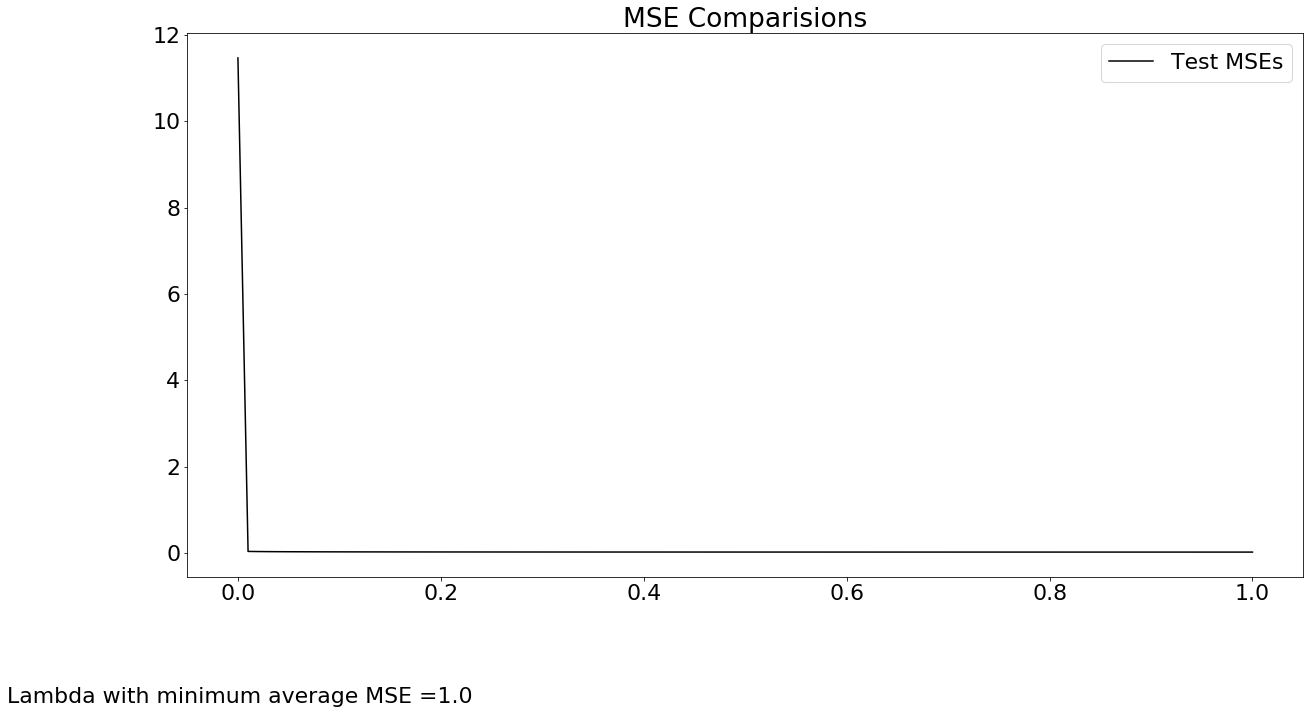

In [17]:
s = "Lambda with minimum average MSE =" + str(lambda_vals[lambda_mses.index(min(lambda_mses))])
plt.title("MSE Comparisions")
plt.plot(lambda_vals, lambda_mses, '-', color='black')
plt.legend(['Test MSEs'])
plt.figtext( 0, -0.05, s)
plt.show()

It is possible to deduce which features matter by looking at the which learning parameters have the smallest values. This is because $y = \beta_i x_i + ...$, therefore the smaller the learning parameter the less a feature matters, and so we might be able to obtain better results by eliminating them. Let's try dropping the elements which were consistently the lowest, and seeing if we get better predictions.

In [18]:
# Once again, for whatever god foresaken reason I need to redefine this function
def mse(y, y_pred):

    """Returns the mean square error given two values"""

    return ((y - y_pred) ** 2).mean()

mses = []
Ws = []

for k in range(1,6):

    W = None
    x_test = None
    x_train = None
    y_test = None
    y_pred = []


    # I need to resort to meta programming to pull this off, god I miss sklearn
    foo = "CandC_train" + str(k)
    foo2 = "CandC_test" + str(k)
    
    # Drop the supposedly irrelevant features
    for indx in W_min_indices:
        # Hacky way for dealing with the annoying np array conversions
        s = str(indx)[2:-2]
        exec("x_train = "+ foo +".drop(" + foo +".columns[" + s + "], axis=1)")
        exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[" + s + "], axis=1)")
    
    # Train the model with lambda = 1.0, no need to test other hyperparemters since we've already tuned it
    W = (multivariate_lin_fit(x_train, 1.0))
    Ws.append(W)
    exec("y_test = " + foo2 + "[" + foo2 + ".columns[-1]]")
    exec("x_test = "+ foo2 +".drop(" + foo2 +".columns[len(" + foo2 + ".columns) - 1], axis=1)")

    for j in range(x_test.shape[0]):
        y = multivariate_predict(W, x_test.iloc[j])
        y_pred.append(y)

    mses.append(mse(y_test, y_pred))

# Calculate the average MSE
avg_mse = 0
for mse in mses:
    avg_mse += mse
avg_mse = avg_mse/len(mses)

print("Average MSE with reduced set of features: ", avg_mse)
    

Average MSE with reduced set of features:  0.02401518613381136


The new model performs only marginally worse than the model with all the features (average MSE = 0.06599 vs 0.019497), meaning those features can be dropped without remorse as saving memory and computation power is arguably the better deal.